In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns# 한글 패치 진행

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [203]:
# 한글 패치 진행

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [204]:
# 파이차트 만들기 함수

def make_pie_chart(df_list,colname = "연령대"):

    # 데이터 수 만큼 파이차트 생성 가능하도록 설정
    fig, ax = plt.subplots(1,len(df_list),figsize = (15,5))

    # 데이터 수 만큼 파이차트 생성
    for i, df in enumerate(df_list):
        age_counts = df[[colname]].value_counts().head(10)
        labels = age_counts.index.tolist()
        sizes = age_counts.values

        # i 번째 위치에 파이차트 생성성
        ax[i].pie(sizes,
           labels = labels,
           #explode=explode,
           autopct = '%1.1f%%',
           shadow = True, startangle= 90)
        ax[i].set_title(f"{2021 + i} {colname} 파이차트")

    plt.show()

In [205]:
# Butterfly Plot 그리기 함수

def make_butterfly_chart(df1, df2, year = 2020):

    # Butterfly Chart

    plt.figure(figsize = (10,6))

    # 데이터 그리기
    sns.barplot(data = df1, y = '가맹점업종명', x = 'count' , color = 'BLue', label = '2030', errorbar=None)
    sns.barplot(data = df2, y = '가맹점업종명', x = 'count' , color = 'Red', label = '4050', errorbar=None ,estimator = lambda x: -sum(x))

    # 축과 레이블 설정
    plt.axvline(0, color = 'grey', linestyle = '--')
    plt.axis('tight')
    plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1)

    # 가독성 위해 축 삭제
    plt.gca().spines['top'].set_visible(False)   
    plt.gca().spines['right'].set_visible(False) 
    plt.gca().spines['left'].set_visible(False)    
    plt.gca().spines['bottom'].set_visible(False)   

    plt.title(f"{year}년 세대별 소비 횟수 비교", fontsize=17)
    plt.show()

In [206]:
'''
# 데이터 불러오기 및 날짜 데이터 datetime 형식으로 변경
data = pd.read_csv('sampled_data/final_data.csv')
data['거래년월'] = pd.to_datetime(data['거래년월'], format='%Y-%m-%d')
#data = data.drop('Unnamed: 0', axis= 1)
'''

"\n# 데이터 불러오기 및 날짜 데이터 datetime 형식으로 변경\ndata = pd.read_csv('sampled_data/final_data.csv')\ndata['거래년월'] = pd.to_datetime(data['거래년월'], format='%Y-%m-%d')\n#data = data.drop('Unnamed: 0', axis= 1)\n"

In [207]:
'''
# 데이터 불러오기
data_tmp = pd.read_csv('sampled_data/capital_data.csv')
data_tmp.info()
'''

"\n# 데이터 불러오기\ndata_tmp = pd.read_csv('sampled_data/capital_data.csv')\ndata_tmp.info()\n"

In [208]:
'''
# 인구 데이터 불러오기
seoul_pop = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/파생 데이터/등록인구_20241105141249.csv')
gyeonggy_pop = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/파생 데이터/시군별_세대_및_인구_20241105142246.csv', encoding = 'cp949')
'''

"\n# 인구 데이터 불러오기\nseoul_pop = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/파생 데이터/등록인구_20241105141249.csv')\ngyeonggy_pop = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/파생 데이터/시군별_세대_및_인구_20241105142246.csv', encoding = 'cp949')\n"

In [209]:
'''
# seoul_pop의 컬럼명 변경
# merge를 용이하게 하려면 이 과정을 거쳐야 한다.
seoul_pop = seoul_pop.rename(columns={'시': '시도', '구': '시군구'})
gyeonggy_pop = gyeonggy_pop.rename(columns={'자택_시도': '시도', '자택_시군구': '시군구'})
total_pop = pd.concat([seoul_pop, gyeonggy_pop], axis = 0)
total_pop
'''

"\n# seoul_pop의 컬럼명 변경\n# merge를 용이하게 하려면 이 과정을 거쳐야 한다.\nseoul_pop = seoul_pop.rename(columns={'시': '시도', '구': '시군구'})\ngyeonggy_pop = gyeonggy_pop.rename(columns={'자택_시도': '시도', '자택_시군구': '시군구'})\ntotal_pop = pd.concat([seoul_pop, gyeonggy_pop], axis = 0)\ntotal_pop\n"

In [210]:
'''
# 희안하게 원래 자료엔 부천시는 동으로 안 나뉘고 '부천시'로 통합 된 상태. 
# 이를 합쳐주지 않으면 Null 값이 반환되기에 부천시를 통합한다.
data_tmp['가맹점_시군구'] = data_tmp['가맹점_시군구'].replace({
    '부천시 원미구': '부천시',
    '부천시 오정구': '부천시',
    '부천시 소사구': '부천시'
})

data_tmp['자택_시군구'] = data_tmp['자택_시군구'].replace({
    '부천시 원미구': '부천시',
    '부천시 오정구': '부천시',
    '부천시 소사구': '부천시'
})
'''

"\n# 희안하게 원래 자료엔 부천시는 동으로 안 나뉘고 '부천시'로 통합 된 상태. \n# 이를 합쳐주지 않으면 Null 값이 반환되기에 부천시를 통합한다.\ndata_tmp['가맹점_시군구'] = data_tmp['가맹점_시군구'].replace({\n    '부천시 원미구': '부천시',\n    '부천시 오정구': '부천시',\n    '부천시 소사구': '부천시'\n})\n\ndata_tmp['자택_시군구'] = data_tmp['자택_시군구'].replace({\n    '부천시 원미구': '부천시',\n    '부천시 오정구': '부천시',\n    '부천시 소사구': '부천시'\n})\n"

In [211]:
'''
# 데이터 전처리 및 병합 - 가맹점 기준 인구 병합
# total_pop의 컬럼명 변경
total_pop = total_pop.rename(columns={'시도': '가맹점_광역시도', '시군구': '가맹점_시군구', '인구': '가맹점_인구'})

# 데이터 병합
merged_data = data_tmp.merge(total_pop, 
                        on=['가맹점_광역시도', '가맹점_시군구', '년도'],
                        how='left')

# 결과 확인
print("\n병합 결과:")
merged_data.head(1)
'''

'\n# 데이터 전처리 및 병합 - 가맹점 기준 인구 병합\n# total_pop의 컬럼명 변경\ntotal_pop = total_pop.rename(columns={\'시도\': \'가맹점_광역시도\', \'시군구\': \'가맹점_시군구\', \'인구\': \'가맹점_인구\'})\n\n# 데이터 병합\nmerged_data = data_tmp.merge(total_pop, \n                        on=[\'가맹점_광역시도\', \'가맹점_시군구\', \'년도\'],\n                        how=\'left\')\n\n# 결과 확인\nprint("\n병합 결과:")\nmerged_data.head(1)\n'

In [212]:
'''
# 데이터 전처리 및 병합 - 자택 기준 인구 병합
# total_pop의 컬럼명 변경

total_pop_2 = total_pop.rename(columns={'가맹점_광역시도': '자택_시도', '가맹점_시군구': '자택_시군구', '가맹점_인구': '자택_인구'})

# 데이터 병합
merged_data = merged_data.merge(total_pop_2, 
                        on=['자택_시도', '자택_시군구', '년도'],
                        how='left')

merged_data.fillna(0, inplace=True)

# 결과 확인
print("\n병합 결과:")
merged_data.head(1)
'''

'\n# 데이터 전처리 및 병합 - 자택 기준 인구 병합\n# total_pop의 컬럼명 변경\n\ntotal_pop_2 = total_pop.rename(columns={\'가맹점_광역시도\': \'자택_시도\', \'가맹점_시군구\': \'자택_시군구\', \'가맹점_인구\': \'자택_인구\'})\n\n# 데이터 병합\nmerged_data = merged_data.merge(total_pop_2, \n                        on=[\'자택_시도\', \'자택_시군구\', \'년도\'],\n                        how=\'left\')\n\nmerged_data.fillna(0, inplace=True)\n\n# 결과 확인\nprint("\n병합 결과:")\nmerged_data.head(1)\n'

In [213]:
'''
과정중 불필요한 인덱스 열 생성됨 -> 삭제
merged_data.drop(['Unnamed: 0'], axis=1, inplace=True)
data = merged_data
'''

"\n과정중 불필요한 인덱스 열 생성됨 -> 삭제\nmerged_data.drop(['Unnamed: 0'], axis=1, inplace=True)\ndata = merged_data\n"

In [214]:
#data.to_csv('sampled_data/capital_data_1108.csv', index=False)

# 데이터 확인 및 중분류 전처리
- raw data 기반으로 작업한것과 기본 데이터를 바탕으로 얼마나 차이가 있는지 확인
- 차이가 없거나 매우 적다면 이느 층화추출이 잘 된 결과임을 의미한다.

- 대분류 만으론 산업 구조 및 소비 패턴을 완전히 파악하기가 어렵다고 판단.
- 중분류 데이터를 추가하여 더 정확한 소비 패턴 파악을 시도.


In [215]:
# raw

#data2 = pd.read_csv('sampled_data/rawdata_pj1.csv')

In [216]:
# sampled

data = pd.read_csv('sampled_data/rawdata_pj1.csv')

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123850 entries, 0 to 2123849
Data columns (total 16 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   거래년월            object
 1   고객ID            int64 
 2   가맹점업종명          object
 3   가맹점_광역시도        object
 4   가맹점_시군구         object
 5   승인건수            object
 6   승인금액            int64 
 7   연령대             object
 8   성별              object
 9   자택_시도           object
 10  자택_시군구          object
 11  승인건수_수치화        int64 
 12  년도              int64 
 13  가맹점업종명_범주화_중분류  object
 14  거래년월_분기         int64 
 15  거래년월_월          int64 
dtypes: int64(6), object(10)
memory usage: 259.3+ MB


In [218]:
data.head()

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,자택_시도,자택_시군구,승인건수_수치화,년도,가맹점업종명_범주화_중분류,거래년월_분기,거래년월_월
0,2021-12-01,3632812613,기타레져업소,서울특별시,중랑구,5번이하,10000,20대,남,서울특별시,중랑구,1,2021,여가,4,12
1,2021-12-01,9630653493,주점,서울특별시,동작구,5번이하,20000,60대이상,남,서울특별시,동작구,1,2021,식생활,4,12
2,2021-12-01,2935289913,제과점,서울특별시,강서구,5번이하,30000,30대,남,서울특별시,강서구,1,2021,식생활,4,12
3,2021-12-01,5638807364,미용원,서울특별시,중랑구,5번이하,10000,20대,여,서울특별시,중랑구,1,2021,서비스,4,12
4,2021-12-01,3626542842,서양음식,인천광역시,미추홀구,5번이하,80000,30대,남,인천광역시,미추홀구,1,2021,식생활,4,12


## 2차 중분류 추가

In [219]:
'''
# 중분류
# 대분류를 더 세세하게 분류하는데 초점을 두되, 의료나 온라인 쇼핑 등 필요하다면 추가 분류 기준을 만듬.

food_related = [
    '기타건강식품', '기타음료식품', '서양음식', '정육점', '제과점', '주점', '유흥주점', '단란주점', '일반한식', '일식·회집', '스넥', '중국식', '칵테일바', '편 의 점',
    '농,축협직영매장', '농·축·수산품', '농축수산가공품',  '주류판매점'
]

retail = [
    '가 방', '기타 사무용품', '기타잡화', '기타전기제품', '대형할인점', 
    '목재·석재·철물', '문구용품', '소프트웨어', '슈퍼마켓',
    '자동차부품', '종합용역', '출판 및 인쇄물', '컴퓨터', '통신기기', '홍삼제품', 
    '화원', 'DP&E', '기계공구', '기념품점', '사무용 OA기기', '미곡상', '비료,사료,종자',  
    '화방·표구점', '민예·공예품', '면 세 점', '인테리어전문', '조명기구', '보일러·펌프·샷시', '건축용 요업제품', '페인트', '음반영상물', '농기계', 
    '시 계', '단체복', '제 화', '농협하나로클럽','아동의류', '연 쇄 점', '완구점'
]

life = [
    '가전제품', '기타가구', '기타의류', '신 발', '안경', '액세서리', '일반가구',
    '일반서적', '내의판매', '세탁소', '화장품', '침구·수예점', '신 발', '안경', '귀금속','정수기', '정장',
    '주방용구', '주방용식기'
]

med = [
    '의료용품', '치과의원', '종합병원', '한방병원', '치과병원', '기타의료기관 및 기타의료기기','병 원(응급실운영)',
    '한 의 원', '약 국',  '의 원', '건강진단', '동물병원'
]

online = [
    '인터넷Mall', '인터넷종합Mall', 'CATV홈쇼핑','CATV'
]

education = [
    '학원', '독서실', '기타 교육기관', '학습지교육', '초중고교육기관', '유아원', '기능학원', '예·체능계학원',
    '외국어학원', '보습학원', '전문서적'
]

service = [
    '가례서비스업', '공공요금대행서비스/소득공제대상', '공공요금대행서비스/소득공제비대상', '기타대인서비스',
    '미용원', '미용재료', '사무서비스', '조세서비스', '통신서비스/소득공제비대상',
    '피부미용실', '혼례서비스업', '애완동물',
    '기타숙박업', '보관및 창고업', '비씨카드 정산용(할인)',
    '위탁급식업', '상품권전문판매', '부동산중개·임대', 
    '이동통신요금', '일반(통신판매)', '통신판매업1', '티켓', '맞춤복점',
    'PG상품권', '가정용품수리', '구내매점(국가기관등)', '손해보험', '전자상거래상품권전문판매', 
    '위성방송', '비씨카드 정산용가맹점', '비영리/대상', '비영리/비대상', '사무·통신기기수리', '상 품 권', '생명보험',
    '자사카드발행백화점', '전자상거래상품권', '이용원'
]

lesuire = [
    '골프경기장', '골프연습장', '스크린골프','당구장','스포츠·레져용품', '스포츠의류', '기타레져업소', '레져업소',
    '영화관', '헬스클럽', '종합레져타운', '수족관', '콘도', '안마/스포츠마사지', '관광여행', '노 래 방',
    '문화취미기타', '수 영 장', '골프용품 전문점', '사우나', '볼 링 장', '1급 호텔', '특급호텔', '2급 호텔',
]

transportation = [
    'E1가스충전소', 'GS가스충전소', 'GS주유소', 'SK가스충전소', 'SK주유소', '고속버스', '렌터카', '전기차충전소', '주유소', '철도', '택시', '항공사', 
    '현대정유가스충전소', '화물운송', '쌍용S-OIL가스충전소', '여객선', 'LPG취급점', '현대정유(오일뱅크)', '쌍용S-OIL', '유류판매', '자동차시트·타이어',
    '주차장', '세차장',  '자동차정비'
]

others = ['기타 전문점', '기타1', '기타건축자재', '기타용역서비스', '기타유통업', '업종미등록', '기타수리서비스', '기타4', '갈비전문점', '이륜차판매']
'''

"\n# 중분류\n# 대분류를 더 세세하게 분류하는데 초점을 두되, 의료나 온라인 쇼핑 등 필요하다면 추가 분류 기준을 만듬.\n\nfood_related = [\n    '기타건강식품', '기타음료식품', '서양음식', '정육점', '제과점', '주점', '유흥주점', '단란주점', '일반한식', '일식·회집', '스넥', '중국식', '칵테일바', '편 의 점',\n    '농,축협직영매장', '농·축·수산품', '농축수산가공품',  '주류판매점'\n]\n\nretail = [\n    '가 방', '기타 사무용품', '기타잡화', '기타전기제품', '대형할인점', \n    '목재·석재·철물', '문구용품', '소프트웨어', '슈퍼마켓',\n    '자동차부품', '종합용역', '출판 및 인쇄물', '컴퓨터', '통신기기', '홍삼제품', \n    '화원', 'DP&E', '기계공구', '기념품점', '사무용 OA기기', '미곡상', '비료,사료,종자',  \n    '화방·표구점', '민예·공예품', '면 세 점', '인테리어전문', '조명기구', '보일러·펌프·샷시', '건축용 요업제품', '페인트', '음반영상물', '농기계', \n    '시 계', '단체복', '제 화', '농협하나로클럽','아동의류', '연 쇄 점', '완구점'\n]\n\nlife = [\n    '가전제품', '기타가구', '기타의류', '신 발', '안경', '액세서리', '일반가구',\n    '일반서적', '내의판매', '세탁소', '화장품', '침구·수예점', '신 발', '안경', '귀금속','정수기', '정장',\n    '주방용구', '주방용식기'\n]\n\nmed = [\n    '의료용품', '치과의원', '종합병원', '한방병원', '치과병원', '기타의료기관 및 기타의료기기','병 원(응급실운영)',\n    '한 의 원', '약 국',  '의 원', '건강진단', '동물병원'\n]\n\nonline = [\n    '인터넷Mall', '인터넷종합Mall

In [220]:
'''
# 중분류 mapping -> 대분류 매핑때 썼던 코드 사용

categorizing_list2 = [food_related, retail, life, med, online, education, service, lesuire, transportation, others]
categorizing_list_name2 = ['식생활', '소매', '라이프스타일', '의료', '온라인쇼핑', '교육', '서비스', '여가','교통_및_물류', '기타']

# 매핑 딕셔너리 생성
mapping_dict2 = {}
for i, clist in enumerate(categorizing_list2):
    for item in clist:
        mapping_dict2[item] = categorizing_list_name2[i]

# 매핑 통해서 적용
# 위에서 분류되지 않은 na들은 모두 인터넷P/G로 매핑, 인터넷P/G가 제일 비중이 큼.
data['가맹점업종명_범주화_중분류'] = data['가맹점업종명'].map(mapping_dict2).fillna('인터넷P/G')
'''

"\n# 중분류 mapping -> 대분류 매핑때 썼던 코드 사용\n\ncategorizing_list2 = [food_related, retail, life, med, online, education, service, lesuire, transportation, others]\ncategorizing_list_name2 = ['식생활', '소매', '라이프스타일', '의료', '온라인쇼핑', '교육', '서비스', '여가','교통_및_물류', '기타']\n\n# 매핑 딕셔너리 생성\nmapping_dict2 = {}\nfor i, clist in enumerate(categorizing_list2):\n    for item in clist:\n        mapping_dict2[item] = categorizing_list_name2[i]\n\n# 매핑 통해서 적용\n# 위에서 분류되지 않은 na들은 모두 인터넷P/G로 매핑, 인터넷P/G가 제일 비중이 큼.\ndata['가맹점업종명_범주화_중분류'] = data['가맹점업종명'].map(mapping_dict2).fillna('인터넷P/G')\n"

In [221]:
#data2.info()

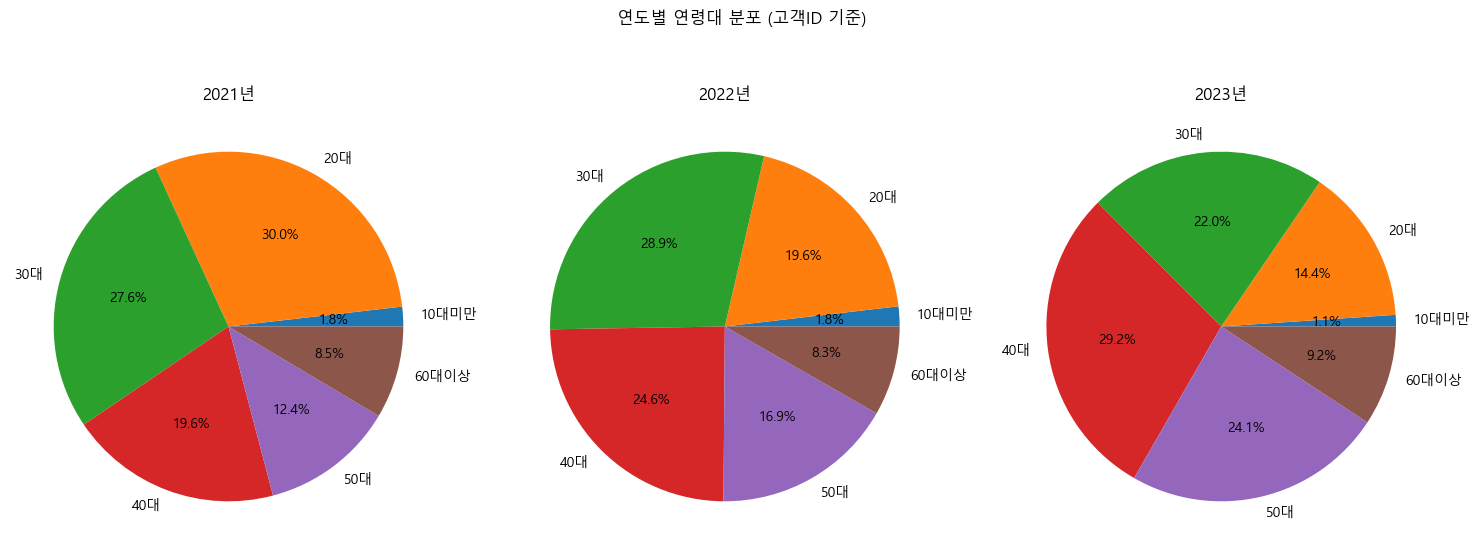

In [222]:
# 연도별 성별 분포(고객ID 기준)확인용 파이 차트 표

def plot_gender_pie_by_year2(data, i = '성별'):
    # 고객ID를 unique하게 고려하여 년도별로 성별 데이터 집계
    gender_by_year = data.drop_duplicates('고객ID').groupby(['년도', i]).size().unstack()
    
    # 파이 차트 생성
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 각 년도별로 파이 차트 그리기
    for idx, year in enumerate(sorted(data['년도'].unique())):
        year_data = gender_by_year.loc[year]
        axes[idx].pie(year_data, labels=year_data.index, autopct='%1.1f%%')
        axes[idx].set_title(f'{year}년')
    
    # 세부 설정
    plt.suptitle(f'연도별 {i} 분포 (고객ID 기준)', y=1.1)
    plt.tight_layout()
    plt.show()

# 데이터로 파이 차트 그리기 
plot_gender_pie_by_year2(data, '연령대')

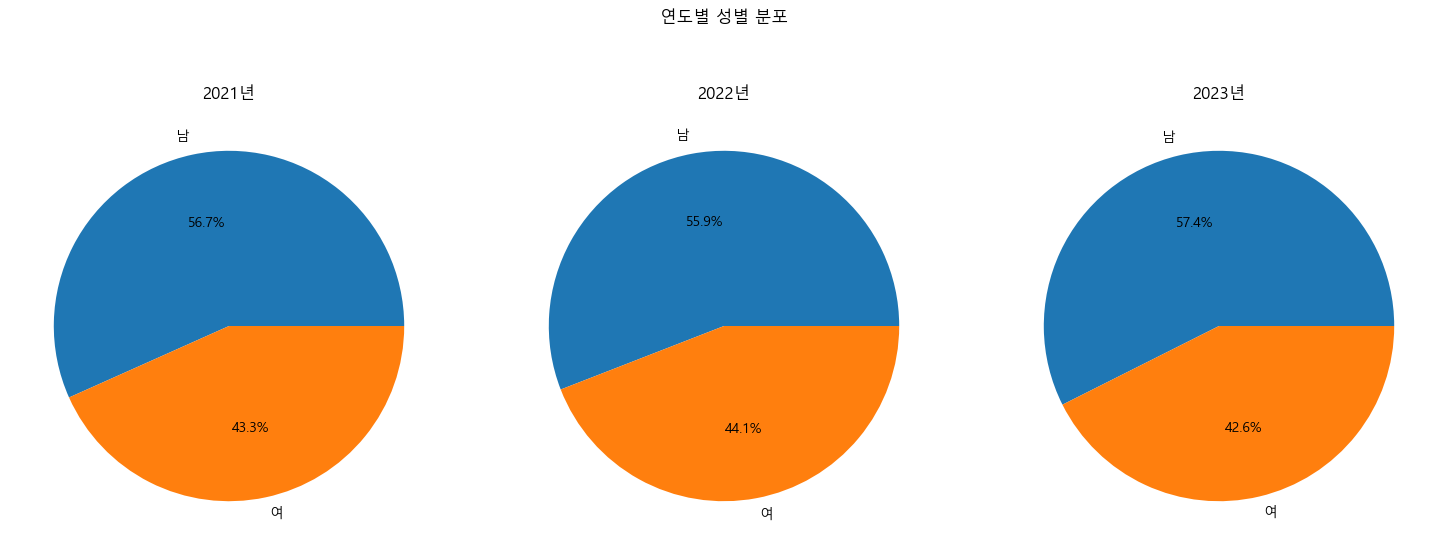

In [223]:
# 연도별 성별 분포(sampling된 데이터를 기반으로)확인용 파이 차트 표

def plot_gender_pie_by_year(data, i = '성별'):
    # 년도별로 성별 데이터 집계
    gender_by_year = data.groupby(['년도', i]).size().unstack()
    
    # 파이 차트 생성
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 각 년도별로 파이 차트 그리기
    for idx, year in enumerate(sorted(data['년도'].unique())):
        year_data = gender_by_year.loc[year]
        axes[idx].pie(year_data, labels=year_data.index, autopct='%1.1f%%')
        axes[idx].set_title(f'{year}년')
    
    # 세부 설정
    plt.suptitle(f'연도별 {i} 분포', y=1.1)
    plt.tight_layout()
    plt.show()

# 데이터로 파이 차트 그리기 
plot_gender_pie_by_year(data)

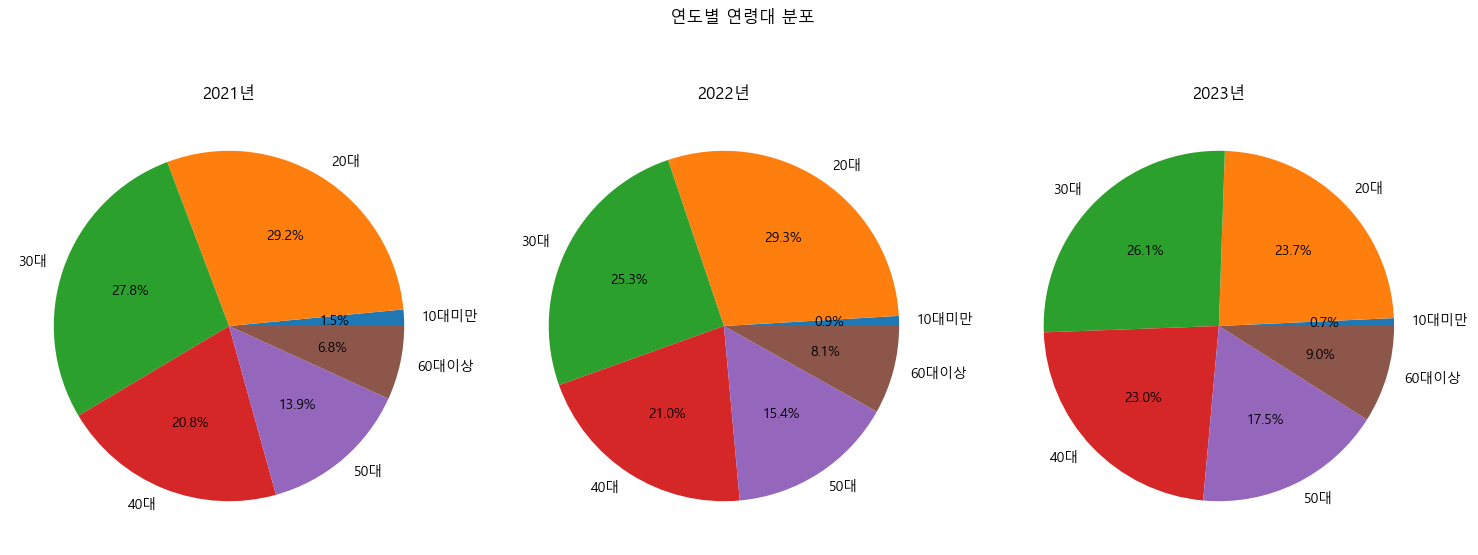

In [224]:
plot_gender_pie_by_year(data, i = '연령대')

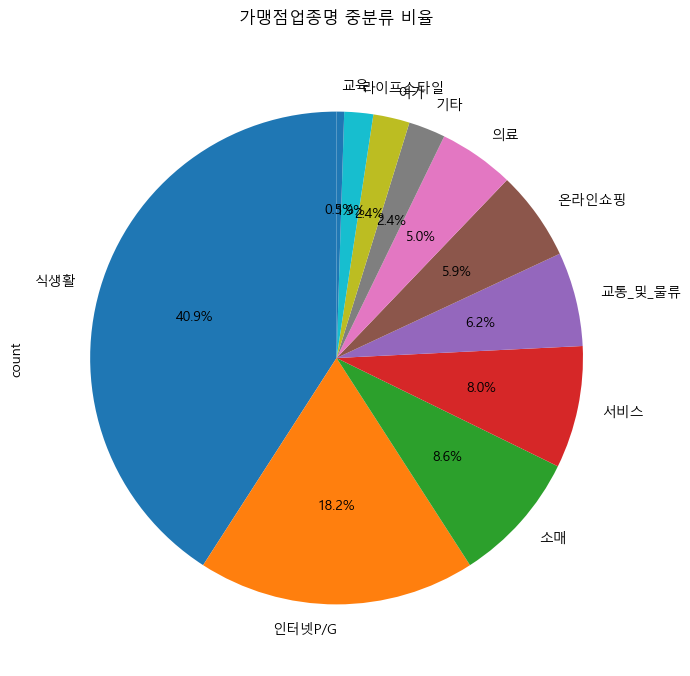

In [225]:
# 가맹점업종명_범주화_중분류 별 비율을 파이차트로 시각화
plt.figure(figsize=(10,8))
data['가맹점업종명_범주화_중분류'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle = 90
)
plt.title('가맹점업종명 중분류 비율', pad=20)
plt.show()

In [226]:
# 원본 데이터로도 동일한 파이 차트 그리기
# plot_gender_pie_by_year(data2)

### 데이터에서 인터넷P/G 삭제 - 데이터 변경 후 안함
- 새 데이터는 예전만큼 인터넷P/G의 비중이 압도적이지 않다!

In [227]:
# 인터넷P/G 제거
# 인터넷P/G는 비중이 너무 높아서 제거 + 인터넷P/G는 소비 패턴 파악이 불가능함.

#data = data[data['가맹점업종명_범주화'] != '인터넷P/G']

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123850 entries, 0 to 2123849
Data columns (total 16 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   거래년월            object
 1   고객ID            int64 
 2   가맹점업종명          object
 3   가맹점_광역시도        object
 4   가맹점_시군구         object
 5   승인건수            object
 6   승인금액            int64 
 7   연령대             object
 8   성별              object
 9   자택_시도           object
 10  자택_시군구          object
 11  승인건수_수치화        int64 
 12  년도              int64 
 13  가맹점업종명_범주화_중분류  object
 14  거래년월_분기         int64 
 15  거래년월_월          int64 
dtypes: int64(6), object(10)
memory usage: 259.3+ MB


# 시각화


- 연령대 - 성별로 묶어 총 12개의 그룹을 생성함.
- 각 그룹 별로 어떤 소비 패턴을 가지며, 어떤 그룹끼리 묶어서 같은 혜택을 줄까 파악하기 위함
- 항상 시각화 자료를 먼저 제시하고 이후 통계분석 결과를 제시할 것.

In [229]:
data.columns

Index(['거래년월', '고객ID', '가맹점업종명', '가맹점_광역시도', '가맹점_시군구', '승인건수', '승인금액', '연령대',
       '성별', '자택_시도', '자택_시군구', '승인건수_수치화', '년도', '가맹점업종명_범주화_중분류', '거래년월_분기',
       '거래년월_월'],
      dtype='object')

In [230]:
# 연령대-성별 그룹화의 시각화
# 실질적으로 소비 금액, 소비 건수(수치화)만을 볼 수 있는 시각화

def plot_age_gender_amount_2(colname1, colname2, calc = 'sum', data = data, standard = '승인금액'):
    # 그룹 수에 맞는 서브 플롯 생성
    fig, axes = plt.subplots(6, 2, figsize=(15, 30))  # 6 rows, 2 columns
 
    plot_idx = 0
    # 연령대 및 성별 정의
    standard1 = data[colname1].unique()
    standard2 = data[colname2].unique()
    standard1.sort()
    standard2.sort()
    for a in standard1:
        for b in standard2:
            # 각 그룹별로 데이터 필터링하기
            subset = data[(data[colname1] == a) & (data[colname2] == b)]

            if not subset.empty:
                # 각 그룹별로 월별 합계 계산
                # 각각 합계, 평균, 건수 계산 가능
                # 일일히 코드를 바꾸긴 귀찮고, 함수를 직접 쓰는 건 까다로우니 정해서 입력하는 걸로.

                # standard(기준)에 따라 합계, 평균, 건수 계산
                if calc == 'sum':
                    monthly_sum_amount = subset.groupby('거래년월')[standard].sum().reset_index()
                elif calc == 'mean':
                    monthly_sum_amount = subset.groupby('거래년월')[standard].mean().reset_index()
                elif calc == 'count':
                    monthly_sum_amount = subset.groupby('거래년월')[standard].count().reset_index()

                # 각 그룹별로 시각화 - 꺾은선 그래프 활용
                ax = axes[plot_idx // 2, plot_idx % 2]
                sns.lineplot(data=monthly_sum_amount, x='거래년월', y=standard, ax=ax)
                
                # 추세선 추가
                z = np.polyfit(range(len(monthly_sum_amount)), monthly_sum_amount[standard], 1)
                p = np.poly1d(z)
                ax.plot(monthly_sum_amount['거래년월'], p(range(len(monthly_sum_amount))), "r--", alpha=0.8)
                
                ax.set_title(f"{b} - {a} [{standard}의 {calc}]")
                ax.set_xlabel("거래년월") # 달 별로 나뉘므로 필요함.
                ax.set_ylabel(f"{standard} {calc}")
                ax.tick_params(axis='x', rotation=45)

                plot_idx += 1

            # 외부 설정
    plt.tight_layout()
    plt.show()

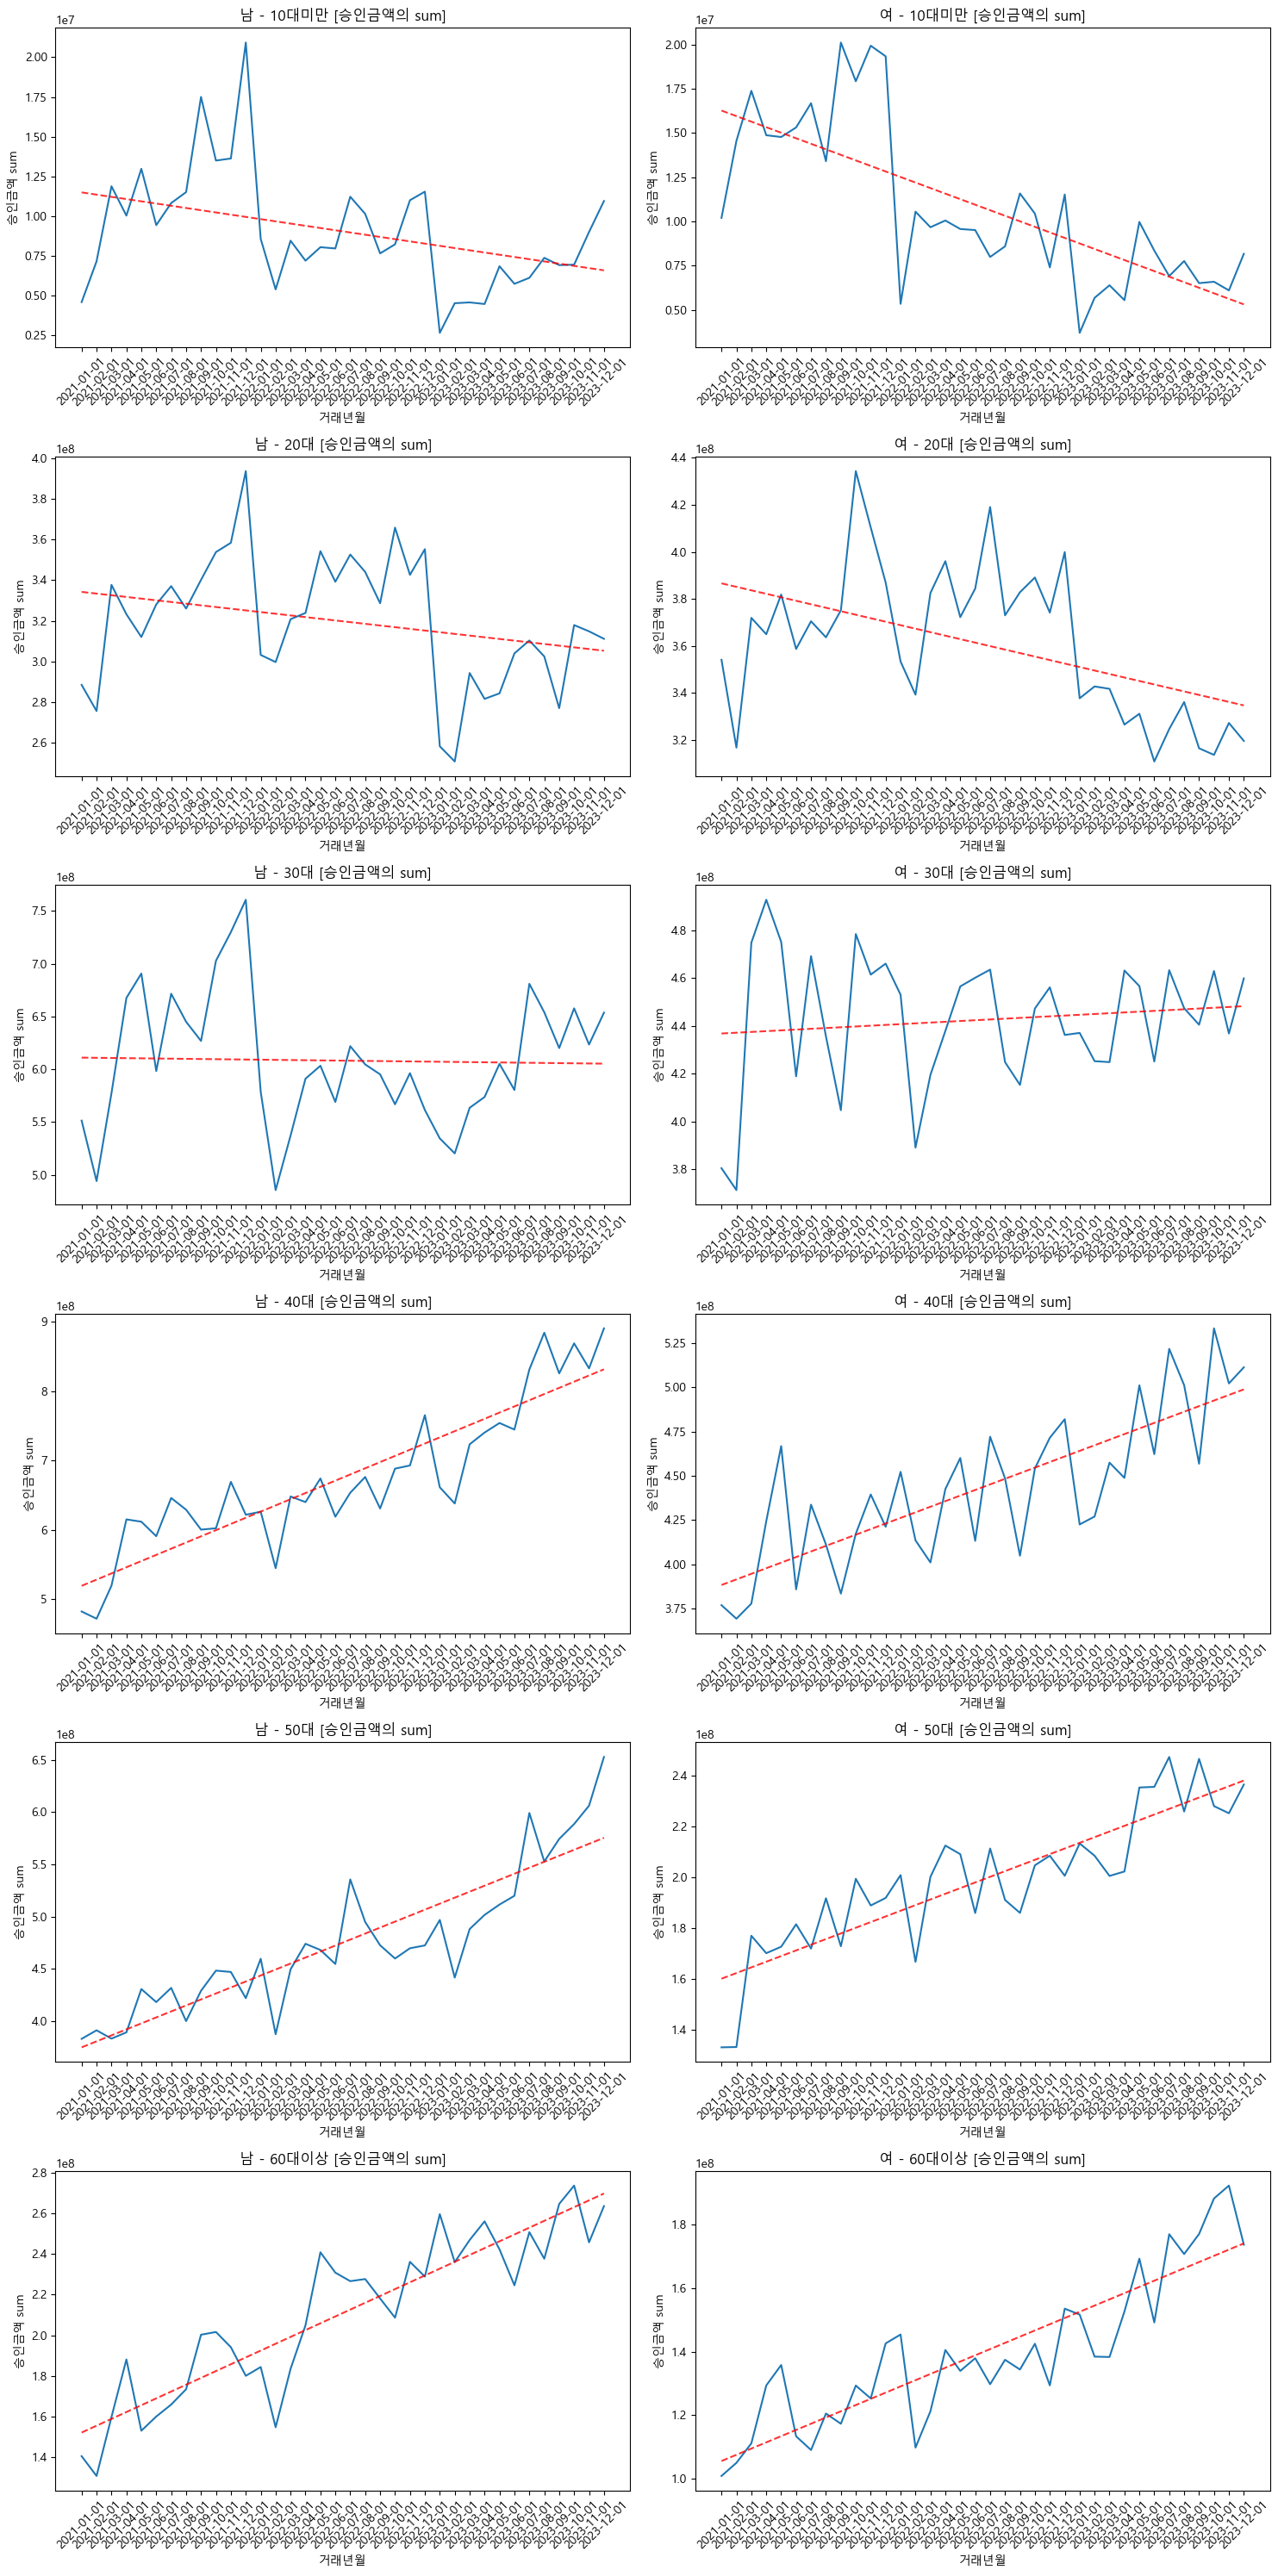

In [231]:
plot_age_gender_amount_2('연령대', '성별', calc = 'sum', standard='승인금액')

In [232]:
'''
# 거시적 데이터 시각화 - 금리와 소비자심리지수 추이 (분기 바탕)

fig, ax1 = plt.subplots(figsize=(8, 6))

# 금리 그래프 (왼쪽 y축)
color1 = 'tab:blue'
ax1.set_xlabel('거래년월')
ax1.set_ylabel('금리', color=color1)
ax1.plot(data['거래년월'], data['금리'], color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# 소비자심리지수 그래프 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('소비자심리지수', color=color2)
ax2.plot(data['거래년월'], data['소비자심리지수'], color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.xticks(rotation = 45)
plt.title('금리와 소비자심리지수 추이')
plt.tight_layout()
plt.show()
'''

"\n# 거시적 데이터 시각화 - 금리와 소비자심리지수 추이 (분기 바탕)\n\nfig, ax1 = plt.subplots(figsize=(8, 6))\n\n# 금리 그래프 (왼쪽 y축)\ncolor1 = 'tab:blue'\nax1.set_xlabel('거래년월')\nax1.set_ylabel('금리', color=color1)\nax1.plot(data['거래년월'], data['금리'], color=color1)\nax1.tick_params(axis='y', labelcolor=color1)\n\n# 소비자심리지수 그래프 (오른쪽 y축)\nax2 = ax1.twinx()\ncolor2 = 'tab:orange'\nax2.set_ylabel('소비자심리지수', color=color2)\nax2.plot(data['거래년월'], data['소비자심리지수'], color=color2)\nax2.tick_params(axis='y', labelcolor=color2)\n\nplt.xticks(rotation = 45)\nplt.title('금리와 소비자심리지수 추이')\nplt.tight_layout()\nplt.show()\n"

## 클러스터링
- K-means
- GMM
- 계층적 군집화

로그 변환은 크게 의미가 없는 듯 함.

## 연령-성별 그룹화

In [233]:
# Kmeans에 대한 이론적 학습도 필요하다.
from sklearn.cluster import KMeans

# 계층적 군집화 적용 및 던드로그램
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

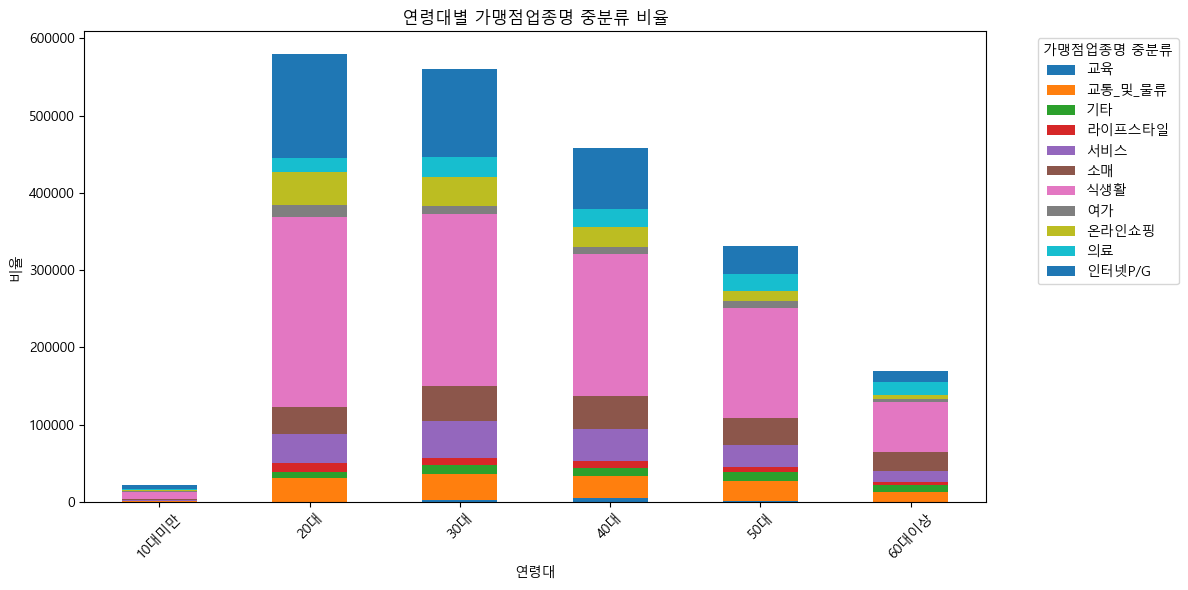

In [234]:
# 연령대별 가맹점업종명_범주화_중분류 비율 시각화
# 성별 고려 안하고 일단 연령별로 주 소비 패턴을 본다.
age_category_data = data.groupby('연령대')['가맹점업종명_범주화_중분류'].value_counts().unstack()

ax = age_category_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('연령대별 가맹점업종명 중분류 비율')
plt.xlabel('연령대')
plt.ylabel('비율')
plt.legend(title='가맹점업종명 중분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 데이터 추가 전처리

In [235]:
# 필요할떄만 실행하는 코드
# 10대미만은 거래 건수가 너무 적기 때문에 제외해도 될 듯하다.

data_saved = data
data = data[data['연령대'] != '10대미만']
#data = data[~data['가맹점업종명_범주화_중분류'].isin(['온라인쇼핑', '기타'])]

### K-Mode Clustering

In [236]:
# 데이터 전처리
# K-modes는 범주형 데이터에 적합한 군집화 방법
# !pip install kmodes -qq
#
# from kmodes.kmodes import KModes

In [237]:
'''
# 범주형 데이터만 선택
categorical_data = data[['연령대', '성별', '가맹점업종명_범주화_중분류']]

# K-modes 클러스터링 수행
kmode = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
clusters = kmode.fit_predict(categorical_data)

# 클러스터별 특성 분석
cluster_data = pd.DataFrame({
    '연령대': categorical_data['연령대'],
    '성별': categorical_data['성별'],
    '가맹점업종명': categorical_data['가맹점업종명_범주화_중분류'],
    'Cluster': clusters
})

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")
for i in range(2):
    print(f"\nCluster {i} 특징:")
    cluster_subset = cluster_data[cluster_data['Cluster'] == i]
    
    print("\n연령대 분포:")
    print(cluster_subset['연령대'].value_counts(normalize=True))
    
    print("\n성별 분포:")
    print(cluster_subset['성별'].value_counts(normalize=True))
    
    print("\n업종 분포:")
    print(cluster_subset['가맹점업종명'].value_counts(normalize=True).head())
    print("-" * 50)

# 시각화
plt.figure(figsize=(12, 8))
for i in range(2):
    cluster_subset = cluster_data[cluster_data['Cluster'] == i]
    업종_분포 = cluster_subset['가맹점업종명'].value_counts(normalize=True)
    
    plt.subplot(2, 1, i+1)
    업종_분포.plot(kind='bar')
    plt.title(f'Cluster {i} 업종 분포')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()
'''

'\n# 범주형 데이터만 선택\ncategorical_data = data[[\'연령대\', \'성별\', \'가맹점업종명_범주화_중분류\']]\n\n# K-modes 클러스터링 수행\nkmode = KModes(n_clusters=2, init=\'Huang\', n_init=5, verbose=1)\nclusters = kmode.fit_predict(categorical_data)\n\n# 클러스터별 특성 분석\ncluster_data = pd.DataFrame({\n    \'연령대\': categorical_data[\'연령대\'],\n    \'성별\': categorical_data[\'성별\'],\n    \'가맹점업종명\': categorical_data[\'가맹점업종명_범주화_중분류\'],\n    \'Cluster\': clusters\n})\n\n# 클러스터별 특징 출력\nprint("\n=== 각 클러스터의 특징 ===\n")\nfor i in range(2):\n    print(f"\nCluster {i} 특징:")\n    cluster_subset = cluster_data[cluster_data[\'Cluster\'] == i]\n    \n    print("\n연령대 분포:")\n    print(cluster_subset[\'연령대\'].value_counts(normalize=True))\n    \n    print("\n성별 분포:")\n    print(cluster_subset[\'성별\'].value_counts(normalize=True))\n    \n    print("\n업종 분포:")\n    print(cluster_subset[\'가맹점업종명\'].value_counts(normalize=True).head())\n    print("-" * 50)\n\n# 시각화\nplt.figure(figsize=(12, 8))\nfor i in range(2):\n    cluster_subset = clust

### 계층적 군집화

In [238]:
from scipy.spatial.distance import pdist, squareform

In [239]:
data.columns

Index(['거래년월', '고객ID', '가맹점업종명', '가맹점_광역시도', '가맹점_시군구', '승인건수', '승인금액', '연령대',
       '성별', '자택_시도', '자택_시군구', '승인건수_수치화', '년도', '가맹점업종명_범주화_중분류', '거래년월_분기',
       '거래년월_월'],
      dtype='object')

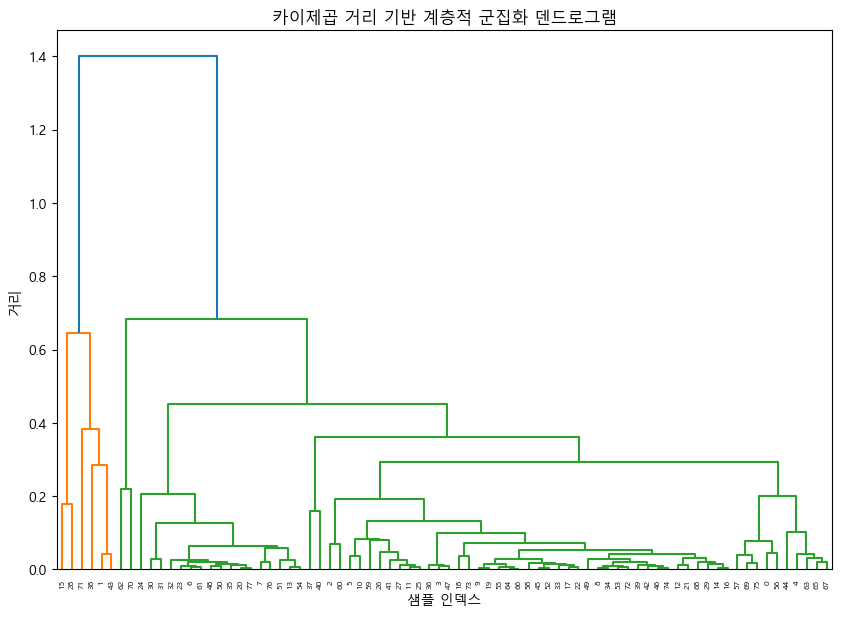


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 그룹: 가평군, 강동구, 강북구, 강서구, 강화군, 계양구, 고양시 덕양구, 고양시 일산동구, 고양시 일산서구, 과천시, 관악구, 광명시, 광주시, 광진구, 구리시, 군포시, 금천구, 김포시, 남동구, 남양주시, 노원구, 도봉구, 동구, 동대문구, 동두천시, 동작구, 미추홀구, 부천시, 부천시 소사구, 부천시 오정구, 부천시 원미구, 부평구, 서구, 서대문구, 서초구, 성남시 수정구, 성남시 중원구, 성동구, 성북구, 수원시 권선구, 수원시 영통구, 수원시 장안구, 수원시 팔달구, 시흥시, 안산시 단원구, 안산시 상록구, 안성시, 안양시 동안구, 안양시 만안구, 양주시, 양천구, 양평군, 여주시, 연수구, 연천군, 영등포구, 오산시, 용산구, 용인시 기흥구, 용인시 수지구, 용인시 처인구, 은평구, 의왕시, 의정부시, 이천시, 종로구, 중랑구, 파주시, 평택시, 포천시, 하남시, 화성시

주요 업종 비율:
식생활비율: 59.5%
식생활의 그룹 내 거래 횟수 평균: 0.59 

소매비율: 13.7%
소매의 그룹 내 거래 횟수 평균: 0.14 

의료비율: 7.1%
의료의 그룹 내 거래 횟수 평균: 0.07 

교통_및_물류비율: 6.2%
교통_및_물류의 그룹 내 거래 횟수 평균: 0.06 

서비스비율: 5.7%
서비스의 그룹 내 거래 횟수 평균: 0.06 

여가비율: 3.4%
여가의 그룹 내 거래 횟수 평균: 0.03 

라이프스타일비율: 2.3%
라이프스타일의 그룹 내 거래 횟수 평균: 0.02 

교육비율: 0.6%
교육의 그룹 내 거래 횟수 평균: 0.01 

인터넷P/G비율: 0.5%
인터넷P/G의 그룹 내 거래 횟수 평균: 0.01 

기타비율: 0.4%
기타의 그룹 내 거래 횟수 평균: 0.0 

온라인쇼핑비율: 0.4%
온라인쇼핑의 그룹 내 거래 횟수 평균: 0.0 

--------------------------------------------------

Cluster 

<Figure size 1200x800 with 0 Axes>

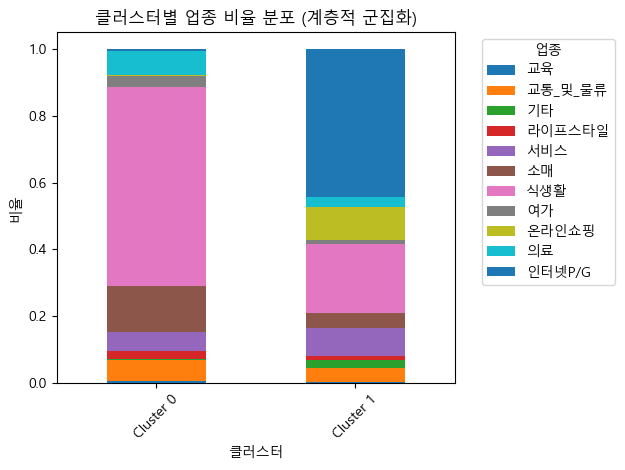

In [240]:
# 데이터 전처리 - 더 단순하게
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) # 비율로 만들거나 아니거나

def chi2_distance(X, Y):
    # 카이제곱 거리 계산 공식 구현
    return np.sum((X - Y) ** 2 / (X + Y + np.finfo(float).eps))

# 거리 행렬 계산
dist_matrix = np.zeros((len(grouped_data), len(grouped_data)))
for i in range(len(grouped_data)):
    for j in range(len(grouped_data)):
        dist_matrix[i,j] = chi2_distance(grouped_data.iloc[i], grouped_data.iloc[j])

# 계층적 군집화 수행 
# affinity 파라미터 제거하고 metric_params 사용
hierarchical = AgglomerativeClustering(
    n_clusters=2,
    metric='precomputed', #카이제곱 거리를 제공하지 않는다
    linkage='complete'
)
clusters = hierarchical.fit_predict(dist_matrix)

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
linkage_matrix = linkage(squareform(dist_matrix), method='complete')
dendrogram(linkage_matrix)
plt.title('카이제곱 거리 기반 계층적 군집화 덴드로그램')
plt.xlabel('샘플 인덱스')
plt.ylabel('거리')
plt.show()



#-----------------------------------------------------이 아래는 사실상 시각화

# 클러스터별 평균 계산 리스트 생성
cluster_means = []

# 3개의 그룹으로 클러스팅 하였으므로 3개의 평균 계산
# clusters가 계층적 군집화를 적용 및 예측한 모델
for i in range(2):
    cluster_mask = clusters == i
    cluster_data = grouped_data[cluster_mask]
    cluster_means.append(cluster_data.mean())

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")
for i in range(2):
    # 각 클러스터 별 구성 요소 를 cluster_groups에 저장
    cluster_groups = grouped_data.index[clusters == i]
    print(f"\nCluster {i} 특징:")
    print(f"포함된 그룹: {', '.join([f'{idx}' for idx in cluster_groups])}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means[i].sort_values(ascending=False).items():
        ratio_pct = ratio / cluster_means[i].sum()  # 비율로 변환
        print(f"{category}비율: {ratio_pct:.1%}")
        print(f"{category}의 그룹 내 거래 횟수 평균: {round(ratio, 2)} \n")
    print("-" * 50)

# 각 클러스터를 모아서 DataFrame으로 변환 - 시각화용
cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(2)])

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True) #이게 더 편한듯.
plt.title('클러스터별 업종 비율 분포 (계층적 군집화)')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

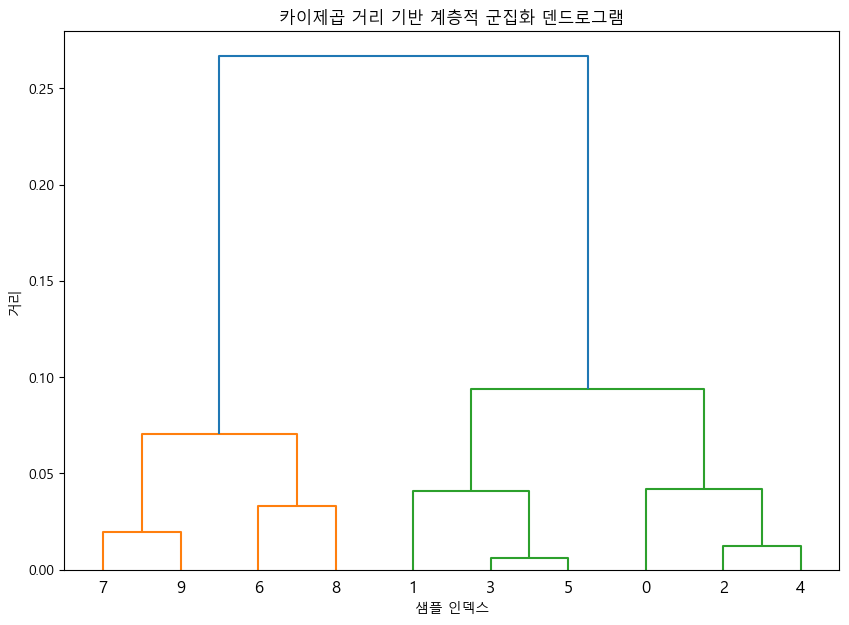


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 그룹: 20대-남, 20대-여, 30대-남, 30대-여, 40대-남, 40대-여

주요 업종 비율:
식생활비율: 40.2%
식생활의 그룹 내 거래 횟수 평균: 0.4 

인터넷P/G비율: 20.7%
인터넷P/G의 그룹 내 거래 횟수 평균: 0.21 

서비스비율: 8.0%
서비스의 그룹 내 거래 횟수 평균: 0.08 

소매비율: 7.8%
소매의 그룹 내 거래 횟수 평균: 0.08 

온라인쇼핑비율: 6.7%
온라인쇼핑의 그룹 내 거래 횟수 평균: 0.07 

교통_및_물류비율: 5.6%
교통_및_물류의 그룹 내 거래 횟수 평균: 0.06 

의료비율: 4.3%
의료의 그룹 내 거래 횟수 평균: 0.04 

여가비율: 2.3%
여가의 그룹 내 거래 횟수 평균: 0.02 

기타비율: 1.9%
기타의 그룹 내 거래 횟수 평균: 0.02 

라이프스타일비율: 1.9%
라이프스타일의 그룹 내 거래 횟수 평균: 0.02 

교육비율: 0.6%
교육의 그룹 내 거래 횟수 평균: 0.01 

--------------------------------------------------

Cluster 1 특징:
포함된 그룹: 50대-남, 50대-여, 60대이상-남, 60대이상-여

주요 업종 비율:
식생활비율: 39.1%
식생활의 그룹 내 거래 횟수 평균: 0.39 

소매비율: 13.0%
소매의 그룹 내 거래 횟수 평균: 0.13 

인터넷P/G비율: 10.8%
인터넷P/G의 그룹 내 거래 횟수 평균: 0.11 

서비스비율: 8.9%
서비스의 그룹 내 거래 횟수 평균: 0.09 

의료비율: 8.3%
의료의 그룹 내 거래 횟수 평균: 0.08 

교통_및_물류비율: 7.3%
교통_및_물류의 그룹 내 거래 횟수 평균: 0.07 

기타비율: 4.4%
기타의 그룹 내 거래 횟수 평균: 0.04 

온라인쇼핑비율: 3.6%
온라인쇼핑의 그룹 내 거래 횟수 평균: 0.04 

여가비율: 2.2%
여가의 그룹

<Figure size 1200x800 with 0 Axes>

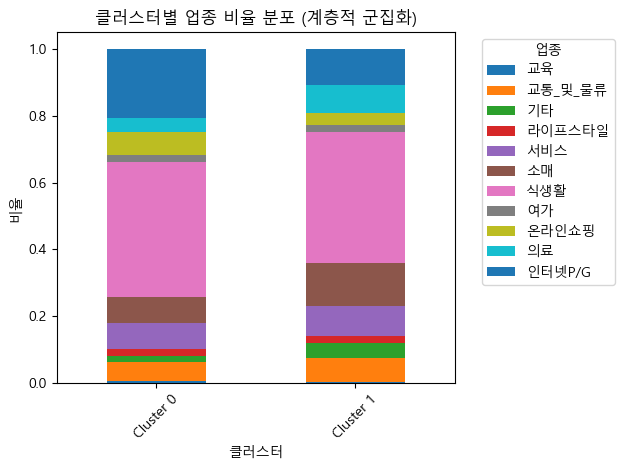

In [241]:
# 데이터 전처리 - 더 단순하게
grouped_data = data.groupby(['연령대', '성별', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) # 비율로 만들거나 아니거나

def chi2_distance(X, Y):
    # 카이제곱 거리 계산 공식 구현
    return np.sum((X - Y) ** 2 / (X + Y + np.finfo(float).eps))

# 거리 행렬 계산
dist_matrix = np.zeros((len(grouped_data), len(grouped_data)))
for i in range(len(grouped_data)):
    for j in range(len(grouped_data)):
        dist_matrix[i,j] = chi2_distance(grouped_data.iloc[i], grouped_data.iloc[j])

# 계층적 군집화 수행 
# affinity 파라미터 제거하고 metric_params 사용
hierarchical = AgglomerativeClustering(
    n_clusters=2,
    metric='precomputed', #카이제곱 거리를 제공하지 않는다
    linkage='complete'
)
clusters = hierarchical.fit_predict(dist_matrix)

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
linkage_matrix = linkage(squareform(dist_matrix), method='complete')
dendrogram(linkage_matrix)
plt.title('카이제곱 거리 기반 계층적 군집화 덴드로그램')
plt.xlabel('샘플 인덱스')
plt.ylabel('거리')
plt.show()



#-----------------------------------------------------이 아래는 사실상 시각화

# 클러스터별 평균 계산 리스트 생성
cluster_means = []

# 3개의 그룹으로 클러스팅 하였으므로 3개의 평균 계산
# clusters가 계층적 군집화를 적용 및 예측한 모델
for i in range(2):
    cluster_mask = clusters == i
    cluster_data = grouped_data[cluster_mask]
    cluster_means.append(cluster_data.mean())

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")
for i in range(2):
    # 각 클러스터 별 구성 요소 를 cluster_groups에 저장
    cluster_groups = grouped_data.index[clusters == i]
    print(f"\nCluster {i} 특징:")
    print(f"포함된 그룹: {', '.join([f'{idx[0]}-{idx[1]}' for idx in cluster_groups])}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means[i].sort_values(ascending=False).items():
        ratio_pct = ratio / cluster_means[i].sum()  # 비율로 변환
        print(f"{category}비율: {ratio_pct:.1%}")
        print(f"{category}의 그룹 내 거래 횟수 평균: {round(ratio, 2)} \n")
    print("-" * 50)

# 각 클러스터를 모아서 DataFrame으로 변환 - 시각화용
cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(2)])

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True) #이게 더 편한듯.
plt.title('클러스터별 업종 비율 분포 (계층적 군집화)')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### GMM


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 그룹: 20대-남, 20대-여, 30대-남, 30대-여, 40대-남, 40대-여, 50대-남

주요 업종 비율:
식생활비율: 41.4%
식생활의 그룹 내 거래 횟수 평균: 108759.29 

인터넷P/G비율: 19.2%
인터넷P/G의 그룹 내 거래 횟수 평균: 50261.14 

소매비율: 7.9%
소매의 그룹 내 거래 횟수 평균: 20826.86 

서비스비율: 7.9%
서비스의 그룹 내 거래 횟수 평균: 20646.14 

온라인쇼핑비율: 6.2%
온라인쇼핑의 그룹 내 거래 횟수 평균: 16316.43 

교통_및_물류비율: 6.1%
교통_및_물류의 그룹 내 거래 횟수 평균: 15962.71 

의료비율: 4.4%
의료의 그룹 내 거래 횟수 평균: 11621.0 

여가비율: 2.4%
여가의 그룹 내 거래 횟수 평균: 6309.0 

기타비율: 2.1%
기타의 그룹 내 거래 횟수 평균: 5480.29 

라이프스타일비율: 1.8%
라이프스타일의 그룹 내 거래 횟수 평균: 4846.14 

교육비율: 0.5%
교육의 그룹 내 거래 횟수 평균: 1413.29 

--------------------------------------------------

Cluster 1 특징:
포함된 그룹: 50대-여, 60대이상-남, 60대이상-여

주요 업종 비율:
식생활비율: 37.0%
식생활의 그룹 내 거래 횟수 평균: 32634.0 

소매비율: 13.9%
소매의 그룹 내 거래 횟수 평균: 12285.0 

인터넷P/G비율: 11.1%
인터넷P/G의 그룹 내 거래 횟수 평균: 9772.33 

서비스비율: 9.3%
서비스의 그룹 내 거래 횟수 평균: 8180.33 

의료비율: 8.9%
의료의 그룹 내 거래 횟수 평균: 7815.33 

교통_및_물류비율: 7.0%
교통_및_물류의 그룹 내 거래 횟수 평균: 6212.33 

기타비율: 4.8%
기타의 그룹 내 거래 횟수 평균: 4212.33 


<Figure size 1200x800 with 0 Axes>

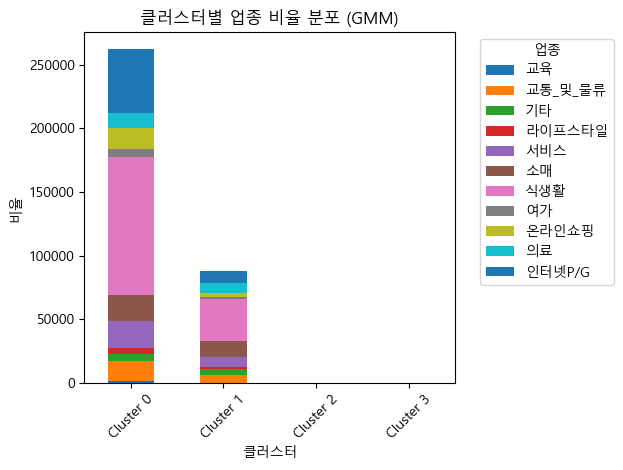


GMM 모델 평가:
로그 가능도 점수: -9.35


In [242]:
# 데이터 전처리 - 연령대, 성별을 기준으로 5개의 그룹으로 그룹화 하고자 한다.
# 사실 덴드로그램에 따르면 2개가 더 합리적이긴 하지만...
# 결국 2개로 변경 - 성별이 큰 영향을 끼치지 앉는다고 판단함.

grouped_data = data.groupby(['연령대', '성별', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
#grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) #비율로 보고 싶으면 적용

# GMM 적용
gmm = GaussianMixture(n_components=2, random_state=42)
clusters = gmm.fit_predict(grouped_data)

#-----------------------------------------------------이 아래는 사실상 시각화

# 클러스터별 평균 계산
cluster_means = []
for i in range(4):
    cluster_mask = clusters == i
    cluster_data = grouped_data[cluster_mask]
    cluster_means.append(cluster_data.mean())

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")
for i in range(4):
    cluster_groups = grouped_data.index[clusters == i]
    print(f"\nCluster {i} 특징:")
    print(f"포함된 그룹: {', '.join([f'{idx[0]}-{idx[1]}' for idx in cluster_groups])}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means[i].sort_values(ascending=False).items():
        ratio_pct = ratio / cluster_means[i].sum() # 비율로 변환
        print(f"{category}비율: {ratio_pct:.1%}")
        print(f"{category}의 그룹 내 거래 횟수 평균: {round(ratio, 2)} \n")
    print("-" * 50)

# DataFrame으로 변환
cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(4)])

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포 (GMM)')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# GMM 모델의 로그 가능도 출력 - 만점은 딱히 없고 높으면 높을수록 좋다!
print("\nGMM 모델 평가:")
print(f"로그 가능도 점수: {gmm.score(grouped_data):.2f}")

### K-means - 사용 X
- 군집별 계층화와 GMM을 우선으로 사용하자.


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 그룹: 20대-남, 20대-여, 30대-남, 30대-여, 40대-남, 40대-여, 50대-남

주요 업종 비율:
식생활비율: 41.4%
식생활의 그룹 내 거래 횟수 평균: 108759.29 

인터넷P/G비율: 19.2%
인터넷P/G의 그룹 내 거래 횟수 평균: 50261.14 

소매비율: 7.9%
소매의 그룹 내 거래 횟수 평균: 20826.86 

서비스비율: 7.9%
서비스의 그룹 내 거래 횟수 평균: 20646.14 

온라인쇼핑비율: 6.2%
온라인쇼핑의 그룹 내 거래 횟수 평균: 16316.43 

교통_및_물류비율: 6.1%
교통_및_물류의 그룹 내 거래 횟수 평균: 15962.71 

의료비율: 4.4%
의료의 그룹 내 거래 횟수 평균: 11621.0 

여가비율: 2.4%
여가의 그룹 내 거래 횟수 평균: 6309.0 

기타비율: 2.1%
기타의 그룹 내 거래 횟수 평균: 5480.29 

라이프스타일비율: 1.8%
라이프스타일의 그룹 내 거래 횟수 평균: 4846.14 

교육비율: 0.5%
교육의 그룹 내 거래 횟수 평균: 1413.29 

--------------------------------------------------

Cluster 1 특징:
포함된 그룹: 50대-여, 60대이상-남, 60대이상-여

주요 업종 비율:
식생활비율: 37.0%
식생활의 그룹 내 거래 횟수 평균: 32634.0 

소매비율: 13.9%
소매의 그룹 내 거래 횟수 평균: 12285.0 

인터넷P/G비율: 11.1%
인터넷P/G의 그룹 내 거래 횟수 평균: 9772.33 

서비스비율: 9.3%
서비스의 그룹 내 거래 횟수 평균: 8180.33 

의료비율: 8.9%
의료의 그룹 내 거래 횟수 평균: 7815.33 

교통_및_물류비율: 7.0%
교통_및_물류의 그룹 내 거래 횟수 평균: 6212.33 

기타비율: 4.8%
기타의 그룹 내 거래 횟수 평균: 4212.33 


<Figure size 1200x800 with 0 Axes>

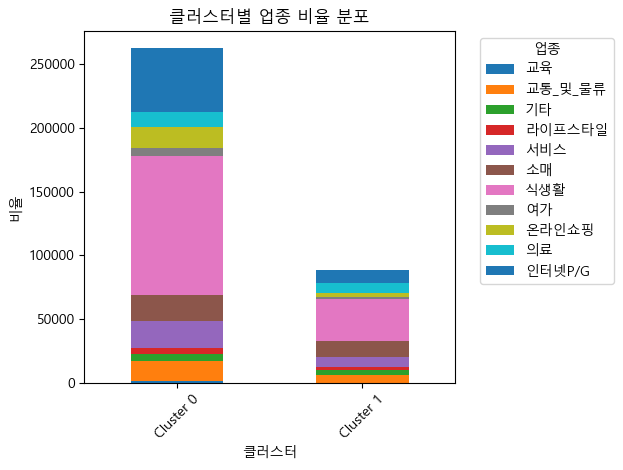

In [243]:
# 데이터 전처리 - 연령대, 성별을 기준으로 5개의 그룹으로 그룹화 하고자 한다.
# 그룹화 근거는 없음

grouped_data = data.groupby(['연령대', '성별', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
#grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# K-means 직접 적용
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(grouped_data)

# 클러스터별 평균 계산
cluster_means = []
for i in range(2):
    cluster_mask = clusters == i
    cluster_data = grouped_data[cluster_mask]
    cluster_means.append(cluster_data.mean())

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")
for i in range(2):
    cluster_groups = grouped_data.index[clusters == i]
    print(f"\nCluster {i} 특징:")
    print(f"포함된 그룹: {', '.join([f'{idx[0]}-{idx[1]}' for idx in cluster_groups])}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means[i].sort_values(ascending=False).items():
        ratio_pct = ratio / cluster_means[i].sum() # 비율로 변환
        print(f"{category}비율: {ratio_pct:.1%}")
        print(f"{category}의 그룹 내 거래 횟수 평균: {round(ratio, 2)} \n")
    print("-" * 50)

# DataFrame으로 변환
cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(2)])

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 지역 그룹화

- 시군구별 업종 거래 횟수 비율 계산
- 나이성별떄와는 달리 51개 정도로 더 폭넓음
- 단, 여전히 차원축소 기법을 적용하기엔 모자람.

### 데이터 추가 전처리

- 기타 전문점이 존재
- 그러나 기타 전문점이 불명확
- 인터넷 쇼핑도 비중이 너무 크다


- 기타 및 인터넷쇼핑 중분류 제거

In [244]:
# 기타와 인터넷쇼핑 제거 - 둘다 유의미한 유추가 어렵다!!
# fixed_data = data[~data['가맹점업종명_범주화_중분류'].isin(['기타', '온라인쇼핑'])]
# fixed_data.info()

fixed_data = data.copy()

In [245]:
# 업종, 지역별 count 또는 비율 계산 데이터

grouped_data = fixed_data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data['총합'] = grouped_data.sum(axis=1)

In [246]:
grouped_data

가맹점업종명_범주화_중분류,교육,교통_및_물류,기타,라이프스타일,서비스,소매,식생활,여가,온라인쇼핑,의료,인터넷P/G,총합
가맹점_시군구,,,,,,,,,,,,
가평군,79,497,15,28,239,358,3081,249,0,114,0,4660
강남구,1087,11482,1649,2622,19233,19404,50173,2648,15767,7990,62076,194131
강동구,184,596,344,337,984,2383,10912,498,1603,1812,3,19656
강북구,27,324,26,349,676,1042,6369,521,4,866,5,10209
강서구,200,2699,64,657,4923,3905,17316,897,437,2376,464,33938
강화군,3,61,2,6,91,83,739,44,0,50,2,1081
계양구,11,435,11,115,217,807,3259,159,2,480,3,5499
고양시 덕양구,54,1773,33,558,733,3639,10146,512,0,1138,4,18590
고양시 일산동구,92,917,49,468,732,2144,10208,594,2,1230,11,16447


In [247]:
# 순서대로 정리

sorted_data = grouped_data.sort_values('총합', ascending=False)
#sorted_data = sorted_data.iloc[:-5] # 동두천, 연천시, 과천시, 양평군, 도봉구구 3년 전체 거래 건수가 각각 2,5,106건 -> 삭제

<Figure size 1200x800 with 0 Axes>

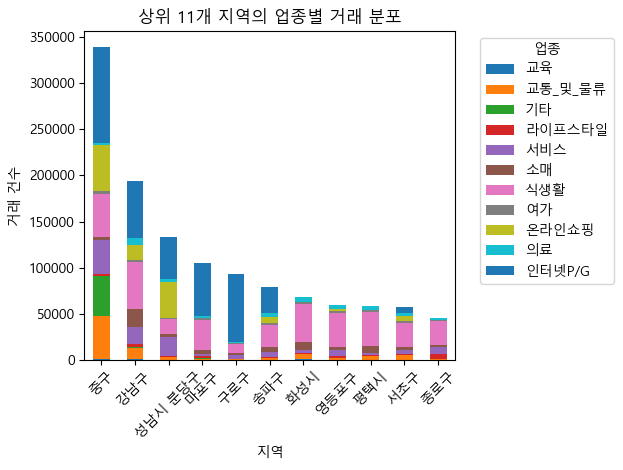

In [248]:
# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
sorted_data.head(11).drop('총합', axis=1).plot(kind='bar', stacked=True)
plt.title('상위 11개 지역의 업종별 거래 분포')
plt.xlabel('지역')
plt.ylabel('거래 건수')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 강남구, 강동구, 강서구, 구로구, 서초구, 성남시 분당구, 송파구, 영등포구, 용산구, 종로구, 중구

## 년도 별 그룹 간 선호 보기

In [249]:
# 그룹화 - 나이 및 성별
# 계층적 군집화, GMM, K-means 기반

def age_gender_group(data):
    # 연령대와 성별에 따른 그룹 매핑 딕셔너리 생성
    age_gender_mapping = {
        ('30대', '남'): 'Y',
        ('40대', '남'): 'Y', 
        ('40대', '여'): 'Y',
        ('50대', '남'): 'Y',
        ('50대', '여'): 'O',
        ('60대이상', '남'): 'O',
        ('60대이상', '여'): 'O'
    }
    
    # 연령대와 성별 조합으로 그룹 할당
    data['그룹_나이성별'] = data.apply(
        lambda x: age_gender_mapping.get(
            (x['연령대'], x['성별']), 'Y'
        ),
        axis=1
    )
    
    return data

fixed_data = age_gender_group(fixed_data)

In [250]:
fixed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2101736 entries, 0 to 2123849
Data columns (total 17 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   거래년월            object
 1   고객ID            int64 
 2   가맹점업종명          object
 3   가맹점_광역시도        object
 4   가맹점_시군구         object
 5   승인건수            object
 6   승인금액            int64 
 7   연령대             object
 8   성별              object
 9   자택_시도           object
 10  자택_시군구          object
 11  승인건수_수치화        int64 
 12  년도              int64 
 13  가맹점업종명_범주화_중분류  object
 14  거래년월_분기         int64 
 15  거래년월_월          int64 
 16  그룹_나이성별         object
dtypes: int64(6), object(11)
memory usage: 288.6+ MB


In [251]:
# 이 데이터로 무엇을 볼 것인가?
# 그룹별로 나눴으니 그룹별 소비 지역을 보자!!
# 그룹별 3년간 소비 현황을 보는 것도 좋겠다.

fixed_data_industrial = fixed_data.groupby(['그룹_나이성별','가맹점업종명_범주화_중분류', '년도']).size().unstack(fill_value=0)
fixed_data_reginal = fixed_data.groupby(['그룹_나이성별','가맹점_시군구', '년도']).size().unstack(fill_value=0)

def diff_btw_cols(data):
    # 행 별 총합을 제시하고 각 열의 차이를 계산
    data['총합'] = data.sum(axis=1)

    diff_cols = []
    cols = data.columns.tolist()
    
    for i in range(len(cols)-1):
        col_name = f'{cols[i]}_{cols[i+1]}_증감'
        data[col_name] = data[cols[i+1]] - data[cols[i]]
        diff_cols.append(col_name)

    data = data.iloc[:, :-1]
        
    return data

fixed_data_industrial_chg = diff_btw_cols(fixed_data_industrial)
fixed_data_reginal_chg = diff_btw_cols(fixed_data_reginal)

In [252]:
y_industrial = fixed_data_industrial_chg.loc['Y'].sort_values(by='총합', ascending=False)
y_industrial

년도,2021,2022,2023,총합,2021_2022_증감,2022_2023_증감
가맹점업종명_범주화_중분류,,,,,,
식생활,234805,250859,275651,761315,16054,24792
인터넷P/G,127382,115625,108821,351828,-11757,-6804
소매,50892,46677,48219,145788,-4215,1542
서비스,50240,46831,47452,144523,-3409,621
온라인쇼핑,38897,36097,39221,114215,-2800,3124
교통_및_물류,39048,36070,36621,111739,-2978,551
의료,23544,27015,30788,81347,3471,3773
여가,11204,15163,17796,44163,3959,2633
기타,13894,12369,12099,38362,-1525,-270


In [253]:
'''
m_industrial = fixed_data_industrial_chg.loc['M'].sort_values(by='총합', ascending=False)
m_industrial
'''

"\nm_industrial = fixed_data_industrial_chg.loc['M'].sort_values(by='총합', ascending=False)\nm_industrial\n"

In [254]:
o_industrial = fixed_data_industrial_chg.loc['O'].sort_values(by='총합', ascending=False)
o_industrial

년도,2021,2022,2023,총합,2021_2022_증감,2022_2023_증감
가맹점업종명_범주화_중분류,,,,,,
식생활,25368,32517,40017,97902,7149,7500
소매,11017,12350,13488,36855,1333,1138
인터넷P/G,8570,9569,11178,29317,999,1609
서비스,6966,8314,9261,24541,1348,947
의료,6263,7732,9451,23446,1469,1719
교통_및_물류,5510,6045,7082,18637,535,1037
기타,3862,4251,4524,12637,389,273
온라인쇼핑,2797,3096,3589,9482,299,493
라이프스타일,1770,1889,2146,5805,119,257


In [255]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
y_regional =  fixed_data_reginal_chg.loc['Y'].sort_values(by='총합', ascending=False)
y_regional.head(10)

년도,2021,2022,2023,총합,2021_2022_증감,2022_2023_증감
가맹점_시군구,,,,,,
중구,106915,97196,94753,298864,-9719,-2443
강남구,59714,56780,55235,171729,-2934,-1545
성남시 분당구,43275,40109,38660,122044,-3166,-1449
마포구,34627,32523,29646,96796,-2104,-2877
구로구,30178,28375,27854,86407,-1803,-521
송파구,17552,20772,29035,67359,3220,8263
화성시,18452,18795,20633,57880,343,1838
영등포구,16369,18349,19104,53822,1980,755
평택시,15585,16718,18286,50589,1133,1568


In [256]:
#m_regional =  fixed_data_reginal_chg.loc['M'].sort_values(by='총합', ascending=False)
#m_regional.head(10)

In [257]:
o_regional =  fixed_data_reginal_chg.loc['O'].sort_values(by='총합', ascending=False)
o_regional.head(10)

년도,2021,2022,2023,총합,2021_2022_증감,2022_2023_증감
가맹점_시군구,,,,,,
중구,12289,13169,14913,40371,880,1744
강남구,6083,7300,9019,22402,1217,1719
성남시 분당구,2835,3751,4778,11364,916,1027
송파구,2866,3821,4674,11361,955,853
화성시,2941,4003,3851,10795,1062,-152
서초구,2873,3107,3764,9744,234,657
평택시,2611,2645,2843,8099,34,198
마포구,2450,2707,2711,7868,257,4
구로구,1939,2157,2758,6854,218,601


## TREE로 각 그룹당 어떤 변수가 분류에 가장 큰 영향력을 끼치는지 해보기 - 폐기 -
- 그룹_나이성별을 target으로 둬 보자.

In [258]:
# 1. 필요한 라이브러리 임포트
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def prepare_data(data, features, target):
    # One-Hot Encoding
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X = encoder.fit_transform(data[features])
    feature_names = encoder.get_feature_names_out(features)
    X = pd.DataFrame(X, columns=feature_names)
    y = data[target]
    return X, y, feature_names

def train_and_evaluate_model(X, y):
    # 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # 모델 학습
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # 성능 평가
    y_pred = model.predict(X_test)
    print("Model Performance Report:")
    print(classification_report(y_test, y_pred))
    
    return model

def plot_feature_importance(model, feature_names):
    # 각 클래스별 이진 분류를 위한 중요도 계산
    importances_by_class = {}
    classes = ['M', 'Y', 'O']
    
    plt.figure(figsize=(15, 30))
    
    for i, class_label in enumerate(classes):
        # 해당 클래스에 대한 이진 레이블 생성
        y_binary = (y == class_label).astype(int)
        
        # 이진 분류 모델 학습
        binary_model = RandomForestClassifier(random_state=42)
        binary_model.fit(X, y_binary)
        
        # 중요도 계산
        importances = binary_model.feature_importances_
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        })
        importance_df = importance_df.sort_values(by='importance', ascending=False)
        
        # 서브플롯 생성
        plt.subplot(3, 1, i+1)
        plt.barh(importance_df['feature'].head(15), importance_df['importance'].head(15), color='skyblue')
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.title(f'Feature Importance for Class {class_label}')
        plt.gca().invert_yaxis()
        
        importances_by_class[class_label] = importance_df
        
    plt.tight_layout()
    plt.show()
    
    return importances_by_class

In [259]:
'''
# 메인 실행
features = ['가맹점_시군구', '가맹점업종명_범주화_중분류']
target = '그룹_나이성별'


X, y, feature_names = prepare_data(fixed_data, features, target)
model = train_and_evaluate_model(X, y)
#importance_df = plot_feature_importance(model, feature_names)
'''

"\n# 메인 실행\nfeatures = ['가맹점_시군구', '가맹점업종명_범주화_중분류']\ntarget = '그룹_나이성별'\n\n\nX, y, feature_names = prepare_data(fixed_data, features, target)\nmodel = train_and_evaluate_model(X, y)\n#importance_df = plot_feature_importance(model, feature_names)\n"

In [260]:
#importance_df = plot_feature_importance(model, feature_names)

# 클러스터링 기법 활용 - 지역
- 결과가 비슷해야 신빙성이 생긴다

## 계층적 군집화

- 데이터가 뭔가 이상함 -> 수정 요망

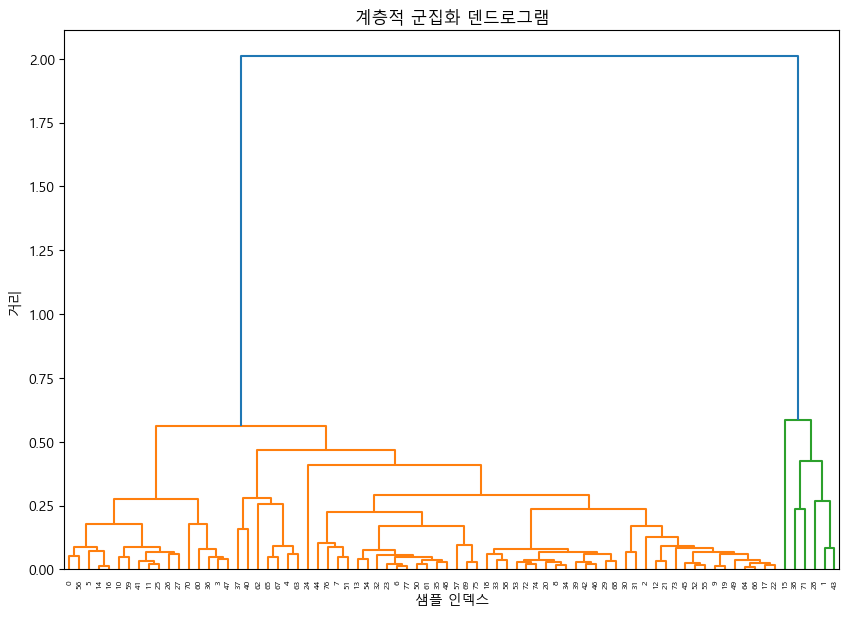


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 그룹: 강남구, 구로구, 마포구, 성남시 분당구, 송파구, 중구

주요 업종 비율:
인터넷P/G비율: 44.4%
인터넷P/G의 그룹 내 거래 횟수 평균: 0.44 

식생활비율: 20.7%
식생활의 그룹 내 거래 횟수 평균: 0.21 

온라인쇼핑비율: 10.1%
온라인쇼핑의 그룹 내 거래 횟수 평균: 0.1 

서비스비율: 8.4%
서비스의 그룹 내 거래 횟수 평균: 0.08 

소매비율: 4.4%
소매의 그룹 내 거래 횟수 평균: 0.04 

교통_및_물류비율: 4.4%
교통_및_물류의 그룹 내 거래 횟수 평균: 0.04 

의료비율: 2.8%
의료의 그룹 내 거래 횟수 평균: 0.03 

기타비율: 2.4%
기타의 그룹 내 거래 횟수 평균: 0.02 

여가비율: 1.2%
여가의 그룹 내 거래 횟수 평균: 0.01 

라이프스타일비율: 1.0%
라이프스타일의 그룹 내 거래 횟수 평균: 0.01 

교육비율: 0.3%
교육의 그룹 내 거래 횟수 평균: 0.0 

--------------------------------------------------

Cluster 1 특징:
포함된 그룹: 가평군, 강동구, 강북구, 강서구, 강화군, 계양구, 고양시 덕양구, 고양시 일산동구, 고양시 일산서구, 과천시, 관악구, 광명시, 광주시, 광진구, 구리시, 군포시, 금천구, 김포시, 남동구, 남양주시, 노원구, 도봉구, 동구, 동대문구, 동두천시, 동작구, 미추홀구, 부천시, 부천시 소사구, 부천시 오정구, 부천시 원미구, 부평구, 서구, 서대문구, 서초구, 성남시 수정구, 성남시 중원구, 성동구, 성북구, 수원시 권선구, 수원시 영통구, 수원시 장안구, 수원시 팔달구, 시흥시, 안산시 단원구, 안산시 상록구, 안성시, 안양시 동안구, 안양시 만안구, 양주시, 양천구, 양평군, 여주시, 연수구, 연천군, 영등포구, 오산시, 용산구, 용인시 기흥구, 용인시 수지구, 용인시 처인구, 은평구, 의왕시

<Figure size 1200x800 with 0 Axes>

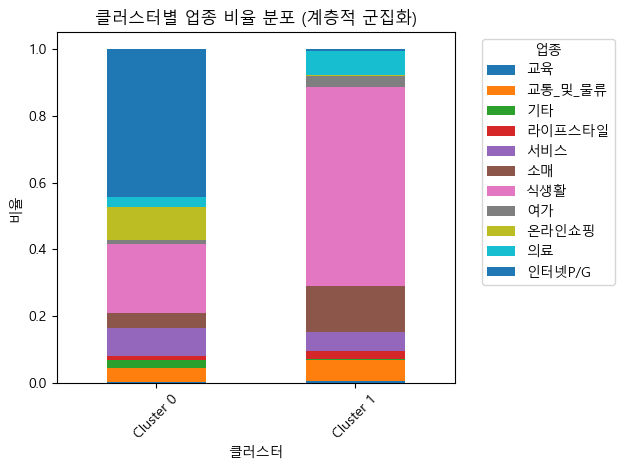

In [261]:
# 데이터 전처리 - 더 단순하게 분할표 만들기
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) # 비율로 만들거나 아니거나

# 군집 갯수를 조정하기 쉽게 함수화
def perform_hierarchical_clustering(data, n_clusters=2):
    # 계층적 군집화 수행
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = hierarchical.fit_predict(data)
    
    # 덴드로그램 시각화
    plt.figure(figsize=(10, 7))
    linkage_matrix = linkage(data, method='ward', metric='euclidean')
    dendrogram(linkage_matrix)
    plt.title('계층적 군집화 덴드로그램')
    plt.xlabel('샘플 인덱스')
    plt.ylabel('거리')
    plt.show()

    # 클러스터별 평균 계산
    # 클러스터별 평균 계산 리스트 생성
    cluster_means = []

    # 3개의 그룹으로 클러스팅 하였으므로 3개의 평균 계산
    # clusters가 계층적 군집화를 적용 및 예측한 모델
    for i in range(2):
        cluster_mask = clusters == i
        cluster_data = grouped_data[cluster_mask]
        cluster_means.append(cluster_data.mean())

    # 클러스터별 특징 출력
    print("\n=== 각 클러스터의 특징 ===\n")
    for i in range(2):
        # 각 클러스터 별 구성 요소 를 cluster_groups에 저장
        cluster_groups = grouped_data.index[clusters == i]
        print(f"\nCluster {i} 특징:")
        print(f"포함된 그룹: {', '.join([f'{idx}' for idx in cluster_groups])}")
        print("\n주요 업종 비율:")
        for category, ratio in cluster_means[i].sort_values(ascending=False).items():
            ratio_pct = ratio / cluster_means[i].sum()  # 비율로 변환
            print(f"{category}비율: {ratio_pct:.1%}")
            print(f"{category}의 그룹 내 거래 횟수 평균: {round(ratio, 2)} \n")
        print("-" * 50)

    # 각 클러스터를 모아서 DataFrame으로 변환 - 시각화용
    cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(2)])

    # Stacked Bar Plot 그리기
    plt.figure(figsize=(12, 8))
    cluster_means_df.plot(kind='bar', stacked=True) #이게 더 편한듯.
    plt.title('클러스터별 업종 비율 분포 (계층적 군집화)')
    plt.xlabel('클러스터')
    plt.ylabel('비율')
    plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return clusters, cluster_means_df

# 함수 실행
clusters, cluster_means_df = perform_hierarchical_clustering(grouped_data, n_clusters=2)

### K-means

In [262]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


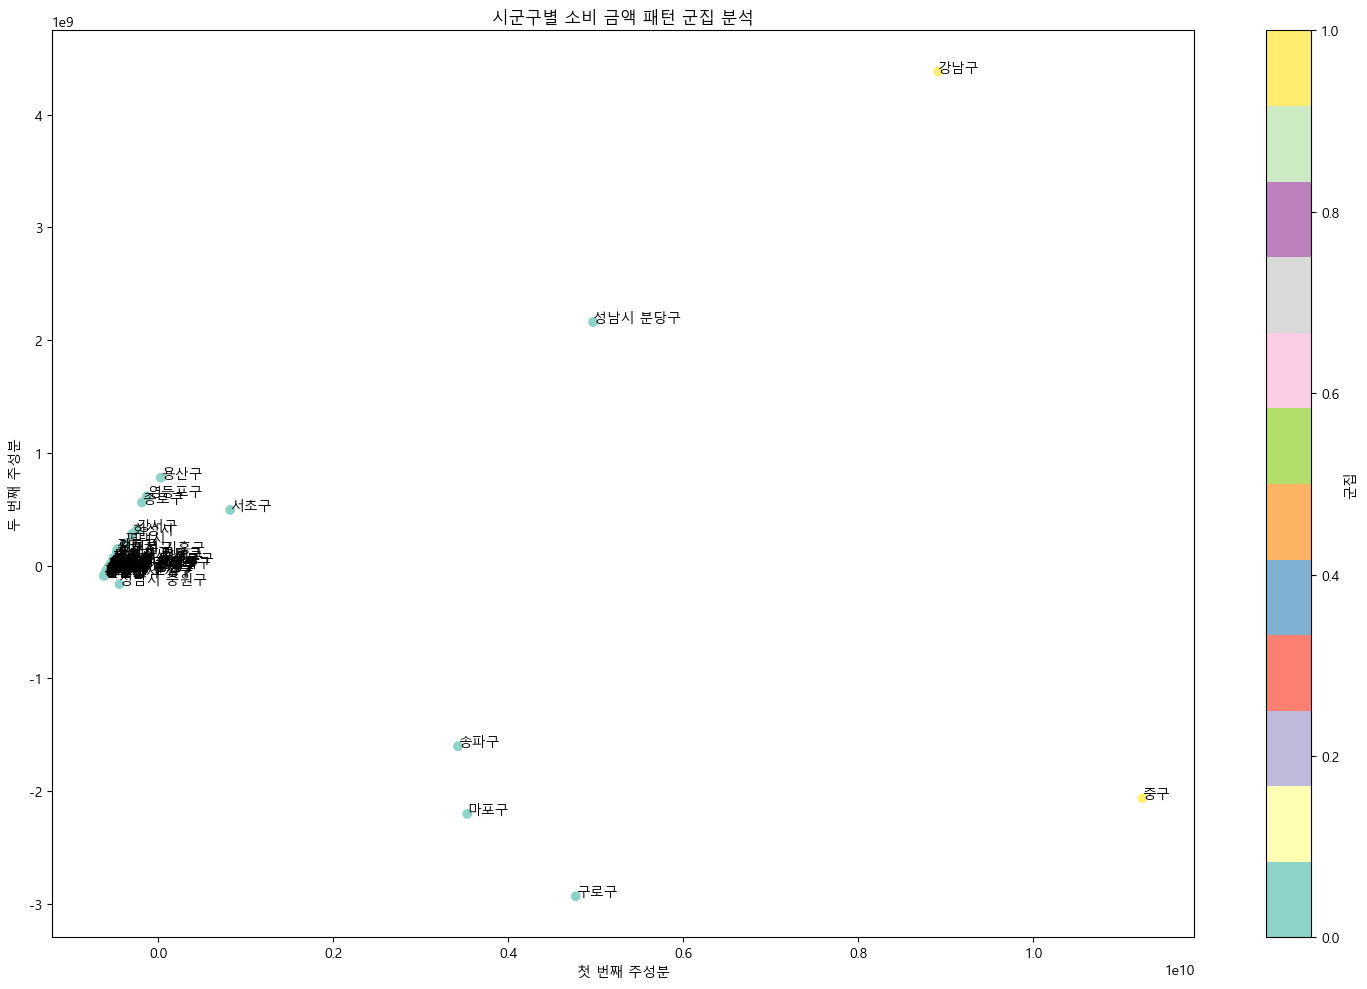


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 시군구: 가평군, 강동구, 강북구, 강서구, 강화군, 계양구, 고양시 덕양구, 고양시 일산동구, 고양시 일산서구, 과천시, 관악구, 광명시, 광주시, 광진구, 구로구, 구리시, 군포시, 금천구, 김포시, 남동구, 남양주시, 노원구, 도봉구, 동구, 동대문구, 동두천시, 동작구, 마포구, 미추홀구, 부천시, 부천시 소사구, 부천시 오정구, 부천시 원미구, 부평구, 서구, 서대문구, 서초구, 성남시 분당구, 성남시 수정구, 성남시 중원구, 성동구, 성북구, 송파구, 수원시 권선구, 수원시 영통구, 수원시 장안구, 수원시 팔달구, 시흥시, 안산시 단원구, 안산시 상록구, 안성시, 안양시 동안구, 안양시 만안구, 양주시, 양천구, 양평군, 여주시, 연수구, 연천군, 영등포구, 오산시, 용산구, 용인시 기흥구, 용인시 수지구, 용인시 처인구, 은평구, 의왕시, 의정부시, 이천시, 종로구, 중랑구, 파주시, 평택시, 포천시, 하남시, 화성시

업종별 승인금액 비율:
식생활: 30392500000.0%
인터넷P/G: 26473171052.6%
서비스: 13326881578.9%
소매: 12540486842.1%
온라인쇼핑: 10107223684.2%
의료: 10062868421.1%
교통_및_물류: 6686368421.1%
여가: 4660592105.3%
교육: 4219434210.5%
라이프스타일: 3471105263.2%
기타: 972263157.9%
--------------------------------------------------

Cluster 1 특징:
포함된 시군구: 강남구, 중구

업종별 승인금액 비율:
인터넷P/G: 839252500000.0%
서비스: 577968500000.0%
온라인쇼핑: 272090500000.0%
식생활: 149418000000.0%
기타: 132717000000.0%
교통_및_물류: 106676500000.0%
의료: 84895000000.0%
소매: 

<Figure size 1200x800 with 0 Axes>

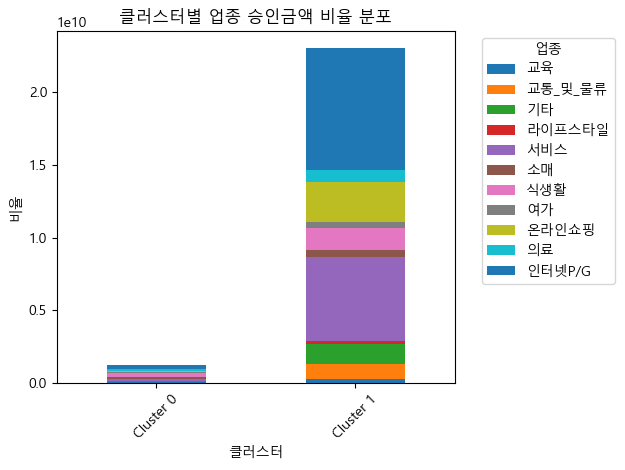

In [263]:
# 서울 내 지역별 소비 금액 비교
# 시군구별 업종별 승인금액 합계 계산
category_sum = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류'])['승인금액'].sum().unstack(fill_value=0)

# 각 시군구별 총 승인금액 대비 업종별 비율 계산
#category_sum = category_sum.div(category_sum.sum(axis=1), axis=0).fillna(0)

def analyze_kmeans_clusters(data, n_clusters=5):
    # K-means 클러스터링 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(category_sum)

    # PCA를 사용하여 2차원으로 차원 축소
    pca = PCA(n_components=2)
    category_ratio_pca = pca.fit_transform(category_sum)

    # ----------------------------------------------------------이하는 시각화 관련 코드

    # 산점도 시각화
    plt.figure(figsize=(15, 10))
    scatter = plt.scatter(category_ratio_pca[:, 0], category_ratio_pca[:, 1], c=clusters, cmap='Set3')
    plt.title('시군구별 소비 금액 패턴 군집 분석')
    plt.xlabel('첫 번째 주성분')
    plt.ylabel('두 번째 주성분')
    plt.colorbar(scatter, label='군집')

    # 각 점에 시군구 이름 표시
    for i, txt in enumerate(category_sum.index):
        plt.annotate(txt, (category_ratio_pca[i, 0], category_ratio_pca[i, 1]))

    plt.tight_layout()
    plt.show()

    # 클러스터별 특징 출력
    print("\n=== 각 클러스터의 특징 ===\n")

    # 군집별 평균 업종 비율 계산
    cluster_means = []
    for i in range(n_clusters):
        cluster_mask = clusters == i
        cluster_data = category_sum[cluster_mask]
        cluster_means.append(cluster_data.mean())

    for i in range(n_clusters):
        print(f"\nCluster {i} 특징:")
        print(f"포함된 시군구: {', '.join(category_sum.index[clusters == i])}")
        print("\n업종별 승인금액 비율:")
        for category, ratio in cluster_means[i].sort_values(ascending=False).items():
            print(f"{category}: {ratio:.1%}")
        print("-" * 50)

    # 클러스터별 업종 비율을 stacked bar plot으로 시각화
    cluster_means_df = pd.DataFrame(cluster_means)
    cluster_means_df.index = [f'Cluster {i}' for i in range(n_clusters)]

    plt.figure(figsize=(12, 8))
    cluster_means_df.plot(kind='bar', stacked=True)
    plt.title('클러스터별 업종 승인금액 비율 분포')
    plt.xlabel('클러스터')
    plt.ylabel('비율')
    plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return clusters, cluster_means_df

# 함수 실행 예시 
clusters, cluster_means_df = analyze_kmeans_clusters(data, n_clusters=2)


- 총금액으로 한 결과는 어째 영 별로다....

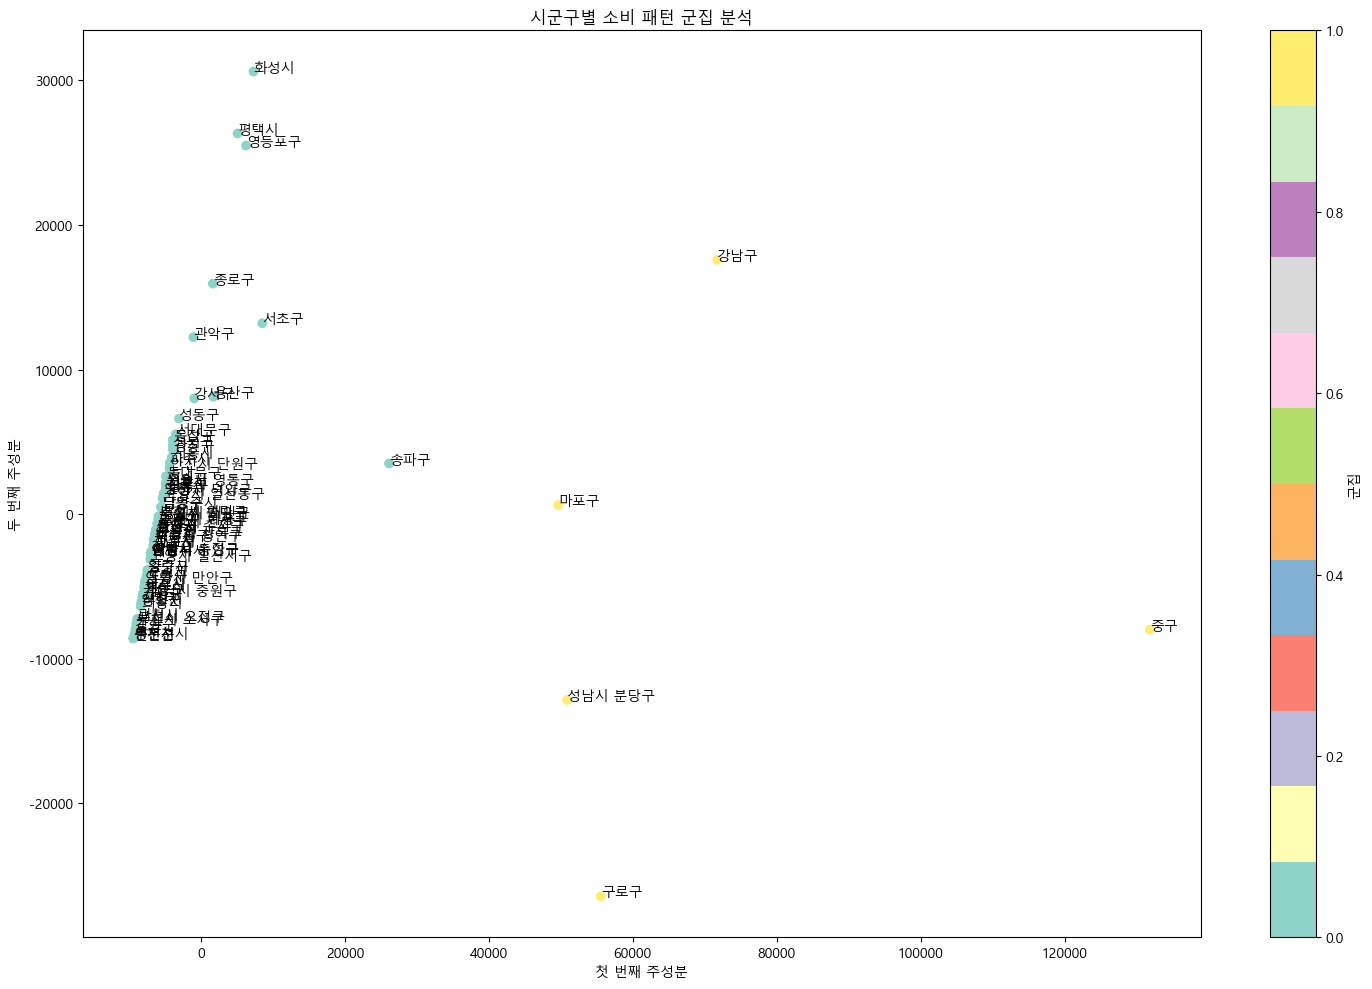


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 시군구: 가평군, 강동구, 강북구, 강서구, 강화군, 계양구, 고양시 덕양구, 고양시 일산동구, 고양시 일산서구, 과천시, 관악구, 광명시, 광주시, 광진구, 구리시, 군포시, 금천구, 김포시, 남동구, 남양주시, 노원구, 도봉구, 동구, 동대문구, 동두천시, 동작구, 미추홀구, 부천시, 부천시 소사구, 부천시 오정구, 부천시 원미구, 부평구, 서구, 서대문구, 서초구, 성남시 수정구, 성남시 중원구, 성동구, 성북구, 송파구, 수원시 권선구, 수원시 영통구, 수원시 장안구, 수원시 팔달구, 시흥시, 안산시 단원구, 안산시 상록구, 안성시, 안양시 동안구, 안양시 만안구, 양주시, 양천구, 양평군, 여주시, 연수구, 연천군, 영등포구, 오산시, 용산구, 용인시 기흥구, 용인시 수지구, 용인시 처인구, 은평구, 의왕시, 의정부시, 이천시, 종로구, 중랑구, 파주시, 평택시, 포천시, 하남시, 화성시

주요 업종 비율:
식생활: 963964.4%
소매: 205575.3%
의료: 119286.3%
서비스: 116497.3%
교통_및_물류: 92653.4%
여가: 55756.2%
인터넷P/G: 53549.3%
라이프스타일: 44441.1%
온라인쇼핑: 24957.5%
교육: 10794.5%
기타: 7095.9%
--------------------------------------------------

Cluster 1 특징:
포함된 시군구: 강남구, 구로구, 마포구, 성남시 분당구, 중구

주요 업종 비율:
인터넷P/G: 6841080.0%
식생활: 3110460.0%
온라인쇼핑: 2109560.0%
서비스: 1680420.0%
교통_및_물류: 1254780.0%
기타: 916380.0%
소매: 651460.0%
의료: 354280.0%
여가: 178020.0%
라이프스타일: 145720.0%
교육: 51820.0%
--------------------------------------------

<Figure size 1200x800 with 0 Axes>

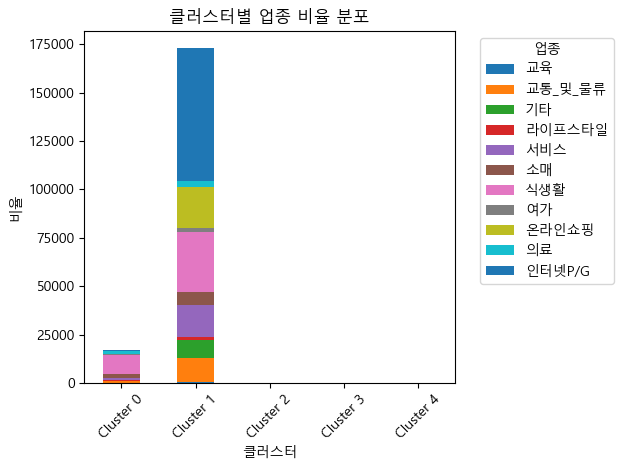

In [264]:
# 서울 내 지역별 소비 비율 비교
# 시군구별 업종 비율 계산
category_ratio = pd.crosstab(data['가맹점_시군구'], data['가맹점업종명_범주화_중분류']) #, normalize='index'

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(category_ratio)

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
category_ratio_pca = pca.fit_transform(category_ratio)

# 산점도 시각화
plt.figure(figsize=(15, 10))
scatter = plt.scatter(category_ratio_pca[:, 0], category_ratio_pca[:, 1], c=clusters, cmap='Set3')
plt.title('시군구별 소비 패턴 군집 분석')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.colorbar(scatter, label='군집')

# 각 점에 시군구 이름 표시
for i, txt in enumerate(category_ratio.index):
    plt.annotate(txt, (category_ratio_pca[i, 0], category_ratio_pca[i, 1]))

plt.tight_layout()
plt.show()

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")

# 군집별 평균 업종 비율 계산
cluster_means = []
for i in range(5):
    cluster_mask = clusters == i
    cluster_data = category_ratio[cluster_mask]
    cluster_means.append(cluster_data.mean())

for i in range(5):
    print(f"\nCluster {i} 특징:")
    print(f"포함된 시군구: {', '.join(category_ratio.index[clusters == i])}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means[i].sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    print("-" * 50)

# 클러스터별 업종 비율을 stacked bar plot으로 시각화
cluster_means_df = pd.DataFrame(cluster_means)
cluster_means_df.index = [f'Cluster {i}' for i in range(5)]

plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


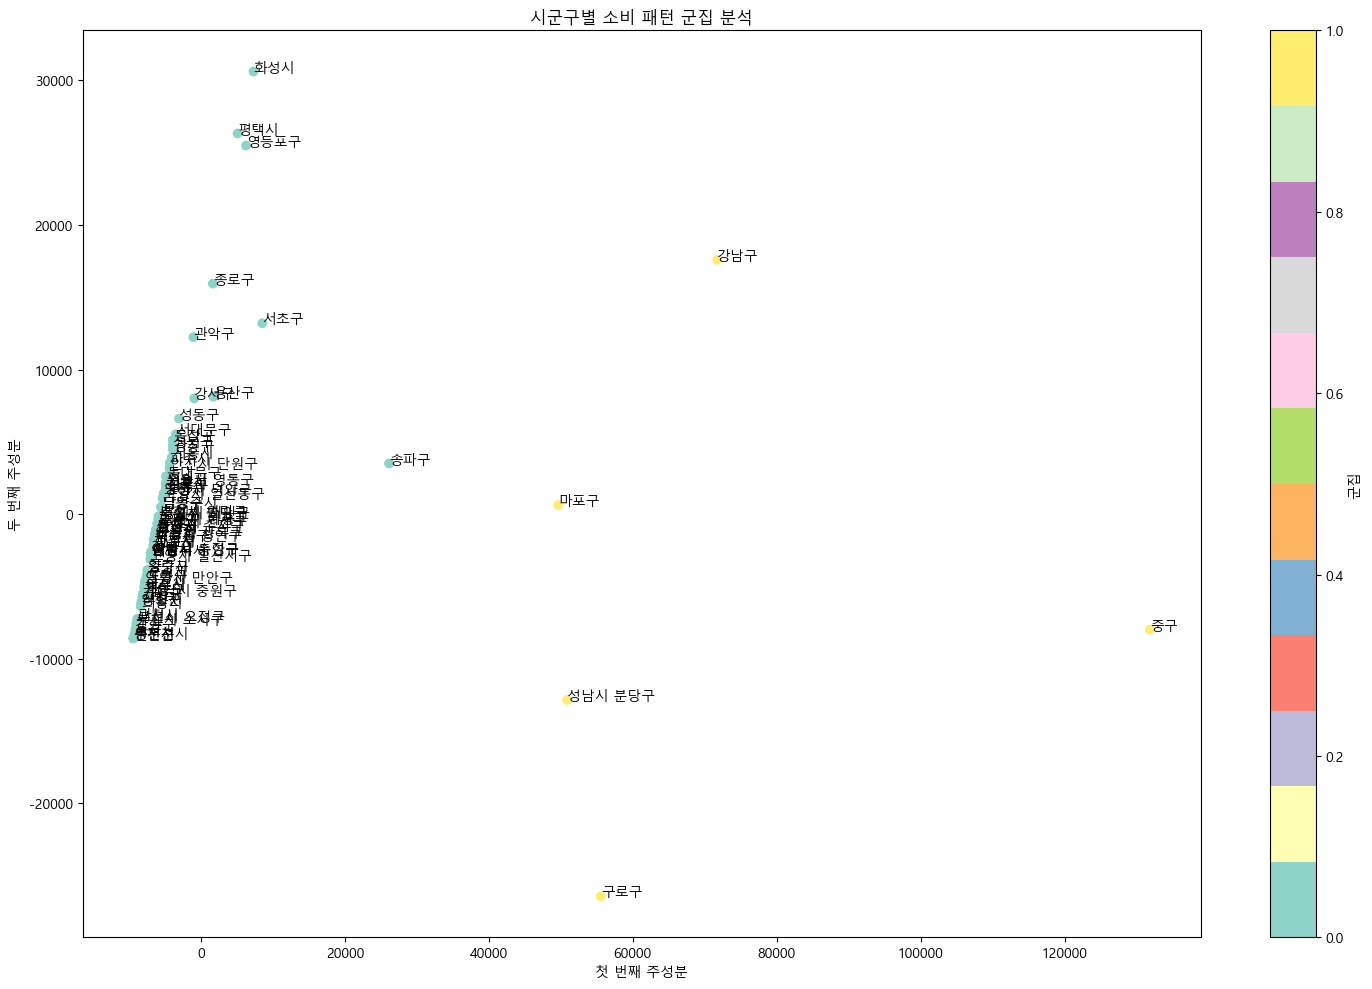


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 시군구: 가평군, 강동구, 강북구, 강서구, 강화군, 계양구, 고양시 덕양구, 고양시 일산동구, 고양시 일산서구, 과천시, 관악구, 광명시, 광주시, 광진구, 구리시, 군포시, 금천구, 김포시, 남동구, 남양주시, 노원구, 도봉구, 동구, 동대문구, 동두천시, 동작구, 미추홀구, 부천시, 부천시 소사구, 부천시 오정구, 부천시 원미구, 부평구, 서구, 서대문구, 서초구, 성남시 수정구, 성남시 중원구, 성동구, 성북구, 송파구, 수원시 권선구, 수원시 영통구, 수원시 장안구, 수원시 팔달구, 시흥시, 안산시 단원구, 안산시 상록구, 안성시, 안양시 동안구, 안양시 만안구, 양주시, 양천구, 양평군, 여주시, 연수구, 연천군, 영등포구, 오산시, 용산구, 용인시 기흥구, 용인시 수지구, 용인시 처인구, 은평구, 의왕시, 의정부시, 이천시, 종로구, 중랑구, 파주시, 평택시, 포천시, 하남시, 화성시

주요 업종 비율:
식생활: 963964.4%
소매: 205575.3%
의료: 119286.3%
서비스: 116497.3%
교통_및_물류: 92653.4%
여가: 55756.2%
인터넷P/G: 53549.3%
라이프스타일: 44441.1%
온라인쇼핑: 24957.5%
교육: 10794.5%
기타: 7095.9%
--------------------------------------------------

Cluster 1 특징:
포함된 시군구: 강남구, 구로구, 마포구, 성남시 분당구, 중구

주요 업종 비율:
인터넷P/G: 6841080.0%
식생활: 3110460.0%
온라인쇼핑: 2109560.0%
서비스: 1680420.0%
교통_및_물류: 1254780.0%
기타: 916380.0%
소매: 651460.0%
의료: 354280.0%
여가: 178020.0%
라이프스타일: 145720.0%
교육: 51820.0%
--------------------------------------------

<Figure size 1200x800 with 0 Axes>

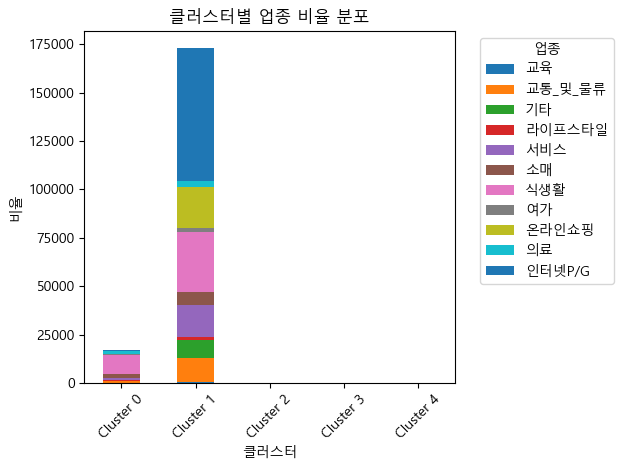

In [265]:
# 서울 내 지역별 소비 비율 비교
# 시군구별 업종 비율 계산
category_ratio = pd.crosstab(data['가맹점_시군구'], data['가맹점업종명_범주화_중분류']) #, normalize='index'

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(category_ratio)

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
category_ratio_pca = pca.fit_transform(category_ratio)

# 산점도 시각화
plt.figure(figsize=(15, 10))
scatter = plt.scatter(category_ratio_pca[:, 0], category_ratio_pca[:, 1], c=clusters, cmap='Set3')
plt.title('시군구별 소비 패턴 군집 분석')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.colorbar(scatter, label='군집')

# 각 점에 시군구 이름 표시
for i, txt in enumerate(category_ratio.index):
    plt.annotate(txt, (category_ratio_pca[i, 0], category_ratio_pca[i, 1]))

plt.tight_layout()
plt.show()

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")

# 군집별 평균 업종 비율 계산
cluster_means = []
for i in range(5):
    cluster_mask = clusters == i
    cluster_data = category_ratio[cluster_mask]
    cluster_means.append(cluster_data.mean())

for i in range(5):
    print(f"\nCluster {i} 특징:")
    print(f"포함된 시군구: {', '.join(category_ratio.index[clusters == i])}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means[i].sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    print("-" * 50)

# 클러스터별 업종 비율을 stacked bar plot으로 시각화
cluster_means_df = pd.DataFrame(cluster_means)
cluster_means_df.index = [f'Cluster {i}' for i in range(5)]

plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


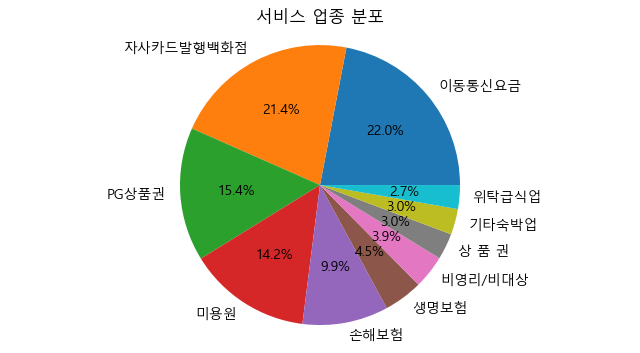

In [266]:
# 서비스 업종 데이터 추출
service_counts = data['가맹점업종명'][data['가맹점업종명_범주화_중분류'] == '서비스'].value_counts().head(10)

# 파이 차트 생성
plt.figure(figsize=(8, 4))
plt.pie(service_counts.values, labels=service_counts.index, autopct='%1.1f%%')
plt.title('서비스 업종 분포')
plt.axis('equal')
plt.show()

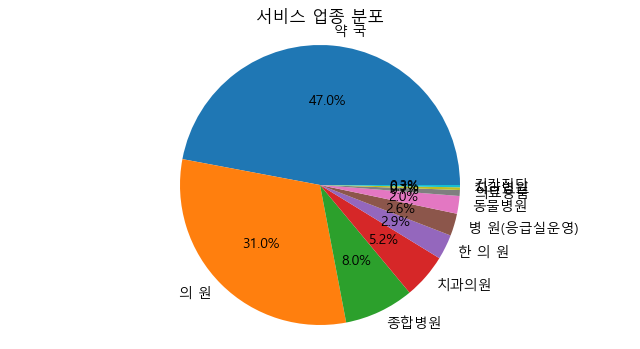

In [267]:
# 서비스 업종 데이터 추출
service_counts = data['가맹점업종명'][data['가맹점업종명_범주화_중분류'] == '의료'].value_counts().head(10)

# 파이 차트 생성
plt.figure(figsize=(8, 4))
plt.pie(service_counts.values, labels=service_counts.index, autopct='%1.1f%%')
plt.title('서비스 업종 분포')
plt.axis('equal')
plt.show()

## 코드로 원래 데이터에 적용 및 통계분석 (진행중)

In [268]:
# 그룹화 - 지역
# 그룹이 다양하니 여기선 mapping을 사용하자.
# k-means 기반? 아직 정확하진 않음.
# 아예 지역 그룹은 안 나누는 걸로?

def regional_group(data):

    group = [
        '강남구', '구로구', '마포구', '성남시 분당구', '송파구', '중구'
    ]

    # 각 그룹별로 특징을 살려 그룹화

    categorizing_list2 = [group]
    categorizing_list_name2 = ['지역_그룹_A']

    # 매핑 딕셔너리 생성
    mapping_dict2 = {}
    for i, clist in enumerate(categorizing_list2):
        for item in clist:
            mapping_dict2[item] = categorizing_list_name2[i]

    data['그룹_지역'] = data['가맹점_시군구'].map(mapping_dict2).fillna('지역_그룹_B')

    return data

    # 범주화 떄 사용했던 것처럼 ampping을 활용한다.

In [269]:
#data = age_gender_group(data)
data = regional_group(fixed_data)

# 통계분석

- 그룹화 된 것들의 비율을 중심으로 분석
- 제대로 그룹화가 되었는가?를 검증하기 위함

- 나이그룹 그룹화 
    - Y:20,30,40대
    - O:50,60대

- 지역그룹 그룹화
    - A: 수도권 서비스 - 기타 중심 지역
    - B: 그 외
### 카이제곱 및 사후분석



In [270]:
from scipy import stats
from scipy.stats import chi2_contingency
from itertools import combinations
from statsmodels.stats.multitest import multipletests

In [271]:
def chi_square(test):
    # 카이제곱 검정 수행
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(test, correction=False)
    
    # 크래머의 V 계산
    n = test.sum().sum()
    min_dim = min(test.shape) - 1
    cramers_v = np.sqrt(chi2_stat / (n * min_dim))

    # 결과 출력
    print(f"독립성 검정 결과:")
    print(f"카이제곱 통계량: {chi2_stat:.3f}")
    print(f"P-value: {p_value:.2e}")
    print(f"자유도: {dof}")
    print(f"크래머의 V: {cramers_v:.3f}")
    print("기대 빈도:\n", expected)

    # 유의수준 0.05에서 검정 결과
    if p_value < 0.05:
        print("\n결론: 귀무가설 기각 - 두 변수는 독립이 아닙니다 (관련성이 있음)")
        if cramers_v < 0.1:
            print("관련성 강도: 매우 약함")
        elif cramers_v < 0.3:
            print("관련성 강도: 약함") 
        elif cramers_v < 0.5:
            print("관련성 강도: 중간")
        else:
            print("관련성 강도: 강함")
    else:
        print("\n결론: 귀무가설 채택 - 두 변수는 독립입니다 (관련성이 없음)")

In [272]:
# 카이제곱 사후 검정을 위한 함수 정의
def post_hoc_chi_square(data, alpha=0.05):

    n_cols = len(data.columns)
    results = []
    
    # 모든 가능한 쌍에 대해 카이제곱 검정 수행
    for i in range(n_cols):
        for j in range(i+1, n_cols):
            col1, col2 = data.columns[i], data.columns[j]
            contingency = pd.DataFrame({
                col1: data[col1],
                col2: data[col2]
            })
            
            chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency)
            results.append({
                'Group 1': col1,
                'Group 2': col2,
                'Chi-square': chi2_stat,
                'p-value': p_value
            })
    
    # 결과를 데이터프레임으로 변환
    results_df = pd.DataFrame(results)
    
    # Bonferroni 교정 - 유의수준에 변화가 일어난다.
    n_tests = len(results)
    results_df['Significant'] = results_df['p-value'] < (alpha / n_tests)
    
    return results_df

### 모비율 검정
- 이게 차라리 나을 듯
- 그룹을 2개로만 나눠서 카이제곱보다 어울릴 수 있다

In [273]:
# 두 그룹 간 비율 분석을 위한 함수 정의
# z-검정을 사용하여 비율의 차이를 찾는다.

def compare_proportions(data, group_col, category_col):
    """
    두 그룹 간의 비율을 비교하고 시각화하는 함수
    
    Parameters:
    - data: 데이터프레임
    - group_col: 그룹 구분 열 이름 
    - category_col: 범주형 변수 열 이름
    """
    
    # 각 그룹별 범주의 비율 계산
    proportions = pd.crosstab(data[category_col], data[group_col], normalize='columns')
    
    # 비율 차이 계산
    prop_diff = proportions.diff(axis=1).iloc[:,-1]
    
    # z-검정을 위한 표준오차 계산
    n1 = data[group_col].value_counts()[0]
    n2 = data[group_col].value_counts()[1]
    
    se = np.sqrt(proportions.iloc[:,0] * (1-proportions.iloc[:,0])/n1 + 
                 proportions.iloc[:,1] * (1-proportions.iloc[:,1])/n2)
    
    # z-score 계산
    z_scores = prop_diff / se
    
    # p-value 계산 (양측 검정)
    p_values = 2 * (1 - stats.norm.cdf(abs(z_scores)))
    
    # 결과 데이터프레임 생성
    results = pd.DataFrame({
        '그룹1_비율': proportions.iloc[:,0],
        '그룹2_비율': proportions.iloc[:,1],
        '비율_차이': prop_diff,
        'Z_score': z_scores,
        'P_value': p_values
    })
    
    # 시각화
    plt.figure(figsize=(12, 6))
    
    # 막대 그래프
    ax = proportions.plot(kind='bar', width=0.8)
    plt.title('그룹별 범주 비율 비교')
    plt.xlabel(category_col)
    plt.ylabel('비율')
    plt.legend(title=group_col)
    plt.xticks(rotation=45)
    
    # 유의한 차이가 있는 범주 표시
    significant = p_values < 0.05
    for i, is_sig in enumerate(significant):
        if is_sig:
            plt.text(i, max(proportions.iloc[i]), '*', 
                    ha='center', va='bottom', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    return results.round(4)

# 예시 사용:
# results = compare_proportions(data, '그룹_나이성별', '가맹점업종명_범주화_중분류')
# print(results)


# 나중에 고치기

In [274]:
# 지역별로 그룹 만드는 함수 - HEATMAP 출력까지 해 보자
# 나중에 고치기


# 나이성별 그룹 별 
agender_group_Y = data['가맹점업종명_범주화_중분류'][data['그룹_나이성별'] == 'Y'].value_counts().sort_index()
agender_group_O = data['가맹점업종명_범주화_중분류'][data['그룹_나이성별'] == 'O'].value_counts().sort_index()

# 교차표 생성
agender_group_total = pd.concat([agender_group_Y, agender_group_O], axis=1).fillna(0)
agender_group_total.columns = ['Y', 'O']

def get_regional_data(area):
    # 데이터 먼저 area로 해당 지역만 출력
    area_data = fixed_data[fixed_data['가맹점_시군구'] == area]

    # 나이성별 그룹 별 
    agender_group_Y2 = area_data['가맹점업종명_범주화_중분류'][area_data['그룹_나이성별'] == 'Y'].value_counts().sort_index()
    agender_group_O2 = area_data['가맹점업종명_범주화_중분류'][area_data['그룹_나이성별'] == 'O'].value_counts().sort_index()

    # 교차표 생성
    agender_group_total2 = pd.concat([agender_group_Y2, agender_group_O2], axis=1).fillna(0)
    agender_group_total2.columns = ['Y', 'M', 'O']
    
    # 비율로 바꾸기
    agender_group_total2_norm = agender_group_total2.div(agender_group_total2.sum(axis=0), axis=1).round(4)

    # 히트맵 그리기
    
    # 총합 계산
    totals = agender_group_total2.sum()
    
    # 히트맵 그리기 (총합 제외)
    plt.figure(figsize=(10, 6))
    sns.heatmap(agender_group_total2, cmap='YlGn', annot=True, fmt='.0f')
    plt.title(f'{area}의 나이성별 그룹별 Heatmap')
    
    # 총합을 별도로 표시
    plt.figure(figsize=(10, 1))
    sns.heatmap(pd.DataFrame(totals).T, cmap='YlGn', annot=True, fmt='.0f')
    plt.title('총합')
    return agender_group_total2, agender_group_total2_norm

## 카이제곱 독립성 검정
- 분할표 제작


- 귀무가설: 두 집단은 독립이다(연관성이 없다)
- 대립가설: 두 집단은 독립이 아니다(연관성이 있다)

In [275]:
data.head(2)

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,자택_시도,자택_시군구,승인건수_수치화,년도,가맹점업종명_범주화_중분류,거래년월_분기,거래년월_월,그룹_나이성별,그룹_지역
0,2021-12-01,3632812613,기타레져업소,서울특별시,중랑구,5번이하,10000,20대,남,서울특별시,중랑구,1,2021,여가,4,12,Y,지역_그룹_B
1,2021-12-01,9630653493,주점,서울특별시,동작구,5번이하,20000,60대이상,남,서울특별시,동작구,1,2021,식생활,4,12,O,지역_그룹_B


In [276]:
agender_group_Y = data['가맹점업종명_범주화_중분류'][data['그룹_나이성별'] == 'Y'].value_counts().sort_index()
agender_group_O = data['가맹점업종명_범주화_중분류'][data['그룹_나이성별'] == 'O'].value_counts().sort_index()
agender_group_total = pd.concat([agender_group_Y, agender_group_O], axis = 1)
agender_group_total.columns = ['Y', 'O']
agender_group_total

,Y,O
가맹점업종명_범주화_중분류,,
교육,9893,578
교통_및_물류,111739,18637
기타,38362,12637
라이프스타일,33923,5805
서비스,144523,24541
소매,145788,36855
식생활,761315,97902
여가,44163,5440
온라인쇼핑,114215,9482


In [277]:
'''
from scipy.stats import proportions_ztest

z_scores = {}
p_values = {}

for category in agender_group_total.index:
    y_success = agender_group_total.loc[category, 'Y']
    o_success = agender_group_total.loc[category, 'O']
    y_total = agender_group_total['Y'].sum()
    o_total = agender_group_total['O'].sum()

    # z-검정 수행
    z_stat, p_val = proportions_ztest(
        count=[y_success, o_success],
        nobs=[y_total, o_total]
    )

    z_scores[category] = z_stat
    p_values[category] = p_val

print("Z-scores:", z_scores)
print("P-values:", p_values)
'''

'\nfrom scipy.stats import proportions_ztest\n\nz_scores = {}\np_values = {}\n\nfor category in agender_group_total.index:\n    y_success = agender_group_total.loc[category, \'Y\']\n    o_success = agender_group_total.loc[category, \'O\']\n    y_total = agender_group_total[\'Y\'].sum()\n    o_total = agender_group_total[\'O\'].sum()\n\n    # z-검정 수행\n    z_stat, p_val = proportions_ztest(\n        count=[y_success, o_success],\n        nobs=[y_total, o_total]\n    )\n\n    z_scores[category] = z_stat\n    p_values[category] = p_val\n\nprint("Z-scores:", z_scores)\nprint("P-values:", p_values)\n'

In [278]:
'''
# 비율 계산: 각 열(Y와 O)에서 비율을 계산
data_ratio = agender_group_total.div(data.sum(axis=0), axis=1)

# 비율 데이터로 카이제곱 검정 수행
chi2_stat_ratio, p_value_ratio, dof_ratio, expected_ratio = chi2_contingency(data_ratio)

# Cramér's V 계산 (비율 데이터 기준)
n_ratio = data_ratio.sum().sum()
r_ratio, c_ratio = data_ratio.shape
cramers_v_ratio = np.sqrt(chi2_stat_ratio / (n_ratio * min(r_ratio - 1, c_ratio - 1)))

# 결과 반환
chi2_stat_ratio, p_value_ratio, dof_ratio, cramers_v_ratio
'''


"\n# 비율 계산: 각 열(Y와 O)에서 비율을 계산\ndata_ratio = agender_group_total.div(data.sum(axis=0), axis=1)\n\n# 비율 데이터로 카이제곱 검정 수행\nchi2_stat_ratio, p_value_ratio, dof_ratio, expected_ratio = chi2_contingency(data_ratio)\n\n# Cramér's V 계산 (비율 데이터 기준)\nn_ratio = data_ratio.sum().sum()\nr_ratio, c_ratio = data_ratio.shape\ncramers_v_ratio = np.sqrt(chi2_stat_ratio / (n_ratio * min(r_ratio - 1, c_ratio - 1)))\n\n# 결과 반환\nchi2_stat_ratio, p_value_ratio, dof_ratio, cramers_v_ratio\n"

In [279]:
# 1. 카이제곱 검정
chi2, p_value, dof, expected = chi2_contingency(agender_group_total)
print("\n=== 카이제곱 검정 결과 ===")
print(f'카이제곱 통계량: {chi2:.2f}')
print(f'p-value: {p_value:.10f}')


=== 카이제곱 검정 결과 ===
카이제곱 통계량: 39360.87
p-value: 0.0000000000


In [280]:
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

## 본격적 분석

In [281]:
# agender_group_total을 열의 합이 1이 되도록 정규화
agender_group_total_tmp = agender_group_total.div(agender_group_total.sum())

# 과잉 유의성 해결
agender_group_total_t = agender_group_total.copy()
agender_group_total = agender_group_total_t / 1000

In [282]:
# 카이제곱 검정 수행
chi_square(agender_group_total)

# 사후 검정 수행
post_hoc_results = post_hoc_chi_square(agender_group_total)
print("\n사후 검정 결과:")
print(post_hoc_results.sort_values('p-value'))

독립성 검정 결과:
카이제곱 통계량: 39.361
P-value: 2.19e-05
자유도: 10
크래머의 V: 0.137
기대 빈도:
 [[  9.15254448   1.31845552]
 [113.95971145  16.41628855]
 [ 44.57746306   6.42153694]
 [ 34.72565055   5.00234945]
 [147.77631355  21.28768645]
 [159.64551434  22.99748566]
 [751.0287276  108.1882724 ]
 [ 43.35724034   6.24575966]
 [108.12169745  15.57530255]
 [ 91.59799381  13.19500619]
 [333.15314336  47.99185664]]

결론: 귀무가설 기각 - 두 변수는 독립이 아닙니다 (관련성이 있음)
관련성 강도: 약함

사후 검정 결과:
  Group 1 Group 2  Chi-square   p-value  Significant
0       Y       O    39.36087  0.000022         True


In [283]:
# 카이제곱 검정 수행
chi_square(agender_group_total_tmp)

# 사후 검정 수행
post_hoc_results = post_hoc_chi_square(agender_group_total_tmp)
print("\n사후 검정 결과:")
print(post_hoc_results.sort_values('p-value'))

독립성 검정 결과:
카이제곱 통계량: 0.077
P-value: 1.00e+00
자유도: 10
크래머의 V: 0.196
기대 빈도:
 [[0.00378461 0.00378461]
 [0.06562384 0.06562384]
 [0.03431677 0.03431677]
 [0.02020051 0.02020051]
 [0.0857014  0.0857014 ]
 [0.10931126 0.10931126]
 [0.39217814 0.39217814]
 [0.0222979  0.0222979 ]
 [0.04900065 0.04900065]
 [0.06643802 0.06643802]
 [0.15114691 0.15114691]]

결론: 귀무가설 채택 - 두 변수는 독립입니다 (관련성이 없음)

사후 검정 결과:
  Group 1 Group 2  Chi-square  p-value  Significant
0       Y       O    0.076657      1.0        False


In [284]:
def interpret_cramers_v(v):
    if v < 0.1:
        return "매우 약한 연관성"
    elif v < 0.3:
        return "약한 연관성"
    elif v < 0.5:
        return "중간 정도의 연관성"
    else:
        return "강한 연관성"

# 크래머의 V 계산
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    v = np.sqrt(chi2 / (n * min_dim))
    return v

In [285]:
v = cramers_v(agender_group_total)
print(f"크래머의 V: {v:.4f}")
print(f"해석: {interpret_cramers_v(v)}")

크래머의 V: 0.1368
해석: 약한 연관성


In [286]:
v = cramers_v(agender_group_total_tmp)
print(f"크래머의 V: {v:.4f}")
print(f"해석: {interpret_cramers_v(v)}")

크래머의 V: 0.1958
해석: 약한 연관성


In [287]:
regional_group_A = data['가맹점업종명_범주화_중분류'][data['그룹_지역'] == '지역_그룹_A'].value_counts().sort_index()
regional_group_B = data['가맹점업종명_범주화_중분류'][data['그룹_지역'] == '지역_그룹_B'].value_counts().sort_index()
regional_group_total = pd.concat([regional_group_A, regional_group_B], axis = 1)
regional_group_total.columns = ['A', 'B']

# 비율 기준 분할표 제작
regional_group_total_tmp = regional_group_total.div(regional_group_total.sum())

In [288]:
# 괴잉 유의성 해결
regional_group_total_t = regional_group_total.copy()
regional_group_total = regional_group_total_t / 10000

In [289]:
# 카이제곱 검정 수행
chi_square(regional_group_total)

# 사후 검정 수행
post_hoc_results = post_hoc_chi_square(regional_group_total)
print("\n사후 검정 결과:")
print(post_hoc_results.sort_values('p-value'))

독립성 검정 결과:
카이제곱 통계량: 86.208
P-value: 3.01e-14
자유도: 10
크래머의 V: 0.640
기대 빈도:
 [[ 0.47001813  0.57708187]
 [ 5.85226668  7.18533332]
 [ 2.28922308  2.81067692]
 [ 1.78329486  2.18950514]
 [ 7.58887842  9.31752158]
 [ 8.19840724 10.06589276]
 [38.56819519 47.35350481]
 [ 2.22655998  2.73374002]
 [ 5.55246235  6.81723765]
 [ 4.70390702  5.77539298]
 [17.10868705 21.00581295]]

결론: 귀무가설 기각 - 두 변수는 독립이 아닙니다 (관련성이 있음)
관련성 강도: 강함

사후 검정 결과:
  Group 1 Group 2  Chi-square       p-value  Significant
0       A       B    86.20817  3.014510e-14         True


In [290]:
# 카이제곱 검정 수행
chi_square(regional_group_total_tmp)

# 사후 검정 수행
post_hoc_results = post_hoc_chi_square(regional_group_total_tmp)
print("\n사후 검정 결과:")
print(post_hoc_results.sort_values('p-value'))

독립성 검정 결과:
카이제곱 통계량: 0.792
P-value: 1.00e+00
자유도: 10
크래머의 V: 0.629
기대 빈도:
 [[0.00480457 0.00480457]
 [0.06265123 0.06265123]
 [0.02652303 0.02652303]
 [0.01798184 0.01798184]
 [0.08176563 0.08176563]
 [0.08256059 0.08256059]
 [0.38854488 0.38854488]
 [0.0224205  0.0224205 ]
 [0.06439964 0.06439964]
 [0.04739575 0.04739575]
 [0.20095234 0.20095234]]

결론: 귀무가설 채택 - 두 변수는 독립입니다 (관련성이 없음)

사후 검정 결과:
  Group 1 Group 2  Chi-square   p-value  Significant
0       A       B    0.791857  0.999942        False


In [291]:
v = cramers_v(regional_group_total)
print(f"크래머의 V: {v:.4f}")
print(f"해석: {interpret_cramers_v(v)}")

크래머의 V: 0.6404
해석: 강한 연관성


In [292]:
v = cramers_v(regional_group_total_tmp)
print(f"크래머의 V: {v:.4f}")
print(f"해석: {interpret_cramers_v(v)}")

크래머의 V: 0.6292
해석: 강한 연관성


## 이표본 모비율 검정
- 두 집단을 비교하기엔 카이제곱보다 나을지도

In [293]:
from statsmodels.stats.proportion import proportions_ztest

In [294]:
n1 = agender_group_total['O'].sum()
n2 = agender_group_total['Y'].sum()

In [295]:
dat_o = np.array(agender_group_total['O'])
dat_y = np.array(agender_group_total['Y'])

In [296]:
def two_sample_proportion_test(data1, data2, n1, n2):
    """
    이표본 모비율 검정을 수행하는 함수
    
    Parameters:
    data1: 첫 번째 집단의 성공 횟수 배열
    data2: 두 번째 집단의 성공 횟수 배열
    n1: 첫 번째 집단의 전체 표본 수
    n2: 두 번째 집단의 전체 표본 수
    """
    
    results = []
    
    # 각 카테고리별로 검정 수행
    for i in range(len(data1)):
        # 각 집단의 비율 계산
        p1 = data1[i]/n1
        p2 = data2[i]/n2
        
        # 통합 비율 계산
        p = (data1[i] + data2[i])/(n1 + n2)
        
        # 표준오차 계산
        se = np.sqrt(p*(1-p)*(1/n1 + 1/n2))
        
        # Z 통계량 계산
        z_stat = (p1 - p2)/se
        
        # p-value 계산 (양측검정)
        p_value = 2*(1 - stats.norm.cdf(abs(z_stat)))
        
        results.append({
            '비율1': p1,
            '비율2': p2,
            '비율차이': p1-p2,
            'Z통계량': z_stat,
            'p값': p_value
        })
    
    return pd.DataFrame(results, index=agender_group_total.index)

# 결과 출력
result = two_sample_proportion_test(dat_o, dat_y, n1, n2)

print("\n=== 이표본 모비율 검정 결과 ===")
print(result)

# 유의수준 0.05에서 검정 결과 해석
significant_categories = result[result['p값'] < 0.05]
print("\n유의한 차이가 있는 카테고리:")
print(significant_categories)


=== 이표본 모비율 검정 결과 ===
                     비율1       비율2      비율차이      Z통계량        p값
가맹점업종명_범주화_중분류                                                  
교육              0.002184  0.005385 -0.003201 -0.691471  0.489270
교통_및_물류         0.070424  0.060824  0.009600  0.605318  0.544967
기타              0.047752  0.020882  0.026870  2.655897  0.007910
라이프스타일          0.021935  0.018466  0.003470  0.387531  0.698363
서비스             0.092734  0.078669  0.014064  0.786493  0.431579
소매              0.139265  0.079358  0.059907  3.234517  0.001218
식생활             0.369944  0.414412 -0.044468 -1.375716  0.168910
여가              0.020556  0.024040 -0.003483 -0.348998  0.727091
온라인쇼핑           0.035830  0.062171 -0.026342 -1.702273  0.088704
의료              0.088596  0.044280  0.044316  3.096639  0.001957
인터넷P/G          0.110781  0.191513 -0.080732 -3.186742  0.001439

유의한 차이가 있는 카테고리:
                     비율1       비율2      비율차이      Z통계량        p값
가맹점업종명_범주화_중분류                                   

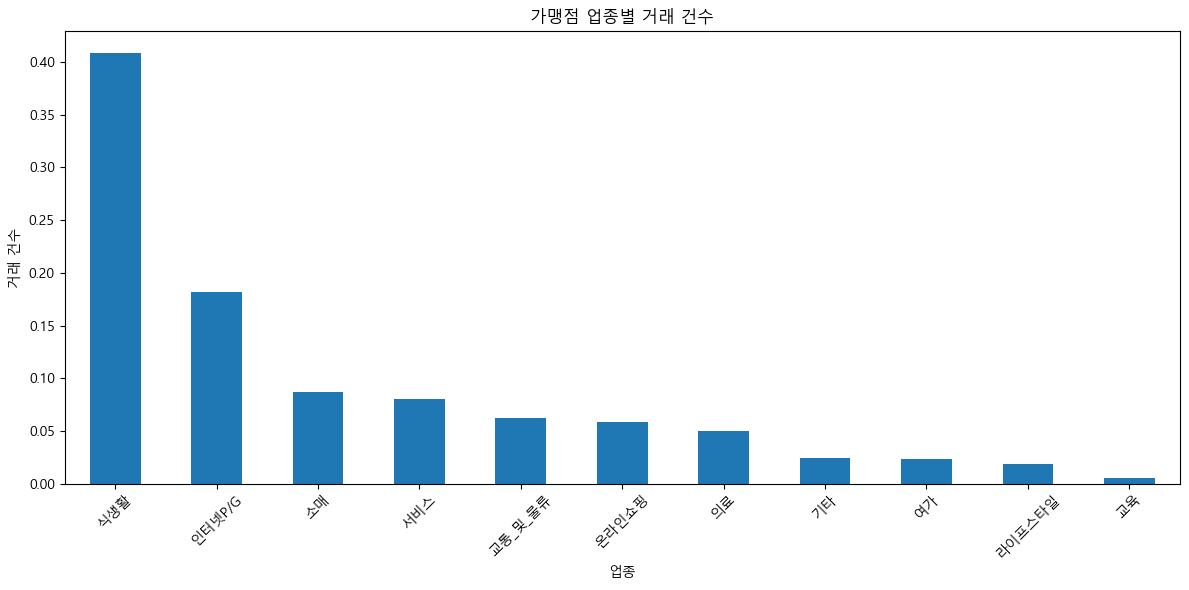

In [297]:
# 값이 큰 순서대로 정렬하여 바차트 그리기
plt.figure(figsize=(12, 6))
data['가맹점업종명_범주화_중분류'].value_counts(normalize = True).plot(kind='bar')
plt.title('가맹점 업종별 거래 건수')
plt.xlabel('업종')
plt.ylabel('거래 건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

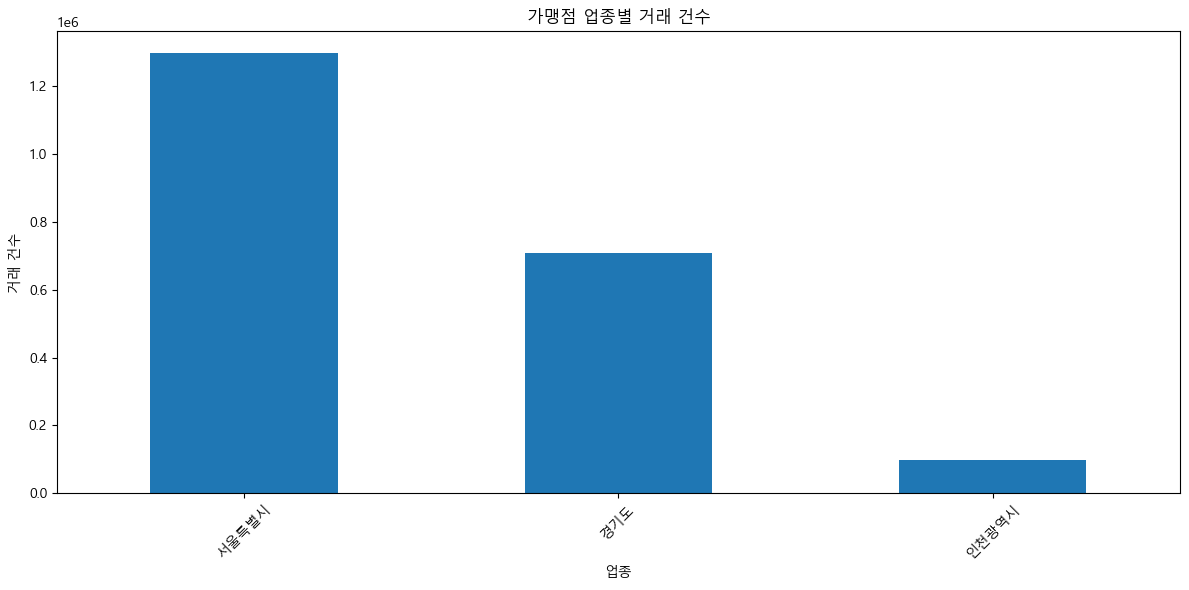

In [298]:
# 값이 큰 순서대로 정렬하여 바차트 그리기
plt.figure(figsize=(12, 6))
data['가맹점_광역시도'].value_counts().plot(kind='bar')
plt.title('가맹점 업종별 거래 건수')
plt.xlabel('업종')
plt.ylabel('거래 건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------

## 이 밑으론 굳이 보지 않아도 됨


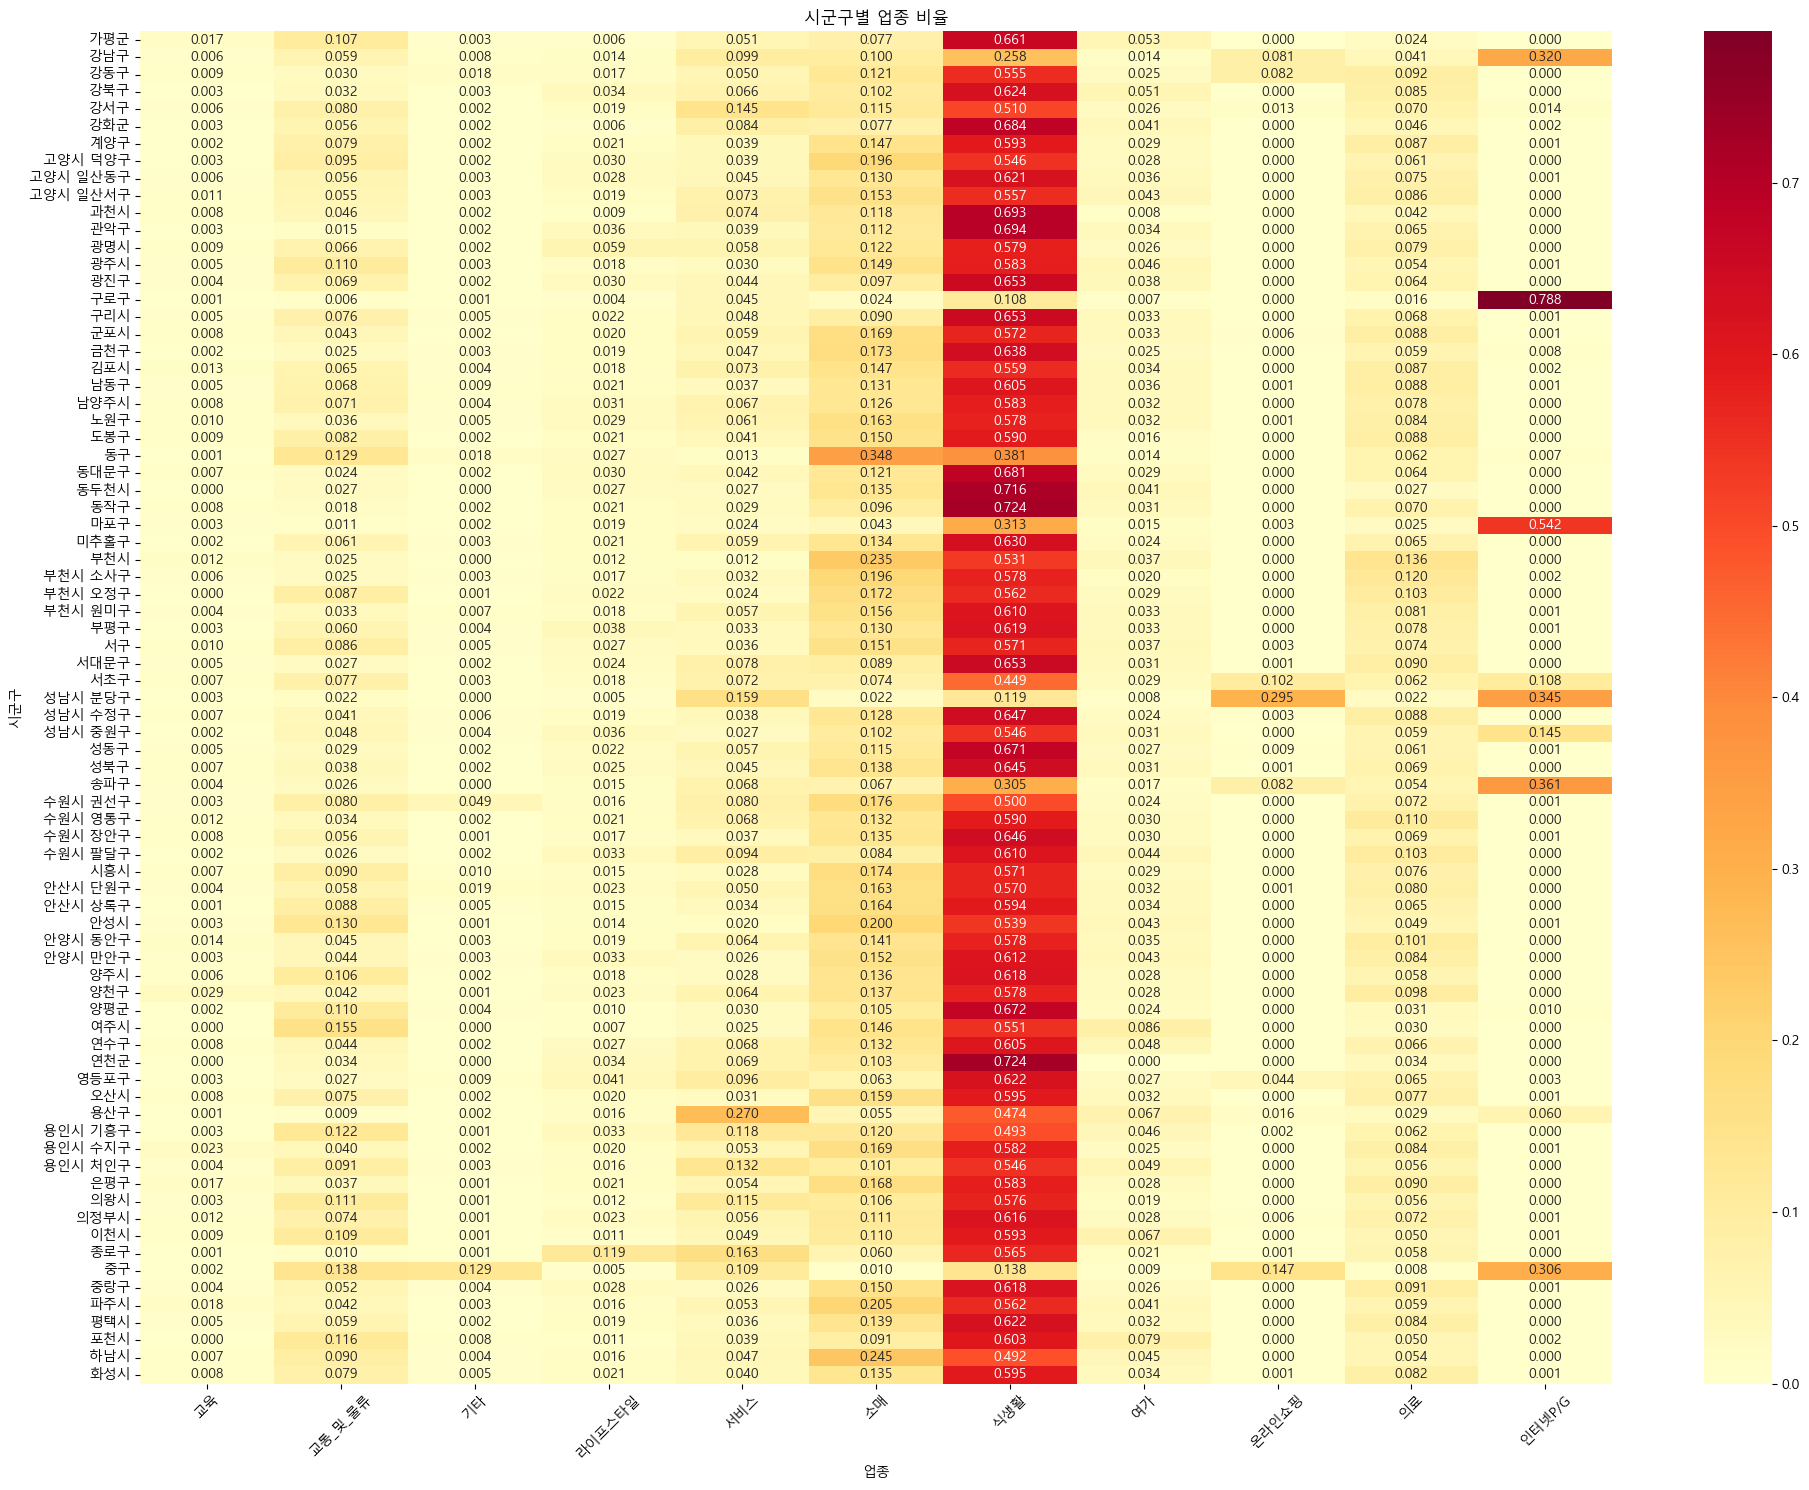


=== 군집별 시군구 ===

군집 0:
['가평군', '강동구', '강북구', '강서구', '강화군', '계양구', '고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '과천시', '관악구', '광명시', '광주시', '광진구', '구리시', '군포시', '금천구', '김포시', '남동구', '남양주시', '노원구', '도봉구', '동구', '동대문구', '동두천시', '동작구', '미추홀구', '부천시', '부천시 소사구', '부천시 오정구', '부천시 원미구', '부평구', '서구', '서대문구', '서초구', '성남시 수정구', '성남시 중원구', '성동구', '성북구', '수원시 권선구', '수원시 영통구', '수원시 장안구', '수원시 팔달구', '시흥시', '안산시 단원구', '안산시 상록구', '안성시', '안양시 동안구', '안양시 만안구', '양주시', '양천구', '양평군', '여주시', '연수구', '연천군', '영등포구', '오산시', '용산구', '용인시 기흥구', '용인시 수지구', '용인시 처인구', '은평구', '의왕시', '의정부시', '이천시', '종로구', '중랑구', '파주시', '평택시', '포천시', '하남시', '화성시']

군집 1:
['강남구', '마포구', '성남시 분당구', '송파구', '중구']

군집 2:
['구로구']


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_36172\374039251.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means[i].index, rotation=45)
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_36172\374039251.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means[i].index, rotation=45)
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_36172\374039251.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means[i].index, rotation=45)


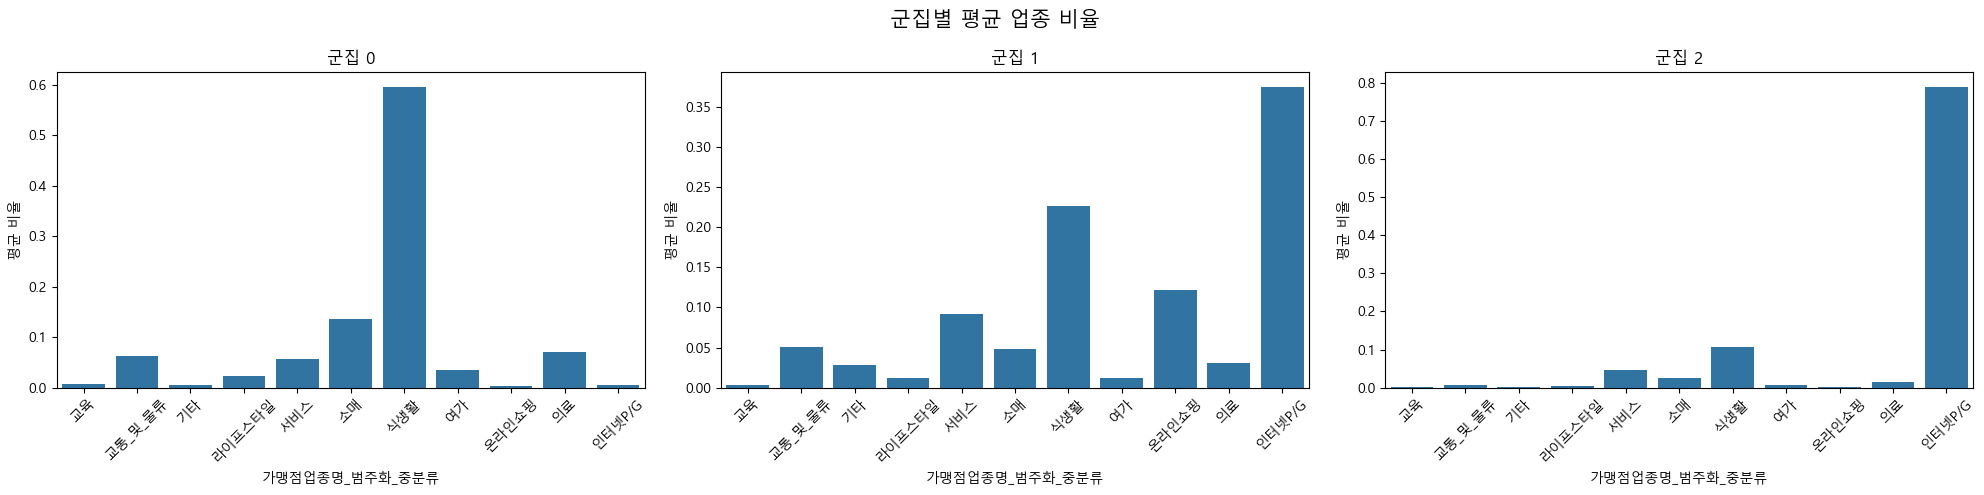

In [301]:
# 서울 내 지역별 소비 비율 비교
# 시군구별 업종 비율 계산
category_ratio = pd.crosstab(data['가맹점_시군구'], data['가맹점업종명_범주화_중분류'], normalize='index')

# 시각화
plt.figure(figsize=(20, 15))
sns.heatmap(category_ratio, cmap='YlOrRd', annot=True, fmt='.3f')
plt.title('시군구별 업종 비율')
plt.xlabel('업종')
plt.ylabel('시군구')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# K-means 클러스터링으로 3개 그룹으로 분류
from sklearn.cluster import KMeans

# 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(category_ratio)

# 결과 출력
category_ratio['군집'] = clusters
print("\n=== 군집별 시군구 ===")
for i in range(3):
    print(f"\n군집 {i}:")
    print(category_ratio[category_ratio['군집']==i].index.tolist())

# 군집별 평균 업종 비율 계산
cluster_means = []
for i in range(3):
    cluster_data = category_ratio[category_ratio['군집']==i].drop('군집', axis=1)
    cluster_means.append(cluster_data.mean())

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('군집별 평균 업종 비율', fontsize=15)

for i in range(3):
    sns.barplot(x=cluster_means[i].index, y=cluster_means[i].values, ax=axes[i])
    axes[i].set_title(f'군집 {i}')
    axes[i].set_xticklabels(cluster_means[i].index, rotation=45)
    axes[i].set_ylabel('평균 비율')

plt.tight_layout()
plt.show()



# 지역 그룹화 및 클러스터링
- 지역 위주의 EDA

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2101736 entries, 0 to 2123849
Data columns (total 18 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   거래년월            object
 1   고객ID            int64 
 2   가맹점업종명          object
 3   가맹점_광역시도        object
 4   가맹점_시군구         object
 5   승인건수            object
 6   승인금액            int64 
 7   연령대             object
 8   성별              object
 9   자택_시도           object
 10  자택_시군구          object
 11  승인건수_수치화        int64 
 12  년도              int64 
 13  가맹점업종명_범주화_중분류  object
 14  거래년월_분기         int64 
 15  거래년월_월          int64 
 16  그룹_나이성별         object
 17  그룹_지역           object
dtypes: int64(6), object(12)
memory usage: 304.7+ MB


# 차원축소 - 폐기 - 
- 지역별 소비 비율은 카이제곱으로
- 지역별 분류 및 클러스터링
- 분류 기준을 잡자

- PCA는 연속형 특화라 적용이 어려움
    - 따라서 찾은 방법은 T-sne => Umap => PacMap 
    - 순서대로 더 진보한 방법이라고 볼 수 있다.

- 그러나 차원축소 기법은 원래 고차원 데이터에 사용하기 위한 알고리즘으로, 시군구같이 데이터가 몇 십개에 불과한 경우 오히려 해석이 어렵고 과적합의 위험까지 있다.

### T-sne 차원축소 및 시각화 진행
- 가맹점 범주화를 기준으로 업종당 결제 비중이 비슷한 지역끼리 Clustering

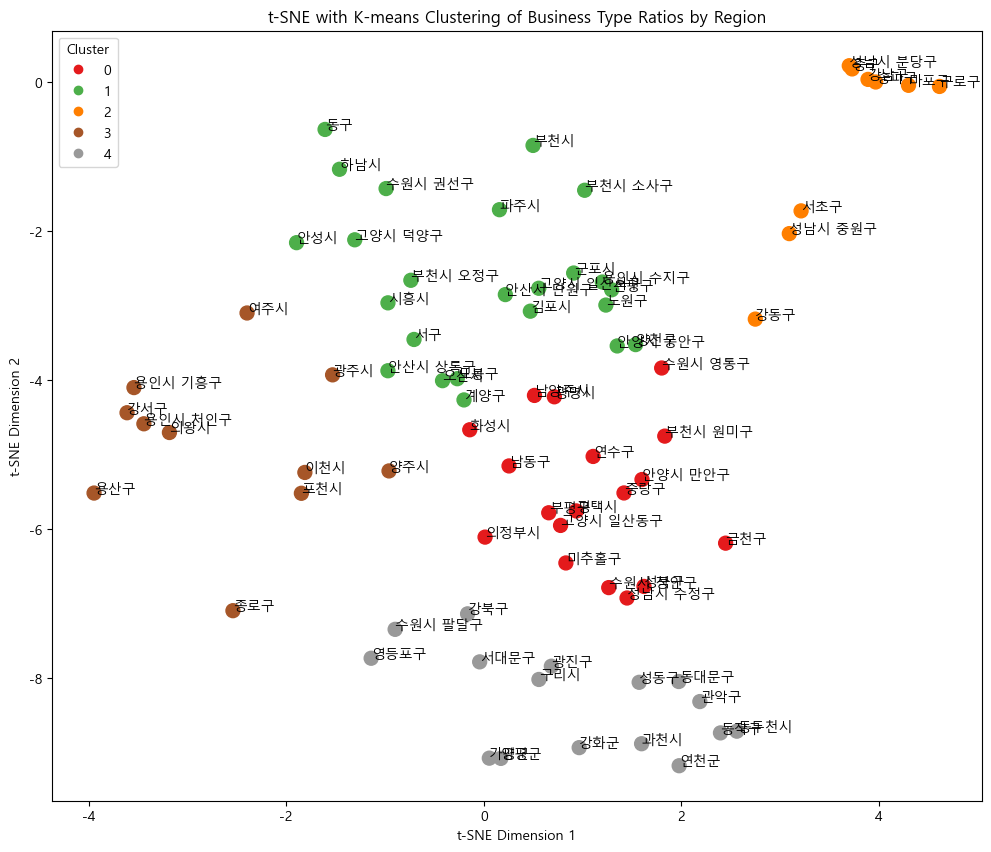


각 클러스터별 구성 시군구:

클러스터 0의 시군구:
['고양시 일산동구', '광명시', '금천구', '남동구', '남양주시', '미추홀구', '부천시 원미구', '부평구', '성남시 수정구', '성북구', '수원시 영통구', '수원시 장안구', '안양시 만안구', '연수구', '의정부시', '중랑구', '평택시', '화성시']

클러스터 1의 시군구:
['계양구', '고양시 덕양구', '고양시 일산서구', '군포시', '김포시', '노원구', '도봉구', '동구', '부천시', '부천시 소사구', '부천시 오정구', '서구', '수원시 권선구', '시흥시', '안산시 단원구', '안산시 상록구', '안성시', '안양시 동안구', '양천구', '오산시', '용인시 수지구', '은평구', '파주시', '하남시']

클러스터 2의 시군구:
['강남구', '강동구', '구로구', '마포구', '서초구', '성남시 분당구', '성남시 중원구', '송파구', '중구']

클러스터 3의 시군구:
['강서구', '광주시', '양주시', '여주시', '용산구', '용인시 기흥구', '용인시 처인구', '의왕시', '이천시', '종로구', '포천시']

클러스터 4의 시군구:
['가평군', '강북구', '강화군', '과천시', '관악구', '광진구', '구리시', '동대문구', '동두천시', '동작구', '서대문구', '성동구', '수원시 팔달구', '양평군', '연천군', '영등포구']


각 클러스터별 평균 업종 비율:


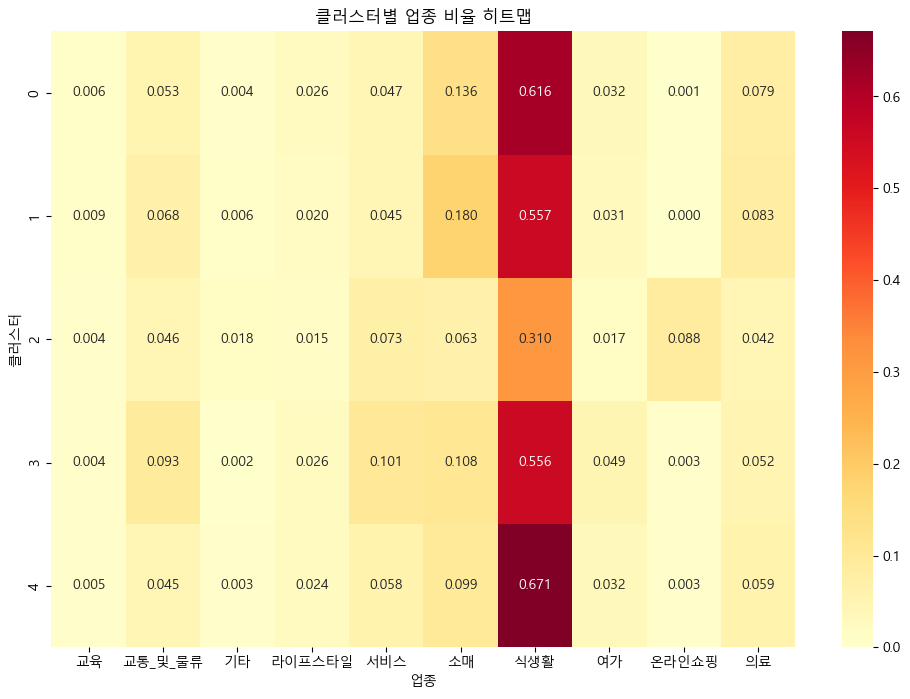

In [303]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# 인터넷P/G를 빼야 할 것 같지만 일단은 넣어서 진행해보자.

dat_sne = data[['가맹점_시군구','가맹점업종명_범주화_중분류']]

# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# t-SNE를 사용하여 차원 축소
tsne = TSNE(n_components=2, random_state=42) #차원을 2개로 축소
tsne_result = tsne.fit_transform(grouped_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)  # 군집 개수 조정 가능
grouped_data['Cluster'] = kmeans.fit_predict(tsne_result)

# t-SNE 결과를 데이터프레임에 추가
grouped_data['t-SNE_1'] = tsne_result[:, 0]
grouped_data['t-SNE_2'] = tsne_result[:, 1]

# 시각화
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    grouped_data['t-SNE_1'], 
    grouped_data['t-SNE_2'],
    c=grouped_data['Cluster'],
    cmap='Set1',
    s=100
)

# 각 점에 시군구 이름 표시
for idx, row in grouped_data.iterrows():
    plt.annotate(idx, (row['t-SNE_1'], row['t-SNE_2']))

plt.title('t-SNE with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

# 각 클러스터의 구성 시군구와 평균 업종 비율 출력
print("\n각 클러스터별 구성 시군구:")
for cluster in range(5):
    print(f"\n클러스터 {cluster}의 시군구:")
    print(grouped_data[grouped_data['Cluster'] == cluster].index.tolist())
    
# 시각화 - 히트맵 사용
print("\n\n각 클러스터별 평균 업종 비율:")
cluster_means = grouped_data.groupby('Cluster')[['교육','교통_및_물류', '기타', '라이프스타일', '서비스', '소매', '식생활', '여가', '온라인쇼핑', '의료']].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.round(3), annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('클러스터별 업종 비율 히트맵')
plt.xlabel('업종')
plt.ylabel('클러스터')
plt.show()

### Umap을 적용해볼 수 있을까?
- 결과가 엄청나게 유의하지는 않을 듯 하다

In [230]:
#pip install umap-learn -qq
#!pip install numpy==2.0 -qq

In [304]:
#!pip install umap-learn -qq
import umap

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# UMAP 적용으로 데이터 그룹화

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


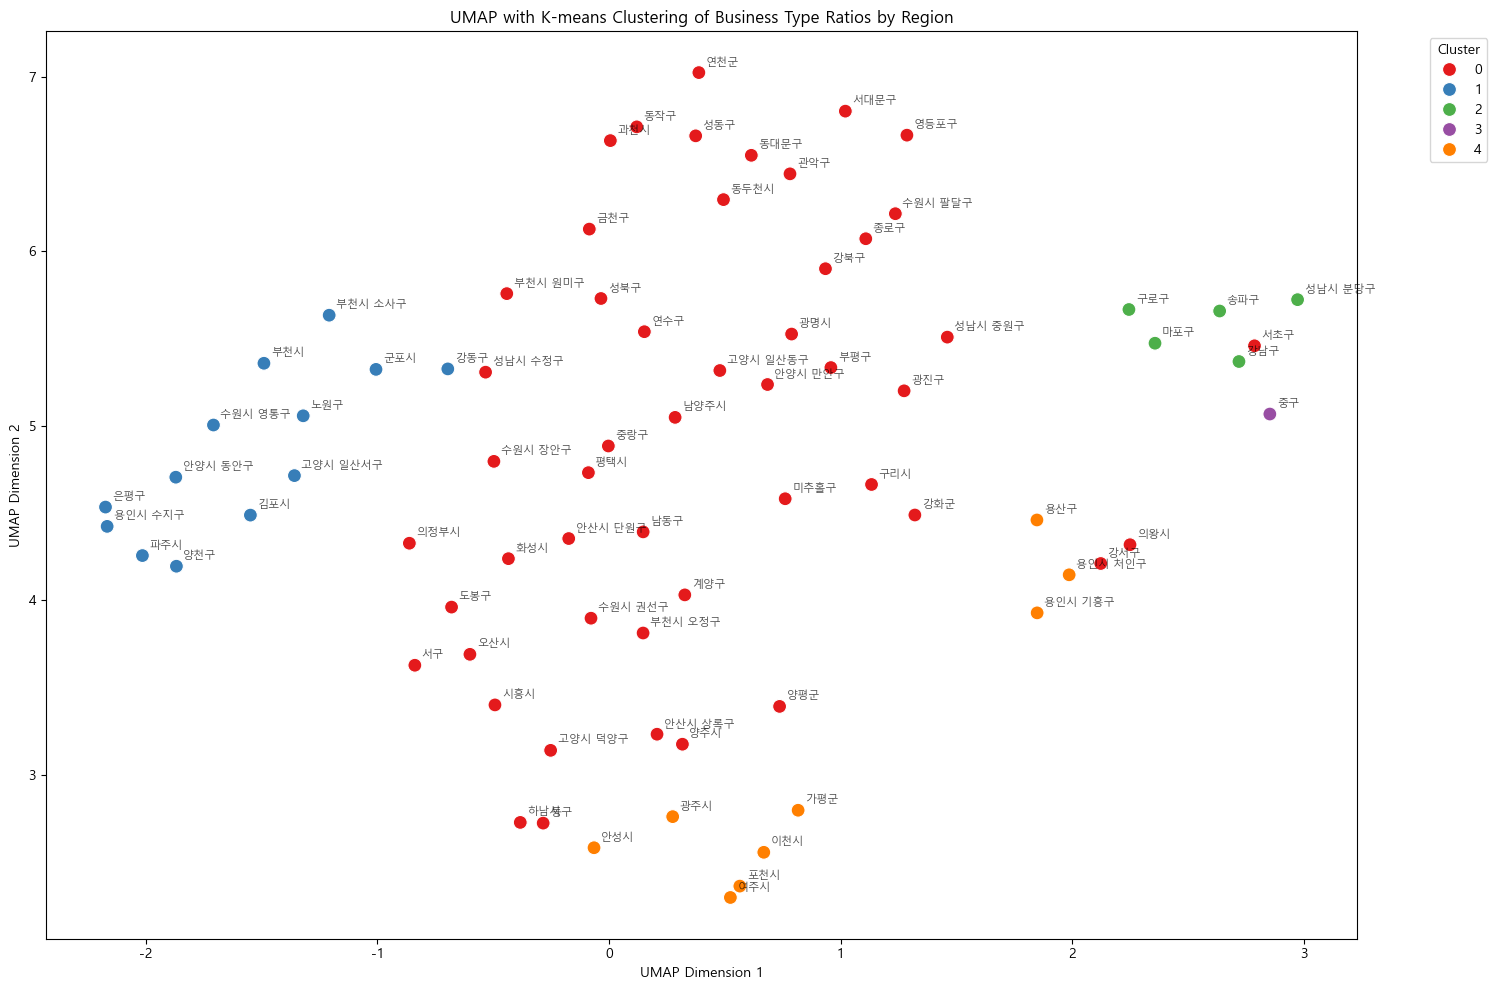


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 지역 수: 50

주요 업종 비율:
식생활: 60.8%
소매: 13.3%
의료: 7.0%
교통_및_물류: 6.0%
서비스: 5.3%
여가: 3.0%
라이프스타일: 2.6%
인터넷P/G: 0.6%
교육: 0.5%
기타: 0.5%
온라인쇼핑: 0.4%

대표적인 지역:
강북구, 강서구, 강화군, 계양구, 고양시 덕양구
--------------------------------------------------

Cluster 1 특징:
포함된 지역 수: 13

주요 업종 비율:
식생활: 56.9%
소매: 16.4%
의료: 9.5%
서비스: 5.5%
교통_및_물류: 4.0%
여가: 3.2%
라이프스타일: 1.9%
교육: 1.4%
온라인쇼핑: 0.7%
기타: 0.4%
인터넷P/G: 0.0%

대표적인 지역:
강동구, 고양시 일산서구, 군포시, 김포시, 노원구
--------------------------------------------------

Cluster 2 특징:
포함된 지역 수: 5

주요 업종 비율:
인터넷P/G: 47.1%
식생활: 22.1%
온라인쇼핑: 9.2%
서비스: 7.9%
소매: 5.1%
의료: 3.2%
교통_및_물류: 2.5%
여가: 1.2%
라이프스타일: 1.1%
교육: 0.3%
기타: 0.2%

대표적인 지역:
강남구, 구로구, 마포구, 성남시 분당구, 송파구
--------------------------------------------------

Cluster 3 특징:
포함된 지역 수: 1

주요 업종 비율:
인터넷P/G: 30.6%
온라인쇼핑: 14.7%
교통_및_물류: 13.8%
식생활: 13.8%
기타: 12.9%
서비스: 10.9%
소매: 1.0%
여가: 0.9%
의료: 0.8%
라이프스타일: 0.5%
교육: 0.2%

대표적인 지역:
중구
--------------------------------------------------

Cluster 4 특징

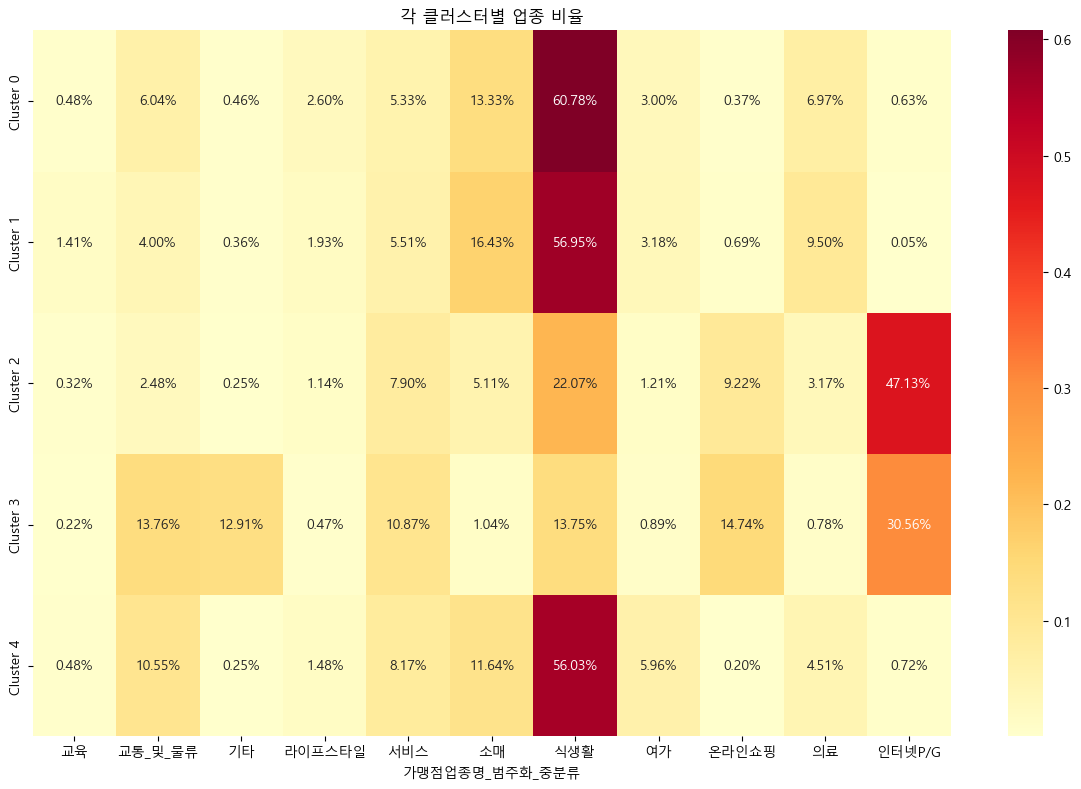

In [305]:
from sklearn.preprocessing import StandardScaler

# 데이터 전처리
# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data)
scaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

# UMAP 적용
umap_reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    #n_neighbors=15,
    #min_dist=0.1
)
umap_result = umap_reducer.fit_transform(scaled_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'UMAP_1': umap_result[:, 0],
    'UMAP_2': umap_result[:, 1],
    'Cluster': clusters
})
result_df.index = grouped_data.index

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='UMAP_1',
    y='UMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 시군구 이름 표시
for idx, row in result_df.iterrows():
    plt.annotate(idx, (row['UMAP_1'], row['UMAP_2']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.title('UMAP with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(5):
    cluster_regions = result_df[result_df['Cluster'] == cluster].index
    cluster_means = grouped_data.loc[cluster_regions].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 지역 수: {len(cluster_regions)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 지역:")
    print(", ".join(cluster_regions[:5]))
    print("-" * 50)

# 클러스터별 업종 비율 히트맵
plt.figure(figsize=(12, 8))
cluster_means = pd.DataFrame([
    grouped_data.loc[result_df[result_df['Cluster'] == i].index].mean()
    for i in range(5)
], index=[f'Cluster {i}' for i in range(5)])

sns.heatmap(cluster_means, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('각 클러스터별 업종 비율')
plt.tight_layout()
plt.show()

In [306]:
# pacmap 설치
#!pip install pacmap
#!pip install --upgrade setuptools
import pacmap

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\pacmap\pacmap.py:845: UserWarning: Warning: random state is set to 42.
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}.')


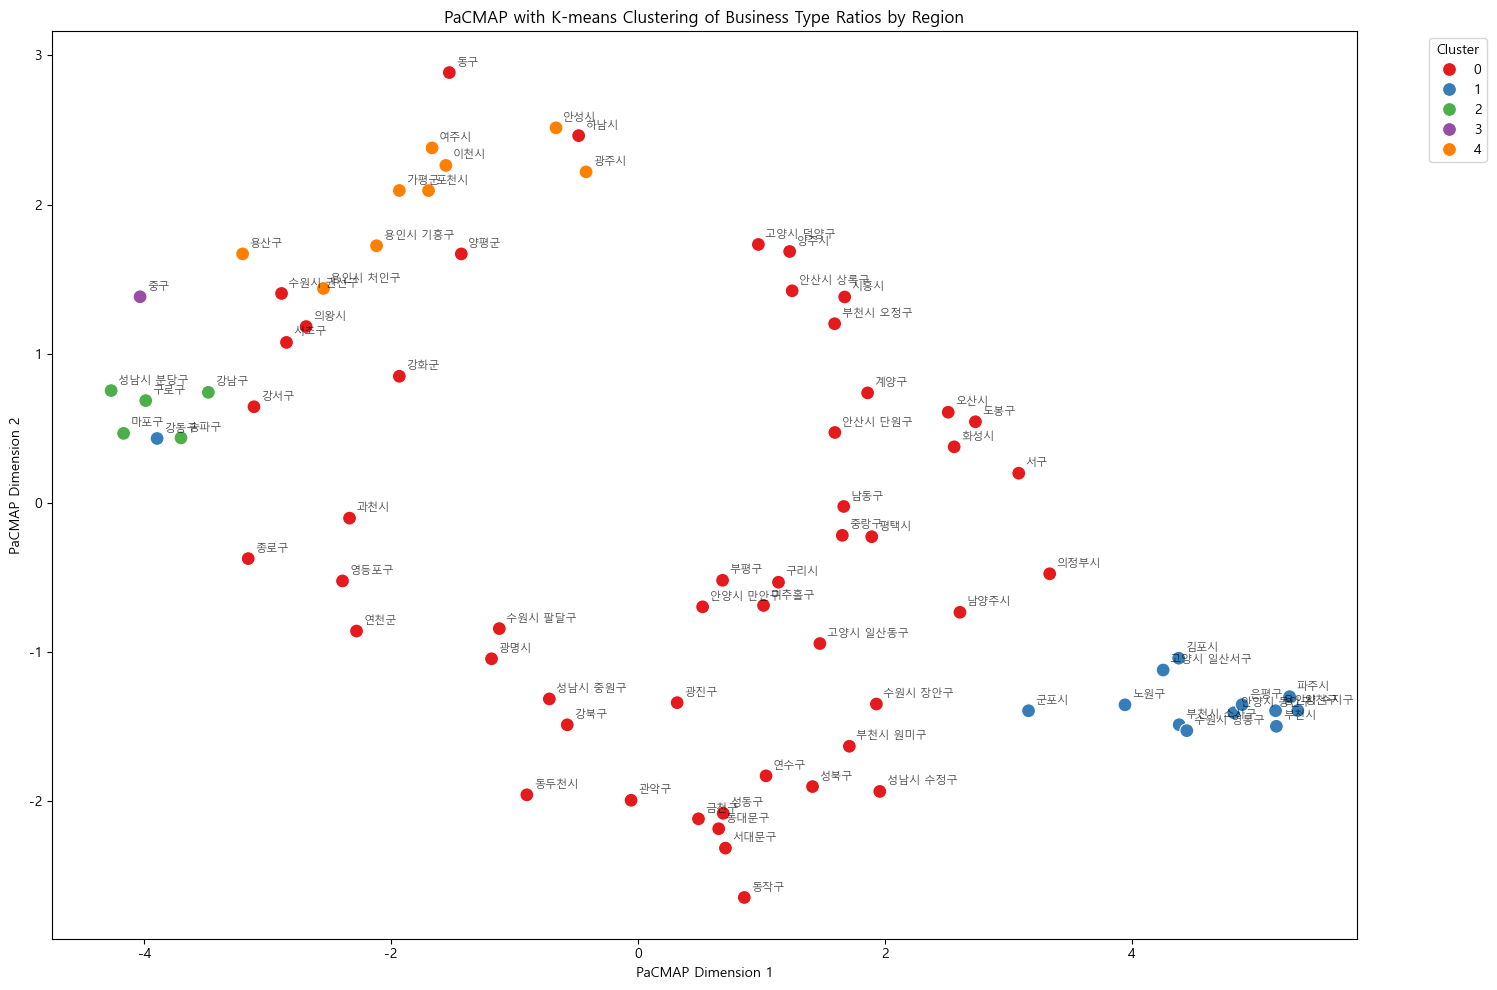


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 지역 수: 50

주요 업종 비율:
식생활: 60.8%
소매: 13.3%
의료: 7.0%
교통_및_물류: 6.0%
서비스: 5.3%
여가: 3.0%
라이프스타일: 2.6%
인터넷P/G: 0.6%
교육: 0.5%
기타: 0.5%
온라인쇼핑: 0.4%

대표적인 지역:
강북구, 강서구, 강화군, 계양구, 고양시 덕양구
--------------------------------------------------

Cluster 1 특징:
포함된 지역 수: 13

주요 업종 비율:
식생활: 56.9%
소매: 16.4%
의료: 9.5%
서비스: 5.5%
교통_및_물류: 4.0%
여가: 3.2%
라이프스타일: 1.9%
교육: 1.4%
온라인쇼핑: 0.7%
기타: 0.4%
인터넷P/G: 0.0%

대표적인 지역:
강동구, 고양시 일산서구, 군포시, 김포시, 노원구
--------------------------------------------------

Cluster 2 특징:
포함된 지역 수: 5

주요 업종 비율:
인터넷P/G: 47.1%
식생활: 22.1%
온라인쇼핑: 9.2%
서비스: 7.9%
소매: 5.1%
의료: 3.2%
교통_및_물류: 2.5%
여가: 1.2%
라이프스타일: 1.1%
교육: 0.3%
기타: 0.2%

대표적인 지역:
강남구, 구로구, 마포구, 성남시 분당구, 송파구
--------------------------------------------------

Cluster 3 특징:
포함된 지역 수: 1

주요 업종 비율:
인터넷P/G: 30.6%
온라인쇼핑: 14.7%
교통_및_물류: 13.8%
식생활: 13.8%
기타: 12.9%
서비스: 10.9%
소매: 1.0%
여가: 0.9%
의료: 0.8%
라이프스타일: 0.5%
교육: 0.2%

대표적인 지역:
중구
--------------------------------------------------

Cluster 4 특징

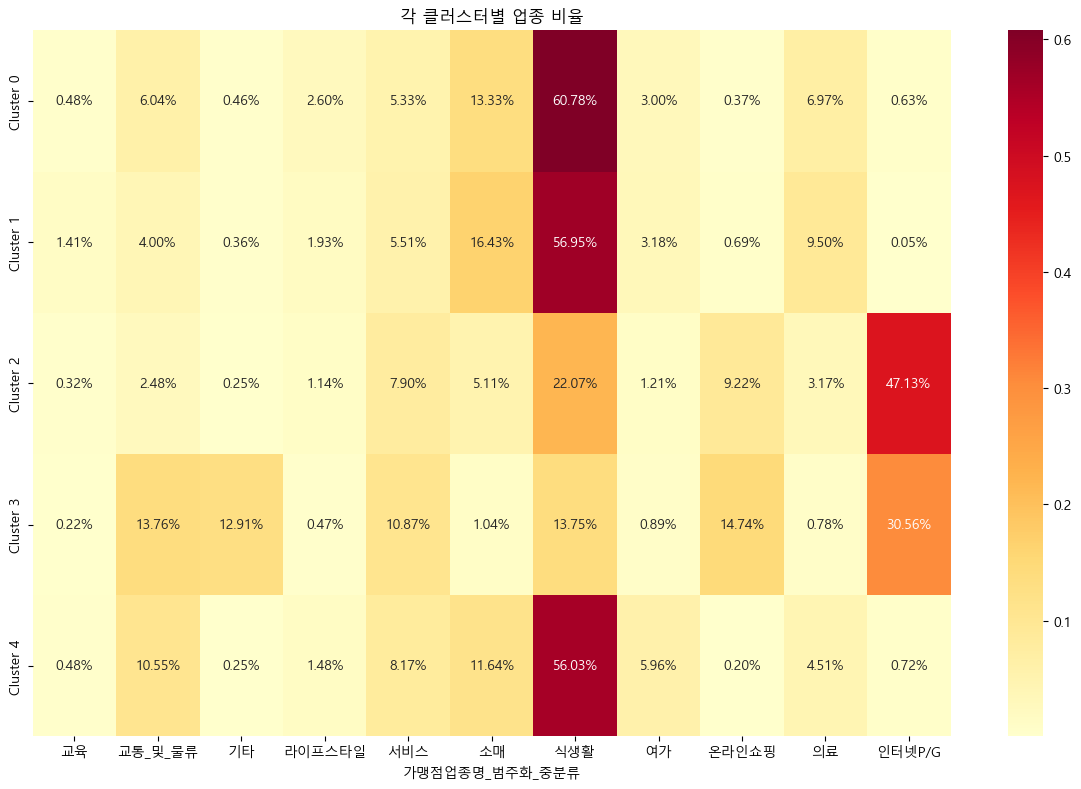

In [307]:
# 데이터 전처리
# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data)
scaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

# PaCMAP 적용
pacmap_reducer = pacmap.PaCMAP(
    n_components=2,
    random_state=42, 
    MN_ratio=0.5,           # Mid-near 비율
    FP_ratio=2.0,
    n_neighbors=15
)
pacmap_result = pacmap_reducer.fit_transform(scaled_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'PaCMAP_1': pacmap_result[:, 0],
    'PaCMAP_2': pacmap_result[:, 1],
    'Cluster': clusters
})
result_df.index = grouped_data.index

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='PaCMAP_1',
    y='PaCMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 시군구 이름 표시
for idx, row in result_df.iterrows():
    plt.annotate(idx, (row['PaCMAP_1'], row['PaCMAP_2']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.title('PaCMAP with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(5):
    cluster_regions = result_df[result_df['Cluster'] == cluster].index
    cluster_means = grouped_data.loc[cluster_regions].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 지역 수: {len(cluster_regions)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 지역:")
    print(", ".join(cluster_regions[:5]))
    print("-" * 50)

# 클러스터별 업종 비율 히트맵
plt.figure(figsize=(12, 8))
cluster_means = pd.DataFrame([
    grouped_data.loc[result_df[result_df['Cluster'] == i].index].mean()
    for i in range(5)
], index=[f'Cluster {i}' for i in range(5)])

sns.heatmap(cluster_means, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('각 클러스터별 업종 비율')
plt.tight_layout()
plt.show()

### 소비 패턴 비중을 중심으로 연령대, 성별로 나눈 후 3그룹으로 나누기
- 충분한 증거가 있어야 한다.
- T-sne, Umap, Pacmap 세 가지 모두로 돌려보자.

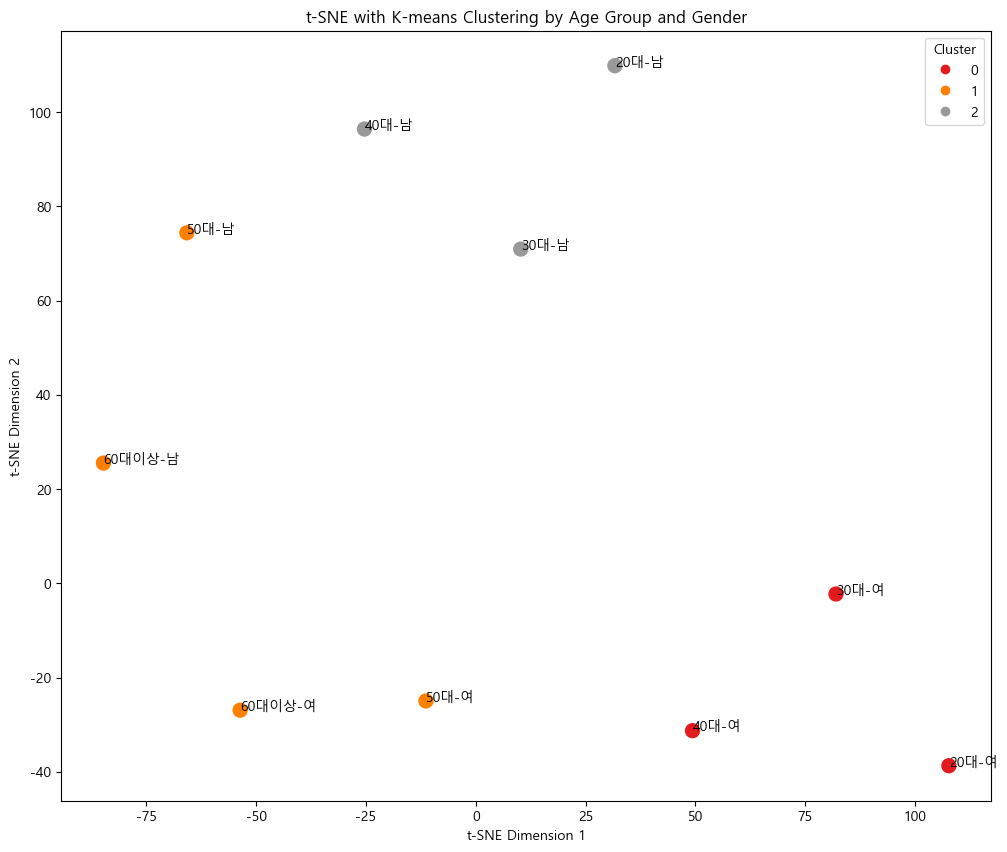


각 클러스터별 구성:

클러스터 0:
[('20대', '여'), ('30대', '여'), ('40대', '여')]

클러스터 1:
[('50대', '남'), ('50대', '여'), ('60대이상', '남'), ('60대이상', '여')]

클러스터 2:
[('20대', '남'), ('30대', '남'), ('40대', '남')]


각 클러스터별 평균 업종 비율:


<Figure size 1200x800 with 0 Axes>

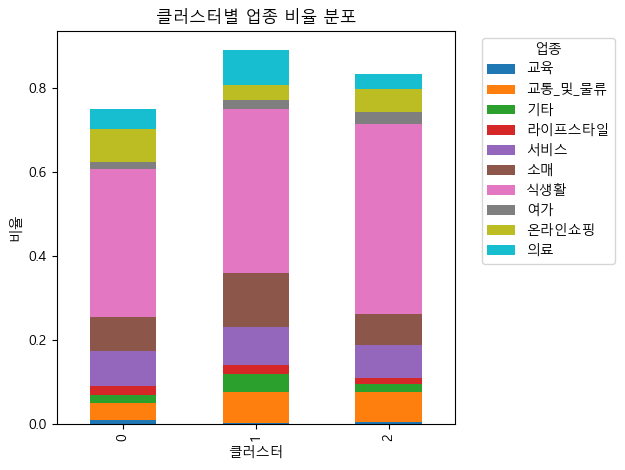

In [308]:
# T-sne 사용

dat_sne = pd.crosstab(
    index=[data['연령대'], data['성별']], 
    columns=data['가맹점업종명_범주화_중분류'],
    normalize='index'
)

# t-SNE를 사용하여 차원 축소
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(dat_sne)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)
dat_sne['Cluster'] = kmeans.fit_predict(tsne_result)

# t-SNE 결과를 데이터프레임에 추가
dat_sne['t-SNE_1'] = tsne_result[:, 0]
dat_sne['t-SNE_2'] = tsne_result[:, 1]

# 시각화
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    dat_sne['t-SNE_1'],
    dat_sne['t-SNE_2'], 
    c=dat_sne['Cluster'],
    cmap='Set1',
    s=100
)

# 각 점에 연령대와 성별 표시
for idx, row in dat_sne.iterrows():
    plt.annotate(f"{idx[0]}-{idx[1]}", (row['t-SNE_1'], row['t-SNE_2']))

plt.title('t-SNE with K-means Clustering by Age Group and Gender')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

# 각 클러스터의 구성 출력
print("\n각 클러스터별 구성:")
for cluster in range(3):
    print(f"\n클러스터 {cluster}:")
    print(dat_sne[dat_sne['Cluster'] == cluster].index.tolist())
    
# 시각화 - Stacked Bar Plot 사용
print("\n\n각 클러스터별 평균 업종 비율:")
cluster_means = dat_sne.groupby('Cluster')[['교육', '교통_및_물류', '기타', '라이프스타일', '서비스', '소매', '식생활', '여가', '온라인쇼핑', '의료']].mean()

plt.figure(figsize=(12, 8))
cluster_means.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


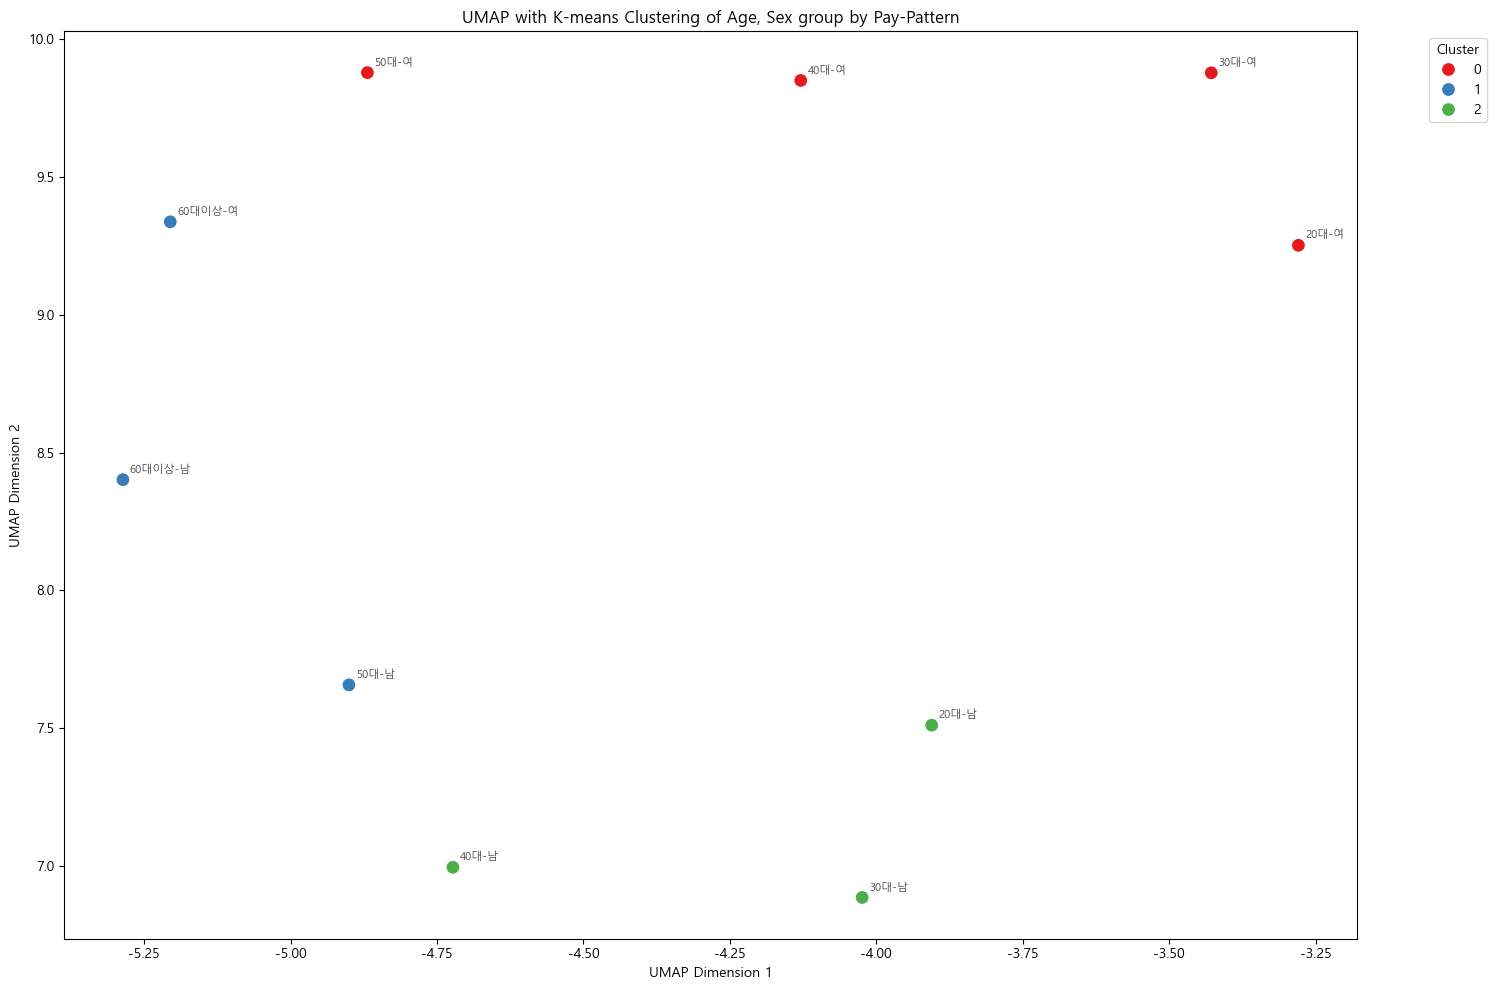


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 집단 수: 4

주요 업종 비율:
식생활: 35.2%
인터넷P/G: 22.4%
소매: 9.3%
서비스: 8.7%
온라인쇼핑: 7.1%
의료: 5.4%
교통_및_물류: 4.6%
기타: 2.4%
라이프스타일: 2.4%
여가: 1.7%
교육: 0.7%

대표적인 그룹:
20대-여, 30대-여, 40대-여, 50대-여
--------------------------------------------------

Cluster 1 특징:
포함된 집단 수: 3

주요 업종 비율:
식생활: 40.4%
소매: 13.2%
인터넷P/G: 9.3%
의료: 8.7%
서비스: 8.5%
교통_및_물류: 7.7%
기타: 4.6%
온라인쇼핑: 3.1%
여가: 2.3%
라이프스타일: 2.0%
교육: 0.3%

대표적인 그룹:
50대-남, 60대이상-남, 60대이상-여
--------------------------------------------------

Cluster 2 특징:
포함된 집단 수: 3

주요 업종 비율:
식생활: 45.2%
인터넷P/G: 16.5%
서비스: 7.8%
소매: 7.4%
교통_및_물류: 7.2%
온라인쇼핑: 5.5%
의료: 3.7%
여가: 2.8%
기타: 2.0%
라이프스타일: 1.5%
교육: 0.4%

대표적인 그룹:
20대-남, 30대-남, 40대-남
--------------------------------------------------


각 클러스터별 평균 업종 비율:


<Figure size 1200x800 with 0 Axes>

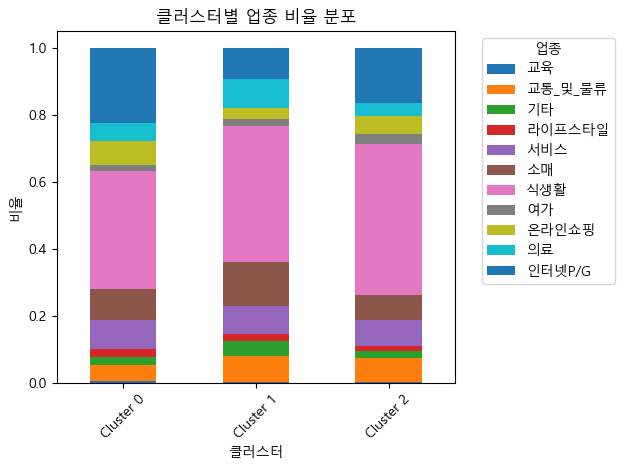

In [309]:
# Umap 사용

# 데이터 전처리
dat_sne = pd.crosstab(
    index=[data['연령대'], data['성별']], 
    columns=data['가맹점업종명_범주화_중분류'],
    normalize='index'
)

# UMAP 적용
umap_reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=5,  # 데이터 크기가 작으므로 n_neighbors 값을 줄임
    min_dist=0.1
)
umap_result = umap_reducer.fit_transform(dat_sne)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(umap_result)  # umap_result로 클러스터링

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'UMAP_1': umap_result[:, 0],
    'UMAP_2': umap_result[:, 1],
    'Cluster': clusters
})
result_df.index = dat_sne.index  # dat_sne의 인덱스 사용

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='UMAP_1',
    y='UMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 레이블 표시
for idx, row in result_df.iterrows():
    plt.annotate(f"{idx[0]}-{idx[1]}", 
                (row['UMAP_1'], row['UMAP_2']), 
                xytext=(5, 5), 
                textcoords='offset points', 
                fontsize=8, 
                alpha=0.7)

plt.title('UMAP with K-means Clustering of Age, Sex group by Pay-Pattern')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(3):  # 3개 클러스터로 수정
    cluster_members = result_df[result_df['Cluster'] == cluster].index
    cluster_means = dat_sne.loc[cluster_members].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 집단 수: {len(cluster_members)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 그룹:")
    print(", ".join([f"{idx[0]}-{idx[1]}" for idx in cluster_members[:5]]))
    print("-" * 50)

# 시각화 - Stacked Bar Plot 사용
print("\n\n각 클러스터별 평균 업종 비율:")

# 각 클러스터별 평균 업종 비율 계산
cluster_means = []
for cluster in range(3):
    cluster_members = result_df[result_df['Cluster'] == cluster].index
    cluster_mean = dat_sne.loc[cluster_members].mean()
    cluster_means.append(cluster_mean)

# DataFrame으로 변환
cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(3)])

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 왜 안되는가?
- pacmap은 대규모 데이터를 다루는 데 특화되어있어서 꼴랑 12개짜리 그룹인 데이터는 비효율적이다.
- k-means를 사용해야 한다.

In [310]:
# 돌리는 게 너무 오래걸린다!
# 이 방식에 맞지 않는 기법인듯 하다.


'''

# Pacmap을 사용해보자.

# 데이터 전처리
# 연령대, 성별별 가맹점업종명_범주화_중분류 비율 계산
grouped_data = data.groupby(['연령대', '성별', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data)
scaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

scaled_data = grouped_data
# PaCMAP 적용
pacmap_reducer = pacmap.PaCMAP(
    n_components=2,
    random_state=42, 
    MN_ratio=0.5,           # Mid-near 비율
    FP_ratio=2.0,
    n_neighbors=4
)
pacmap_result = pacmap_reducer.fit_transform(scaled_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'PaCMAP_1': pacmap_result[:, 0],
    'PaCMAP_2': pacmap_result[:, 1],
    'Cluster': clusters
})
result_df.index = grouped_data.index

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='PaCMAP_1',
    y='PaCMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 연령대-성별 표시
for idx, row in result_df.iterrows():
    plt.annotate(f"{idx[0]}-{idx[1]}", (row['PaCMAP_1'], row['PaCMAP_2']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.title('PaCMAP with K-means Clustering of Age, Sex group by Business Type Ratios')
plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(3):
    cluster_groups = result_df[result_df['Cluster'] == cluster].index
    cluster_means = grouped_data.loc[cluster_groups].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 그룹 수: {len(cluster_groups)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 그룹:")
    print(", ".join([f"{idx[0]}-{idx[1]}" for idx in cluster_groups[:5]]))
    print("-" * 50)

# 클러스터별 업종 비율 히트맵
plt.figure(figsize=(12, 8))
cluster_means = pd.DataFrame([
    grouped_data.loc[result_df[result_df['Cluster'] == i].index].mean()
    for i in range(3)
], index=[f'Cluster {i}' for i in range(3)])

sns.heatmap(cluster_means, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('각 클러스터별 업종 비율')
plt.tight_layout()
plt.show()

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'''

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\pacmap\pacmap.py:845: UserWarning: Warning: random state is set to 42.
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}.')


# 데이터 저장

In [772]:
# 딱히 변경 요소 없으면 저장하지 말것것
#data.to_csv('sampled_data/rawdata_processed.csv')

KeyboardInterrupt: 